# Project: Forecasting Churn of Clients for Interconnect Company.

The telecommunications company, Interconnect, would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts. 

The purpose of this project is to create a Machine Learning model that predicts which costumers are at 'risk' of leaving the telecommunications company. The datasets provided from Interconnect include the costumers's personal information; information about their costumer's contracts; and information about costumers' phone and internet plans. Our tasks included pre-processing the data for analysis, for each of the datasets, including check for missing data, errors in data entry, and duplicates. After processing each of the datasets, we joined the the tables into one dataset that contained all the relevant data for each of the costumers. We joined the datasets by using the costumer ID column. By using this joined dataset, we observed and explored the data of the costumers to get an insight of the distribution of values in columns and inbalance of target classes. 

## Libraries Used for Analysis

In [1]:
## Libraries Used for Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN

## Pre-Processing Datasets for Analysis

### df_personal dataset

The `df_personal` dataset contains information about the personal information of the customers, the columns in the dataset include: 

- customerID: Unique identification string for each customer.
- gender: gender of the customer
- SeniorCitizen : describes whether a customer is senior citizen or not
- partner: describes whether the customer has a partner or not
- Dependent: describes whether the customer has dependents or not

The `df_personal` dataframe contains a total of 7043 entries, each representing a customer, and 5 columns. None of the columns presented missing values. 

In [2]:
df_personal = pd.read_csv('personal.csv')
df_personal.head(5)

df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [3]:
#### Checking duplicates or Errors in Data Entry and Datatype

#CostumerID column
df_personal.customerID.duplicated().sum()

0

In [4]:
#gender column
df_personal.gender.unique()

array(['Female', 'Male'], dtype=object)

In [5]:
#changing values from gender column to lowercase
df_personal['gender']=df_personal.gender.str.lower()
df_personal.gender.unique()

array(['female', 'male'], dtype=object)

In [6]:
#SeniorCitizen column
df_personal.SeniorCitizen.unique()

array([0, 1])

In [7]:
#Partner column
df_personal.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
#changing values from Partner column to lowecase
df_personal['Partner']=df_personal.Partner.str.lower()
df_personal.Partner.unique()

array(['yes', 'no'], dtype=object)

In [9]:
#### Checking for Missing Values 

df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### df_contract dataset

The `df_contract` dataset contained a total of 7043 rowns, each indicating a customer, and 8 columns with none of them having missing values. The columns in this dataset include:

- customerID: Unique identification string for each customer.
- BeginData: date in which the customer began using the service(s) from Interconnect. 
- EndData: date in which customer ended services. If values of 'No', then the customer remains with services of company. 
- Type: type of service membership contract (monhtly, 1 year, or 2 years) 
- PaperlessBilling: describes whether the customer is enrolled with the paperless billing option. 
- PaymentMethod: type of payment method that cusotmer uses to pay service fees. 
- MonthlyCharges: charges that customer pays at the end of each month
- TotalCharges: charges that customers pays at the end of their contract time period. 

In [10]:
df_contract = pd.read_csv('contract.csv')
df_contract.head()

df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [11]:
#### Checking duplicates or Errors in Data Entry and Datatype

#customerID column
df_contract.customerID.duplicated().sum()

0

In [12]:
#BeginDate column
sorted(df_contract.BeginDate.unique())

['2013-10-01',
 '2013-11-01',
 '2013-12-01',
 '2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01',
 '2014-07-01',
 '2014-08-01',
 '2014-09-01',
 '2014-10-01',
 '2014-11-01',
 '2014-12-01',
 '2015-01-01',
 '2015-02-01',
 '2015-03-01',
 '2015-04-01',
 '2015-05-01',
 '2015-06-01',
 '2015-07-01',
 '2015-08-01',
 '2015-09-01',
 '2015-10-01',
 '2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01',
 '2017-01-01',
 '2017-02-01',
 '2017-03-01',
 '2017-04-01',
 '2017-05-01',
 '2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-

In [13]:
#changing datatype of column BeginDate to datetime64[ns]
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [14]:
#EndDate column
sorted(df_contract.EndDate.unique())

['2019-10-01 00:00:00',
 '2019-11-01 00:00:00',
 '2019-12-01 00:00:00',
 '2020-01-01 00:00:00',
 'No']

In [15]:
#Type column
df_contract.Type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
#replacing value 'Month-to-Month' to 'monthly' in Type column
df_contract.Type.replace('Month-to-month', 'monthly', inplace=True)

In [17]:
#replacing value 'One year' to '1_year'
df_contract.Type.replace('One year', '1_year', inplace=True)

In [18]:
#replacing value 'Two year' to '2_year'
df_contract.Type.replace('Two year', '2_year', inplace=True)
print(df_contract.Type.unique())

['monthly' '1_year' '2_year']


In [19]:
# PaperlessBilling column 
df_contract.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
# changing the values in PaperlessBilling column to lowercase
df_contract['PaperlessBilling'] = df_contract['PaperlessBilling'].str.lower()
df_contract['PaperlessBilling'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
#PaymentMethod column
df_contract.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [22]:
#changing values in PaymentMethod column to lowercase, and remove spaces
df_contract['PaymentMethod'] = df_contract['PaymentMethod'].str.lower()

new_payment = []
for col in df_contract['PaymentMethod'].to_list():
    col = col.replace('(', '')
    col = col.replace(')', '')
    col = col.replace(' ', '_')
    new_payment.append(col)
df_contract['PaymentMethod'] = new_payment
df_contract['PaymentMethod'].unique()

array(['electronic_check', 'mailed_check', 'bank_transfer_automatic',
       'credit_card_automatic'], dtype=object)

In [23]:
#MonthlyCharges column
df_contract.MonthlyCharges.sort_values().describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [24]:
#TotalCharges column 
# at row index 488, there is a blank entry value, so it was replaced with median value since the distribution of the 
#in the column are skewed 
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(' ', -1)
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'])
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(-1, df_contract['TotalCharges'].median())

df_contract['TotalCharges'].describe()

count    7043.000000
mean     2281.912360
std      2265.272185
min        18.800000
25%       402.225000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [25]:
#### Checking for Missing Values 

df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


### df_phone dataset

The `df_phone` dataset contained a cotal of 6,361 entries, each describing the phone service of a customer, and a total of 2 columns. The two columns in the dataset include: 
- customerID: Unique identification string for each customer.
- MultipleLines: describes whether the customers have multiple lines or not. 

In [26]:
df_phone = pd.read_csv('phone.csv')
df_phone.head(5)

df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


#### Checking duplicates or Errors in Data Entry and Datatype

In [27]:
#customerID column
df_phone.customerID.duplicated().sum()

0

In [28]:
#MultipleLines column
print(df_phone.MultipleLines.unique())

['No' 'Yes']


In [29]:
#changing values in multipleLines column to lowercase
df_phone['MultipleLines'] = df_phone['MultipleLines'].str.lower()
df_phone.MultipleLines.unique()

array(['no', 'yes'], dtype=object)

In [30]:
#### Checking for Missing Values 

df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### df_internet dataset
The `df_internet` dataset contained a total of 5517 entries, each decribing the internet service of a customer, and a total of 8 columns. The columns in the dataset include:
- customerID: Unique identification string for each customer.
- InternetService: describes whether the internet service is wired by DSL or fiber optic
- OnlineSecurity: describes whether the customer has online security included in their internet packet. 
- OnlineBackup: describes whether the customer has online backup service included in their internet packet. 
- DeviceProtection: describes whether the customer has device protection included in their internet packet. 
- TechSupport: describes whether the customer has tech support included in their internet packet. 
- StreamingTV: describes whether the customer has streaming TV included in their internet packet. 
- StreamingMovies: describes whether the customer has streaming movies included in their internet packet. 

In [31]:
df_internet = pd.read_csv('internet.csv')
df_internet.head(5)

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


#### Checking duplicates or Errors in Data Entry and Datatype

In [32]:
#customerID column
df_internet.customerID.duplicated().sum()

0

In [33]:
#InternetService column
df_internet.InternetService.unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [34]:
# Replacing values from InternetService column to lowercase and replacing spaces with underscore
df_internet['InternetService'] = df_internet['InternetService'].str.lower().replace('fiber optic','fiber_optic')
df_internet['InternetService'].unique()

array(['dsl', 'fiber_optic'], dtype=object)

In [35]:
#OnlineSecurity column 
print(df_internet.OnlineSecurity.unique())
#replacing values in column to lowercase 
df_internet['OnlineSecurity'] = df_internet['OnlineSecurity'].str.lower()
df_internet.OnlineSecurity.unique()

['No' 'Yes']


array(['no', 'yes'], dtype=object)

In [36]:
#OnlineBackp column
df_internet.OnlineBackup.unique()
#replacing values in column to lowercase 
df_internet['OnlineBackup'] = df_internet['OnlineBackup'].str.lower()
df_internet.OnlineBackup.unique()

array(['yes', 'no'], dtype=object)

In [37]:
#DeviceProtection column 
df_internet.DeviceProtection.unique()
#replacing values in column to lowercase 
df_internet['DeviceProtection'] = df_internet['DeviceProtection'].str.lower()
df_internet.DeviceProtection.unique()

array(['no', 'yes'], dtype=object)

In [38]:
#TechSupport column 
df_internet.TechSupport.unique()
#replacing values in column to lowercase 
df_internet['TechSupport'] = df_internet['TechSupport'].str.lower()
df_internet.TechSupport.unique()

array(['no', 'yes'], dtype=object)

In [39]:
#StreamingTV
df_internet.StreamingTV.unique()
#replacing values in column to lowercase 
df_internet['StreamingTV'] = df_internet['StreamingTV'].str.lower()
df_internet.StreamingTV.unique()

array(['no', 'yes'], dtype=object)

In [40]:
#StreamingMovies column 
df_internet.StreamingMovies.unique()
#replacing values in column to lowercase 
df_internet['StreamingMovies'] = df_internet['StreamingMovies'].str.lower()
df_internet.StreamingMovies.unique()

array(['no', 'yes'], dtype=object)

In [41]:
#### Checking for Missing Values 

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


## Merging all Datasets for Analysis. 
In this section, we merged all the four datasets, `df_personal, df_contract, df_phone, and df_internet` to use for exploratory data analysis, and pre-processing the data that will be used for machine learning training and testing. The datasets were merged and saved in the dataframe `df_data` based on the 'customerID' column.

In [42]:
#merging the datasets based on 'customerID' column 
df_data = df_personal.merge(df_contract, 
    how='outer',on='customerID').merge(df_phone, 
    how='outer',on='customerID').merge(df_internet, 
    how='outer',on='customerID')
df_data

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           7043 non-null   object        
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  MultipleLines     6361 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

## Exploratory Data Analysis and Pre-processing Data for Merged Dataset, `df_data`

### Fixing Missing Values in columns and Checking if column if Useful for Machine Learning Models
The columns that presented the null values after merging all datasets into `df_data` include: 

- MultipleLines       
- InternetService         
- OnlineSecurity          
- OnlineBackup          
- DeviceProtection         
- TechSupport       
- StreamingTV           
- StreamingMovies 

In [43]:
#### Changing column names to lowercase

df_data.columns = df_data.columns.str.lower().to_list()
df_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies'],
      dtype='object')

#### gender column
The distribution of gender values in the `gender` column was approxately equally distributed for both genders. The male gender represented 50.38% of the vales, while the female gender represented 49.52% of the values. 

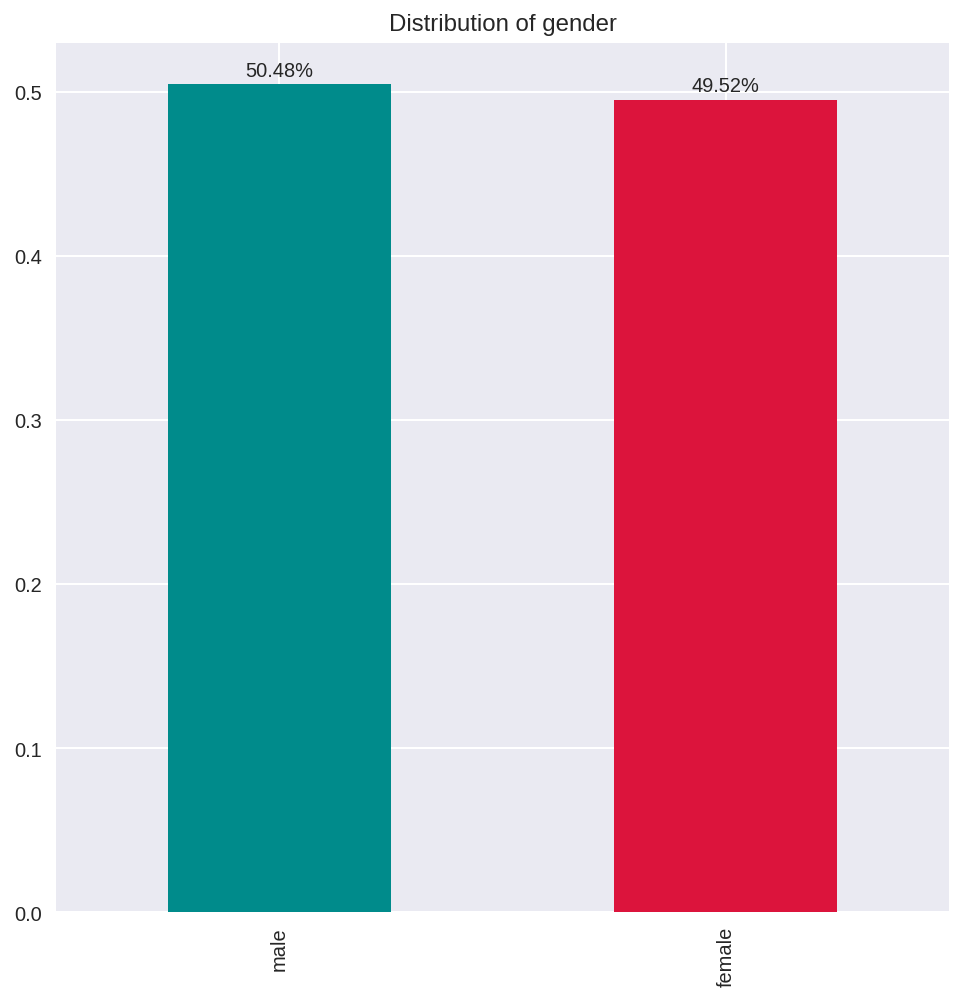

In [44]:
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

gender_plot = df_data.gender.value_counts(normalize=True).plot(kind='bar', figsize=(8,8), color=['#008B8B', '#DC143C'])
plt.title('Distribution of gender')


for p in gender_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    gender_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.show()

#### seniorcitizen column

The values in the `seniorcitizen` column had more values of customers who were not senior citizens. The data in this column presented 83.79% of the values with customers who did not identified as senior citizens, and 16.21% of the customers who did identified as a senior citizen. 

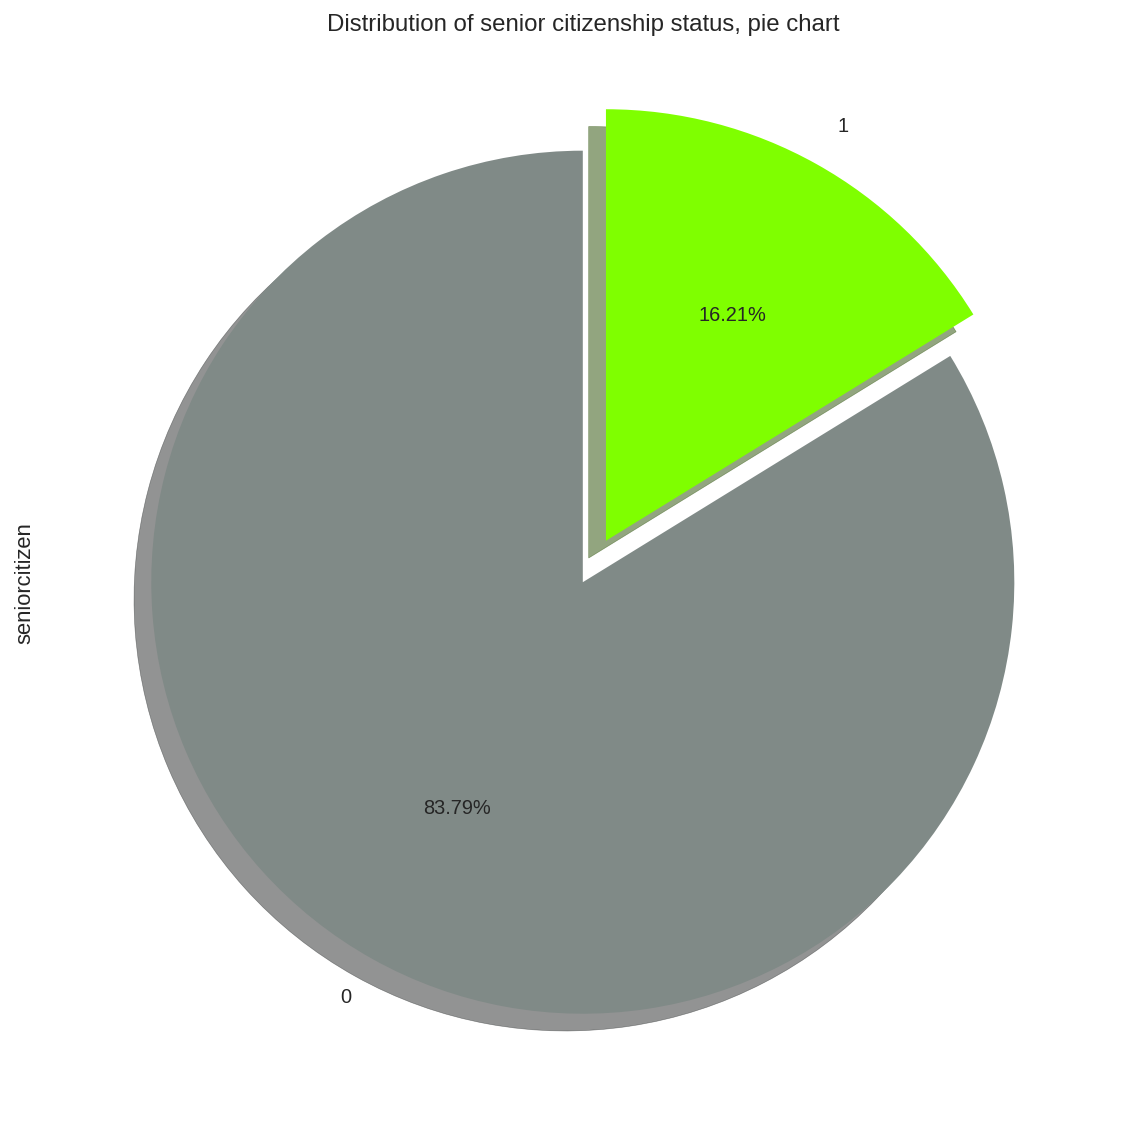

In [45]:
df_data.seniorcitizen.value_counts(normalize=True).plot(kind='pie',
                figsize=(8,8), autopct='%1.2f%%', colors=['#808A87', '#7FFF00'], 
                shadow=True, startangle=90, explode=(0,0.11))

plt.title('Distribution of senior citizenship status, pie chart')
plt.tight_layout()
plt.show()

#### partner column
The partner column had approximately and equally distribution of its values. From this column, we discovered that 51.70% of the customers had no partner, while 48.30% of the customers had a partner. 

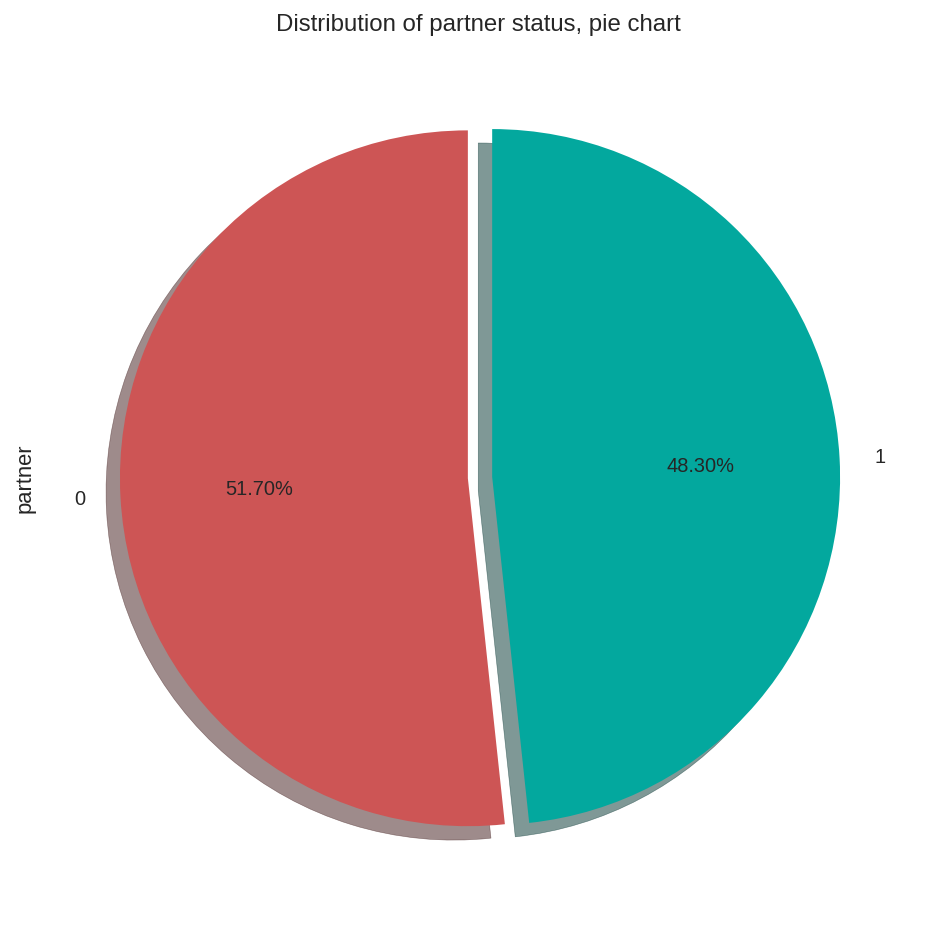

In [46]:
# maintain consistency as other columns, 0 for no, 1 for yes.
df_data.partner.replace(['no', 'yes'], [0,1], inplace=True)

df_data.partner.value_counts(normalize=True).plot(kind='pie',
            figsize=(8,8), autopct='%1.2f%%', colors=['#CD5555', '#03A89E'], 
            shadow=True, startangle=90, explode=(0.03,0.04))
plt.title('Distribution of partner status, pie chart')
plt.show()

In this section, we analyzed if the distribution of customers who had a partner were different based on gender and citizenship status. From the plot below, we observed that the distributions of customers who had a partner vs. senior citizenship were similar between both genders. 

gender         female  male
seniorcitizen              
0                1440  1389
1                 248   325



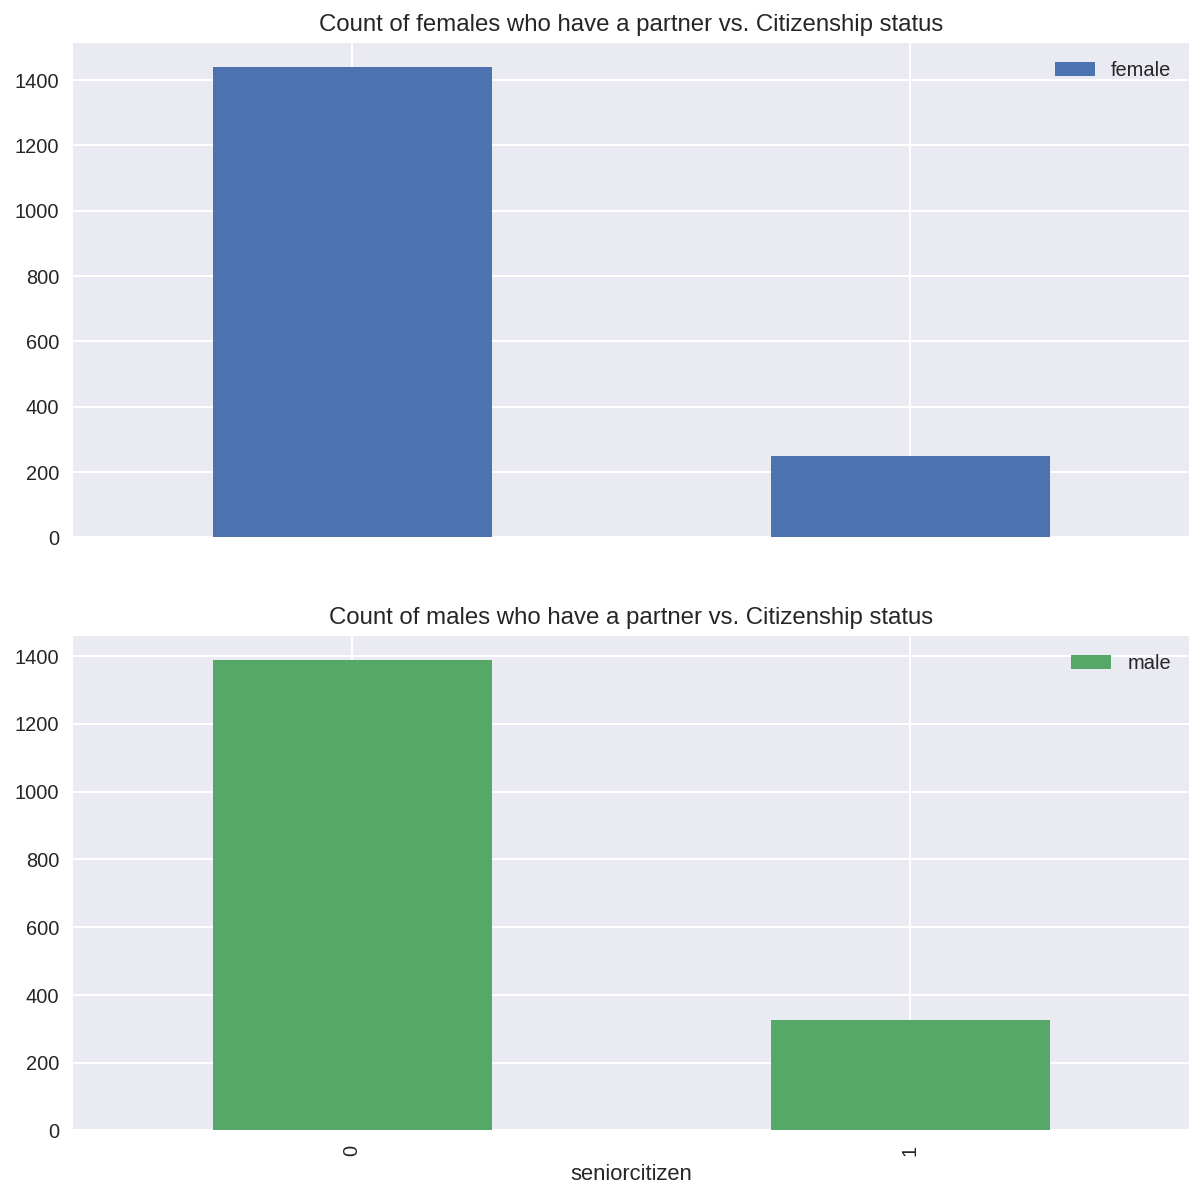

In [47]:
pivot_gpc = pd.pivot_table(df_data, values='partner', index='seniorcitizen', columns='gender', aggfunc='sum')

print(pivot_gpc)
print()
bar_gcp = pivot_gpc.plot(kind='bar', figsize=(10,10), subplots=True)

#plt.title('Distribution of partner status based on senior citizenship status and gender ')

bar_gcp[0].set_title("Count of females who have a partner vs. Citizenship status")
bar_gcp[1].set_title("Count of males who have a partner vs. Citizenship status")


plt.show()

#### dependents column
In this section, we discovered that 70.04% of the customers had dependents, and the remaining 29.96% did not have dependents. 

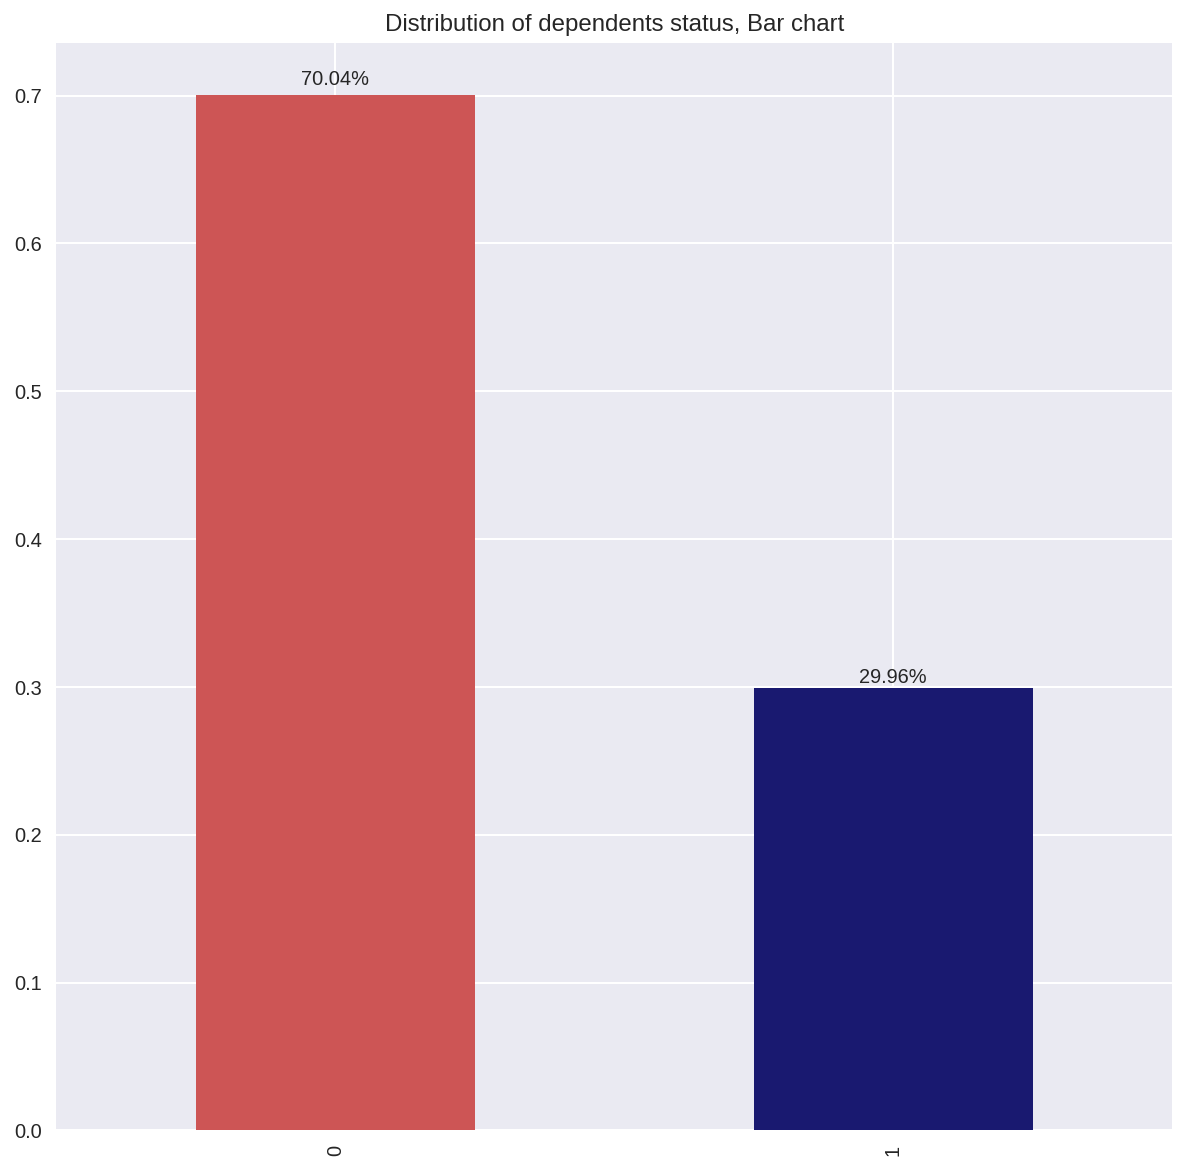

In [48]:
# maintain consistency as other columns, 0 for no, 1 for yes.
df_data.dependents.replace(['Yes', 'No'],[1, 0], inplace=True)
df_data.dependents

dpdnt_plot = df_data.dependents.value_counts(normalize=True).plot(kind='bar', figsize=(10,10), color=['#CD5555', '#191970'])
plt.title('Distribution of dependents status, Bar chart')

for p in dpdnt_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    dpdnt_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')

plt.show()

In this section, we analyzed if the distribution of having dependents was affected by gender and partnership status. The plot `gd_plot` shows how the distribution of having dependents is not affected by gender, as customer who did not have a partner had less counts of having dependents compared to those who did have a partner. The distributions were similar for both males and females. 

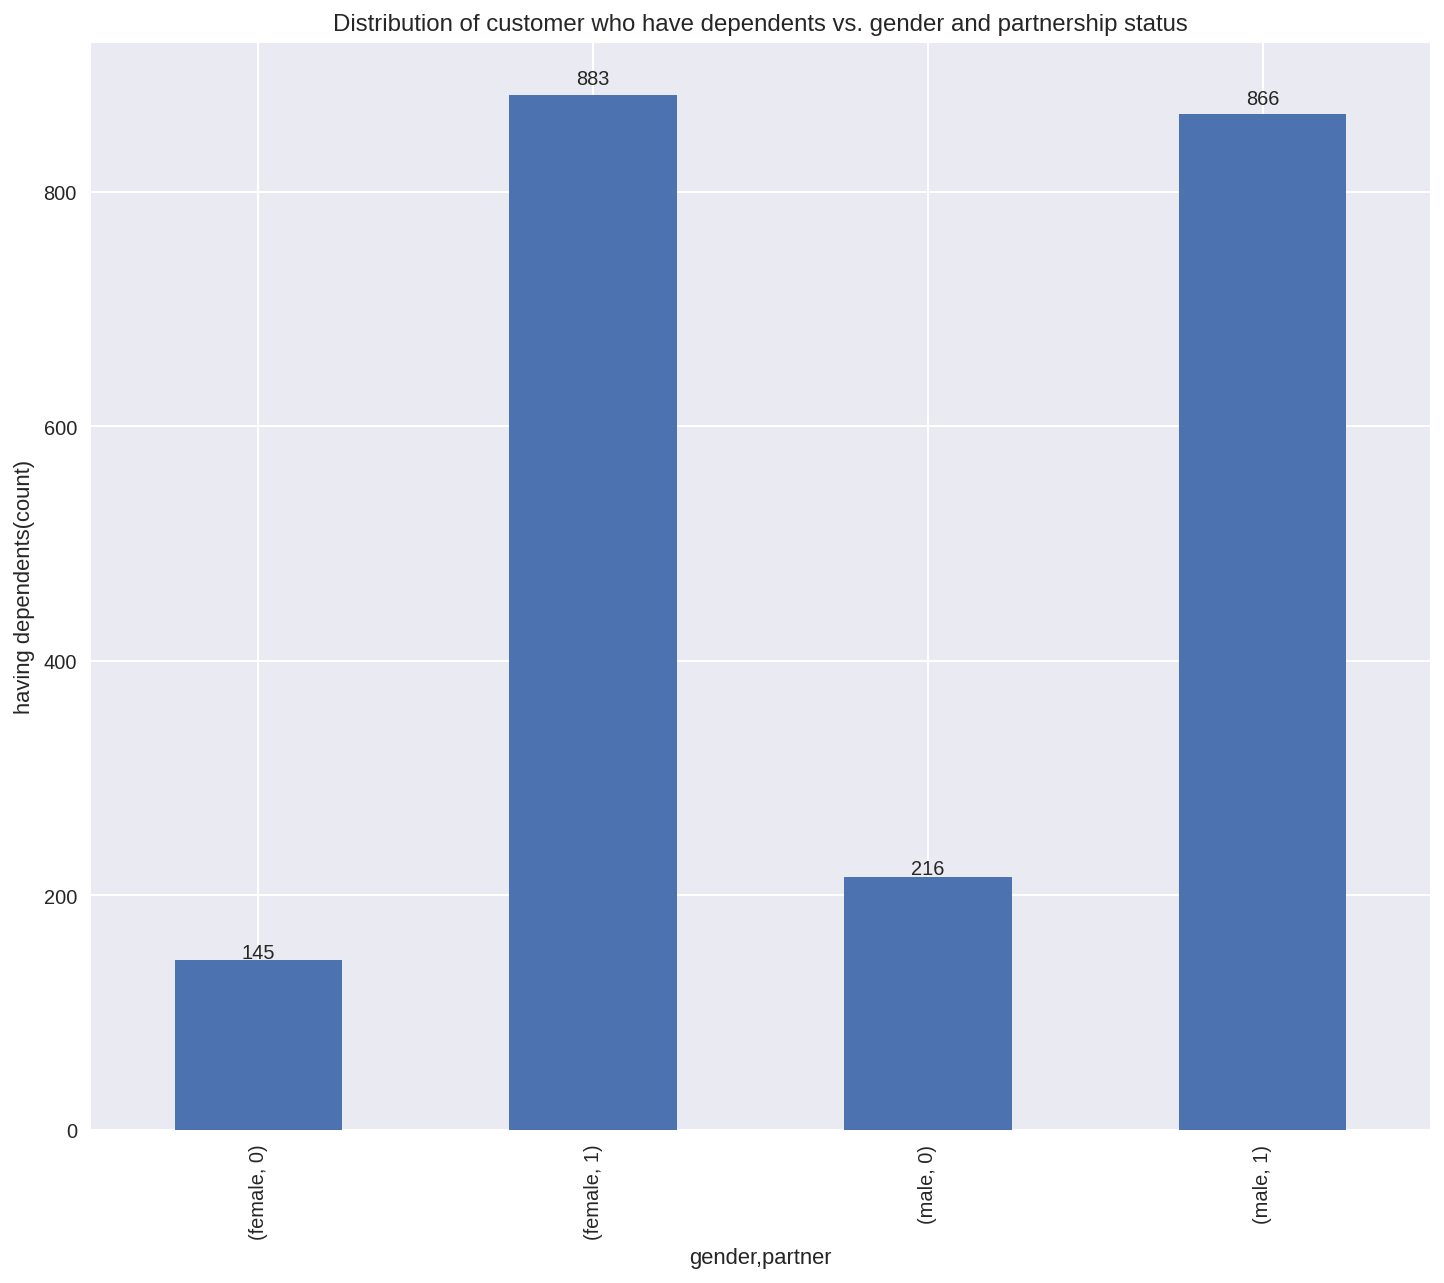

In [49]:
gd_plot = df_data.groupby(['gender', 'partner'])['dependents'].sum().plot(kind='bar', figsize=(12,10))

for p in gd_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    gd_plot.annotate(f'{height:}', (x + width/2, y + height*1.01), ha='center')
plt.ylabel('having dependents(count)')
plt.title('Distribution of customer who have dependents vs. gender and partnership status')
plt.show()

#### begindate column
In this section, we analyzed how the begin date was distributed over the years. From the plot below, we observe the years that customers began services with Interconnect. We observed that the years that had the highest begin dates were 2018, 2014 and 2019 with value counts of 1030, 1344, and 1957 customers, respectively. 

2019    1957
2014    1344
2018    1030
2015     852
2017     845
2016     763
2020     244
2013       8
Name: year, dtype: int64


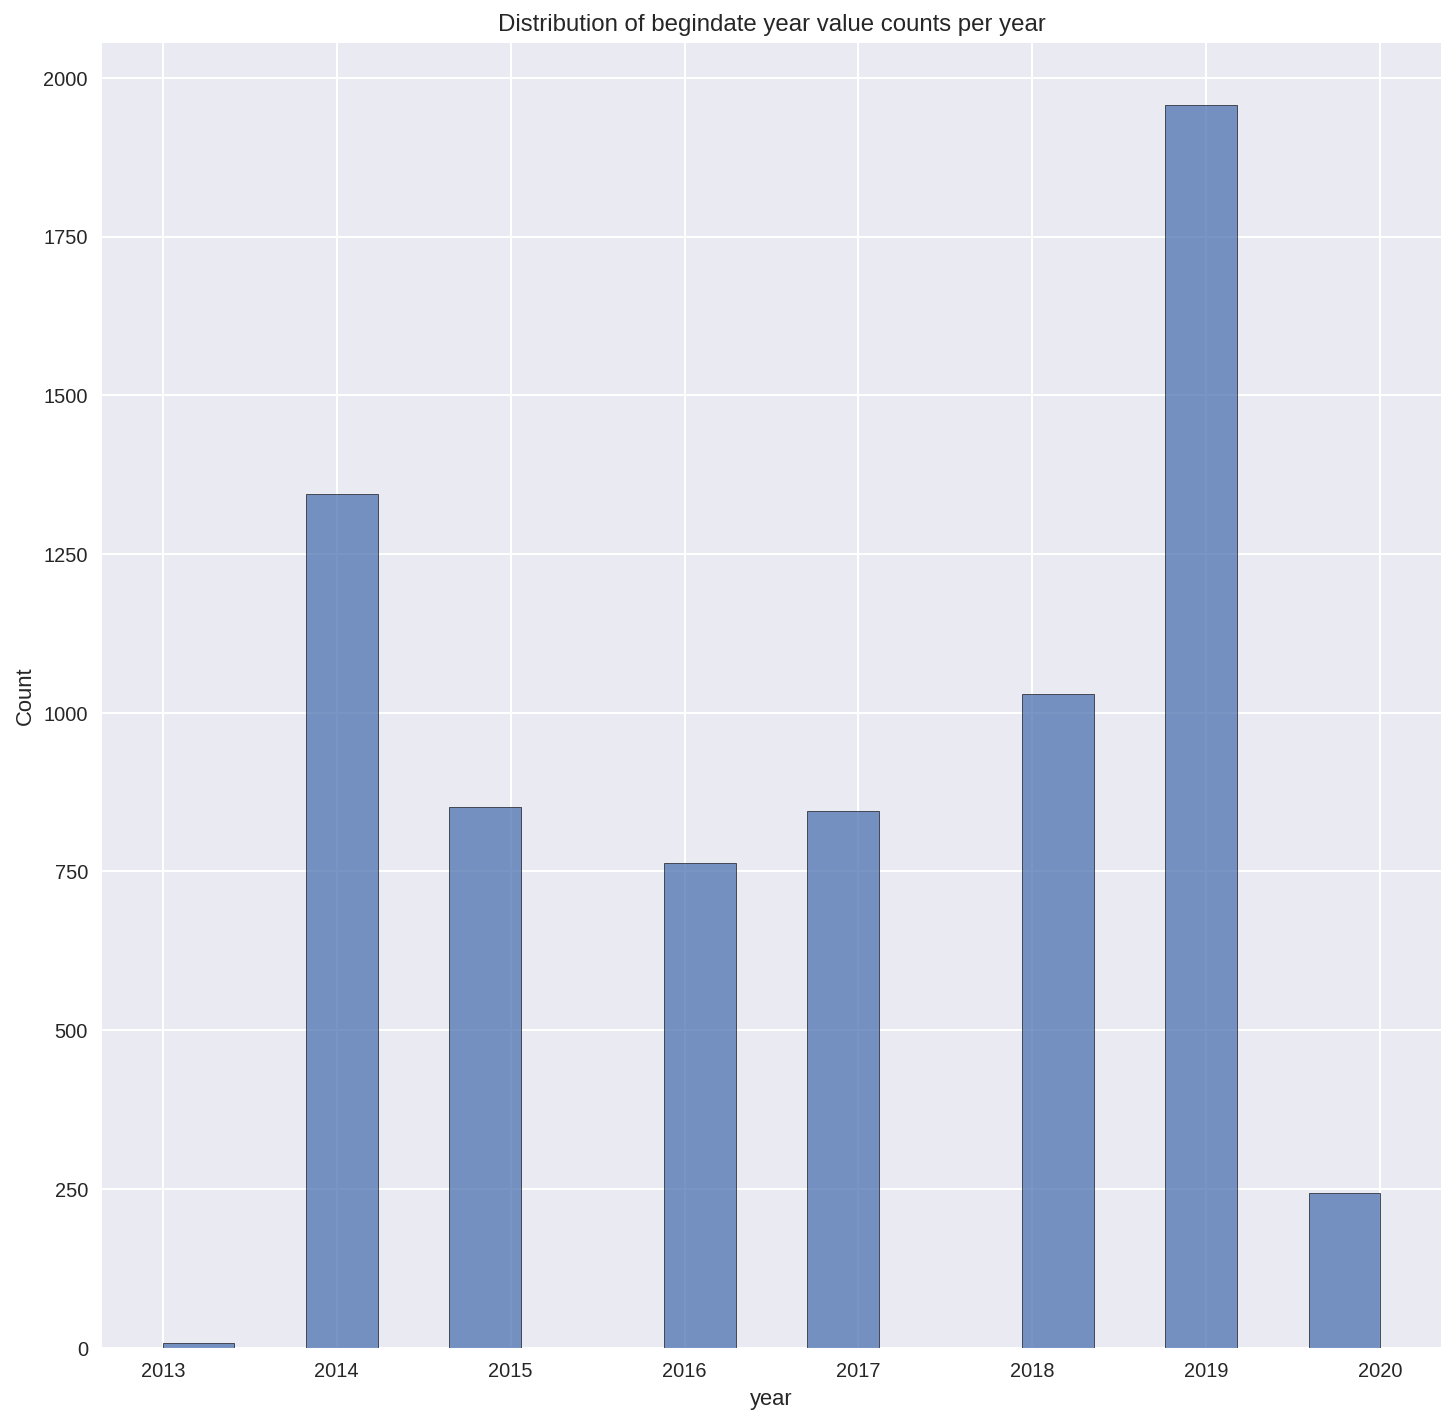

In [50]:
#creating new dataframe to analyze begindate data 
begindate_data = pd.DataFrame(df_data['begindate'].dt.year)
begindate_data['month'] = df_data['begindate'].dt.month
begindate_data.columns = ['year', 'month']
plt.figure(figsize=(12,12))

print(begindate_data.year.value_counts())
sns.histplot(data=begindate_data, x='year', palette='viridis')

plt.title('Distribution of begindate year value counts per year')
plt.plot()
plt.show()

In this section, we analyzed how the begin date was distributed over the years hued per month, depicted in the plot below. 

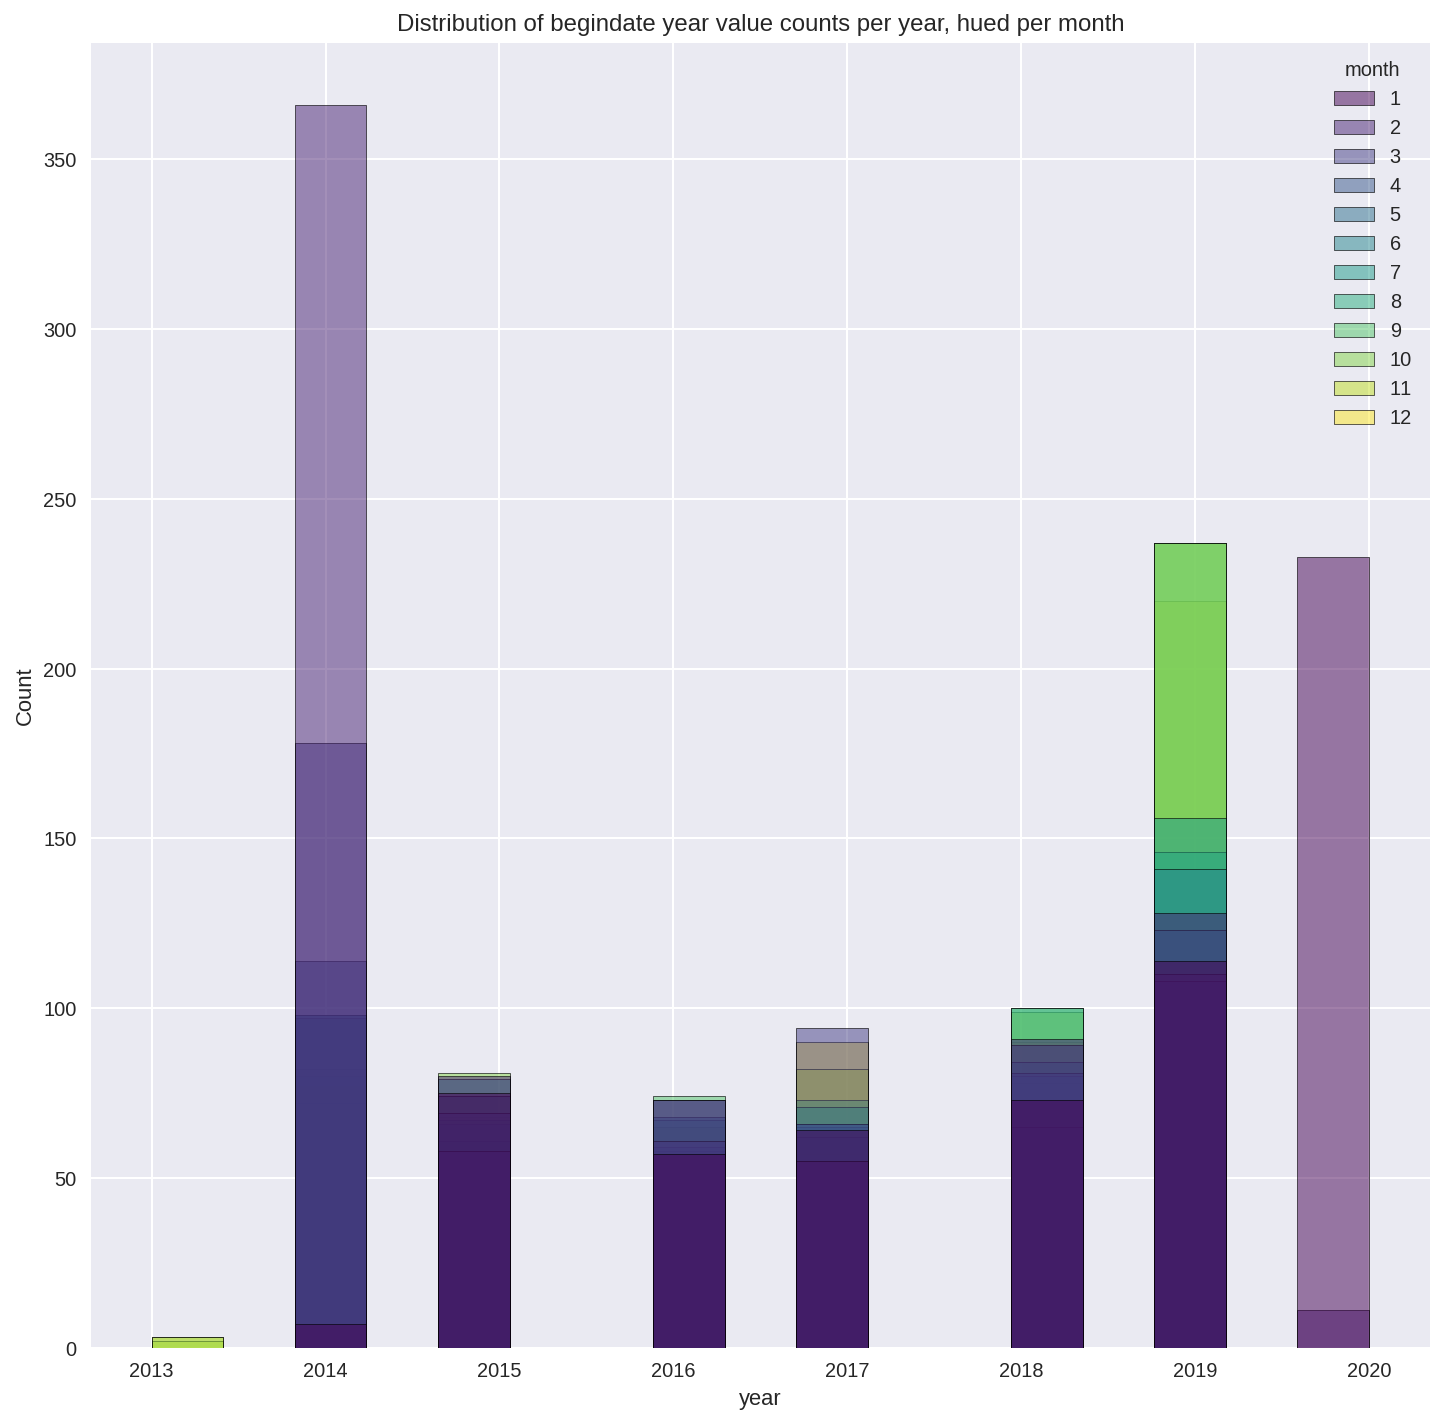

In [51]:
plt.figure(figsize=(12,12))
sns.histplot(data=begindate_data, x='year', hue='month', palette='viridis')

plt.title('Distribution of begindate year value counts per year, hued per month')
plt.show()

The plot below depicts the count of months in which customers began services with interconnect, per year. The green gradient can be used as a scale to observe the density distribution of begin month over the years. From This plot, we observed that the highest density in begin month counts was around February, 2014 followed by dates between September, 2019 to December, 2019 and also in January, 2020. 

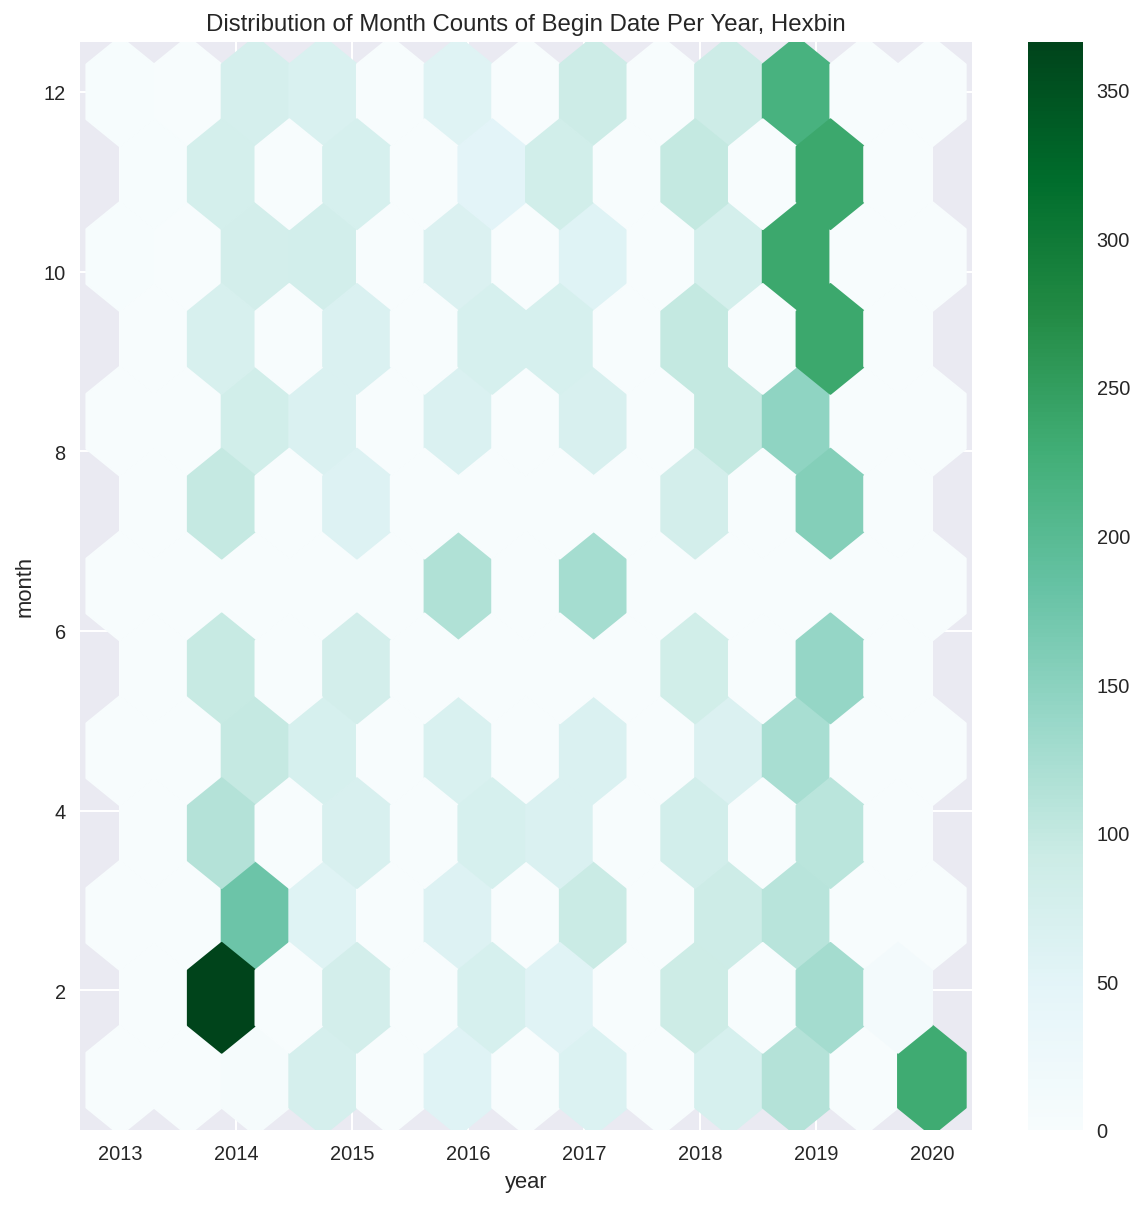

In [52]:
begindate_data.plot(x='year', y='month', kind='hexbin', figsize=(10,10), gridsize=12, sharex=False)
plt.title('Distribution of Month Counts of Begin Date Per Year, Hexbin')
plt.show()

The plot below depicts the begin date counts (month and year) distrution. From this plot, we analzed that we had a local maximum in February, 2014 and also between September,2019 and November, 2019. 

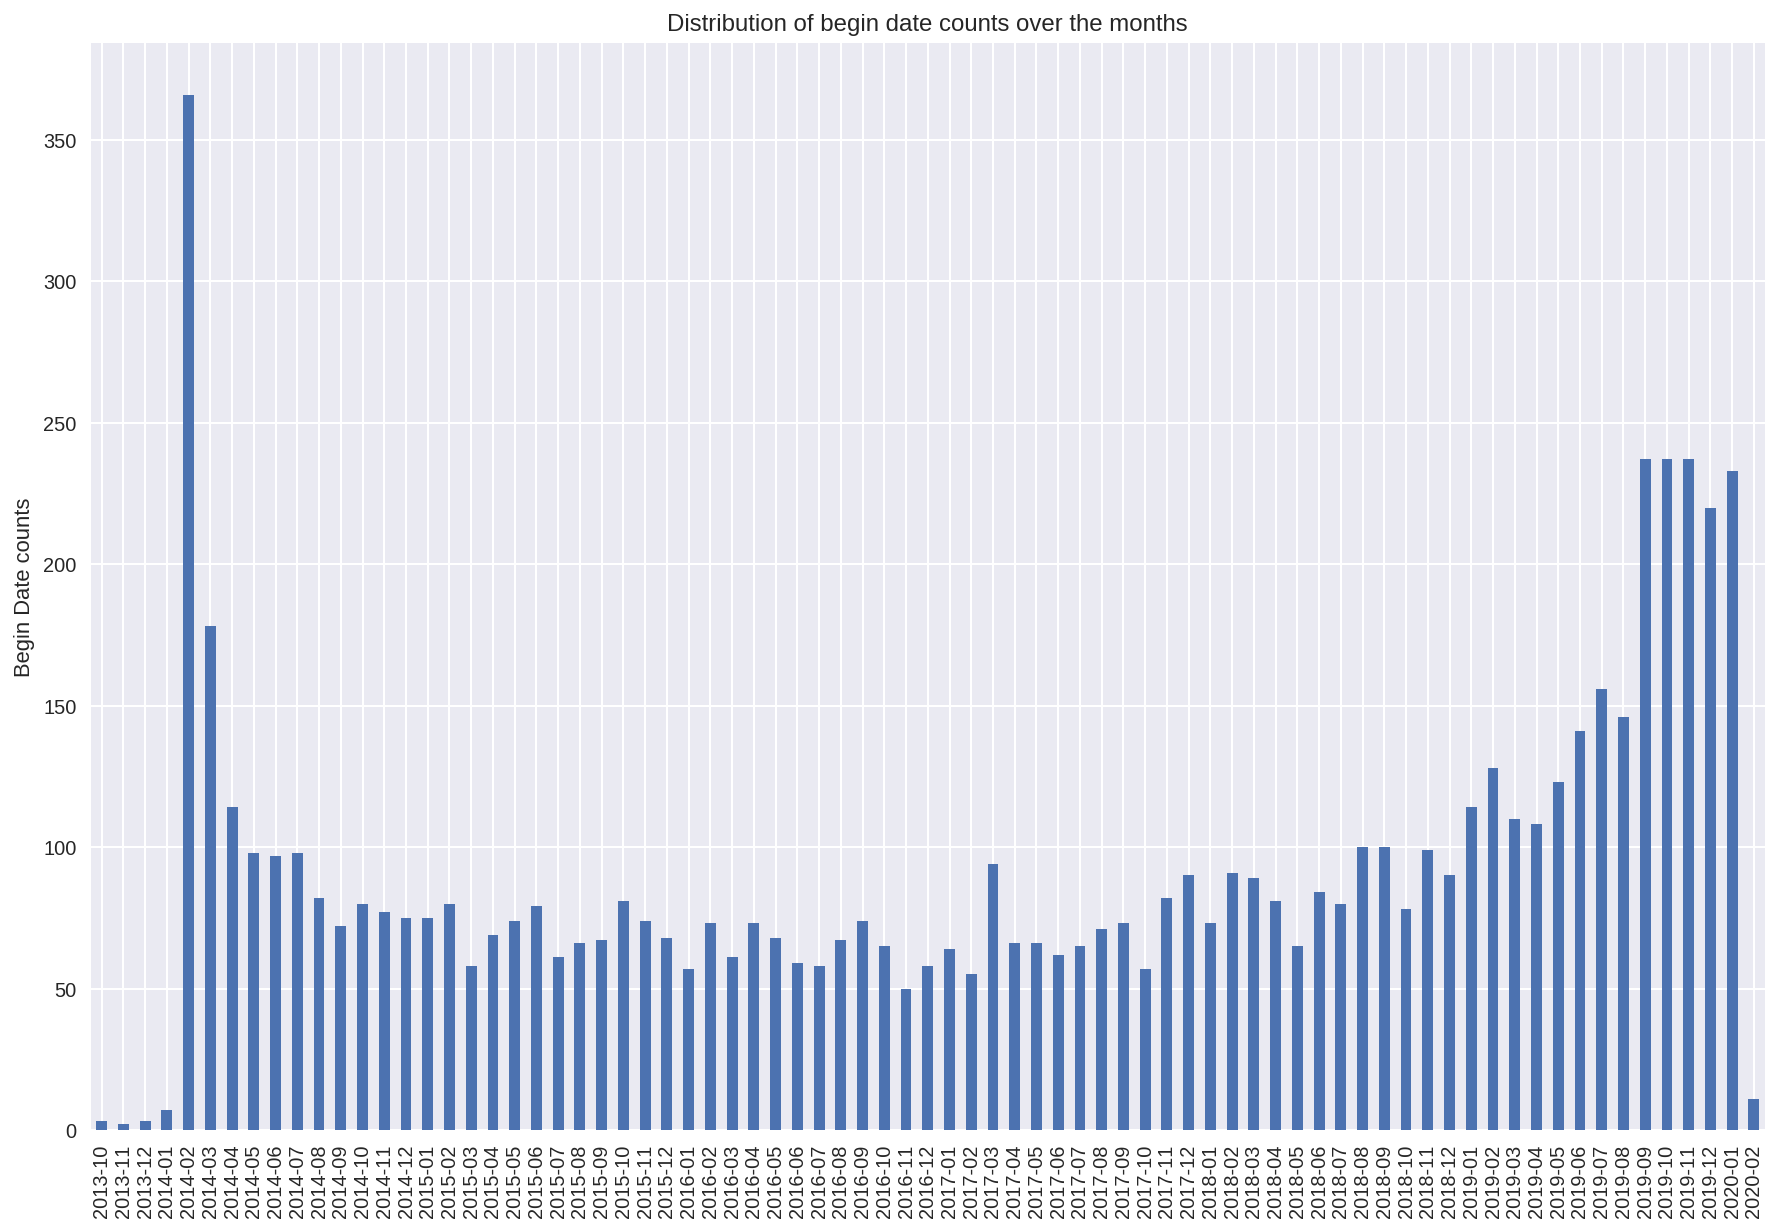

In [53]:
#Distribution of begin over the months.

begin_months = df_data.begindate.dt.to_period('M').value_counts().sort_index().plot(kind='bar', figsize=(15,10))
plt.title('Distribution of begin date counts over the months')
plt.ylabel('Begin Date counts')

plt.show()

#### enddate column
This columns was not be selected for machine learning training/testing. It was used to create the target column `exited`. If the customer had an end date, then it was assigned with value of 1; if the customer had a values 'No', then it was assigned with a vale of 0. 

The plot below depicts the distribution of months count that the customers lasted with the services of the company. This plot only contains the month duration of the customers who left the services. From the distribution, we observed that the customers who left the services of Interconnect had an average, mean, and standard deviation values of 17.98, 9.98, and 19.52 months. The distrbtions is positively skewed, with a maximum of 71.98 months and minimum of 0.98 months. The violinplot depicts the Kernen density estimate of the dration that the customers lasted with the services of Interconnect. 

/tmp/ipykernel_41/3440058994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_exit['enddate'] = pd.to_datetime(customers_exit['enddate'])


count    1869.000000
mean       17.983188
std        19.528602
min         0.985647
25%         2.004148
50%         9.987885
75%        29.010863
max        71.985051
dtype: float64


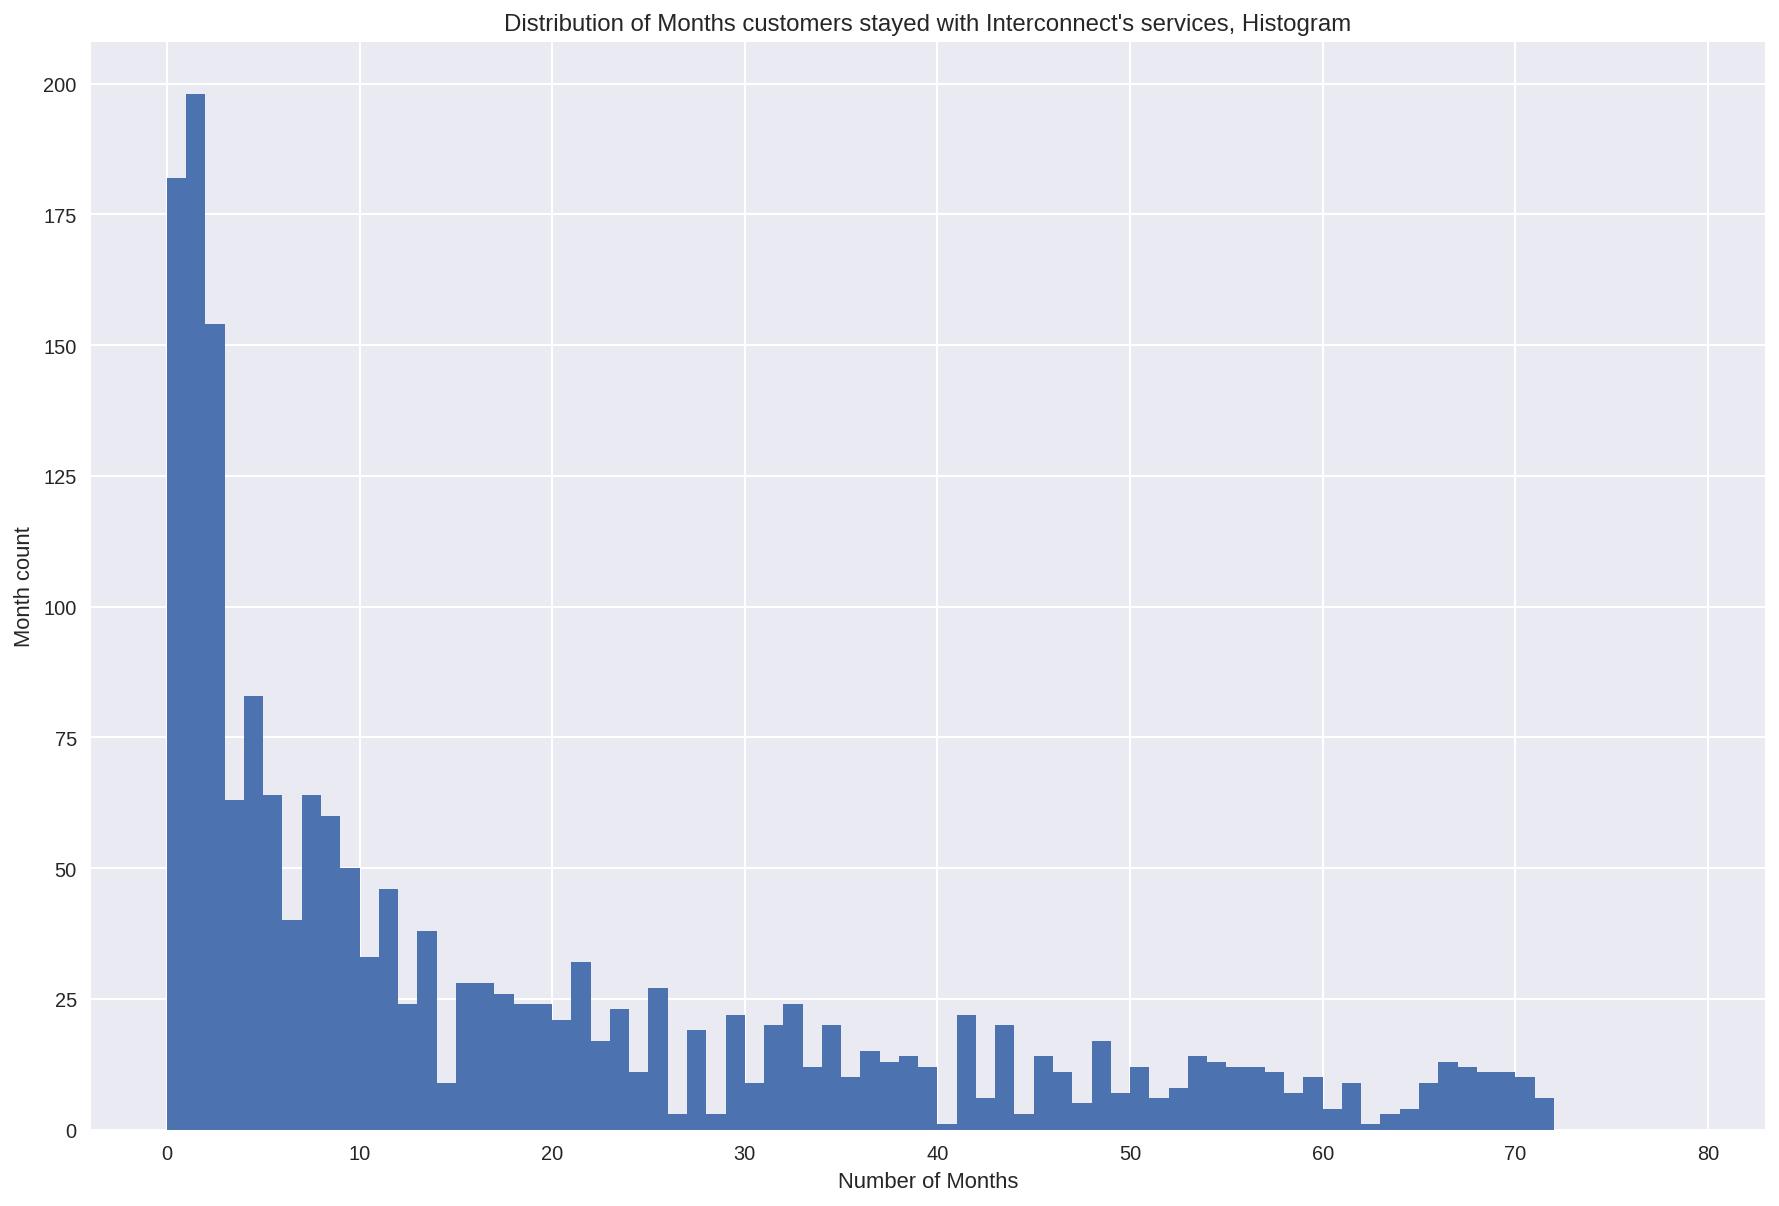

count    1869.000000
mean       17.983188
std        19.528602
min         0.985647
25%         2.004148
50%         9.987885
75%        29.010863
max        71.985051
dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


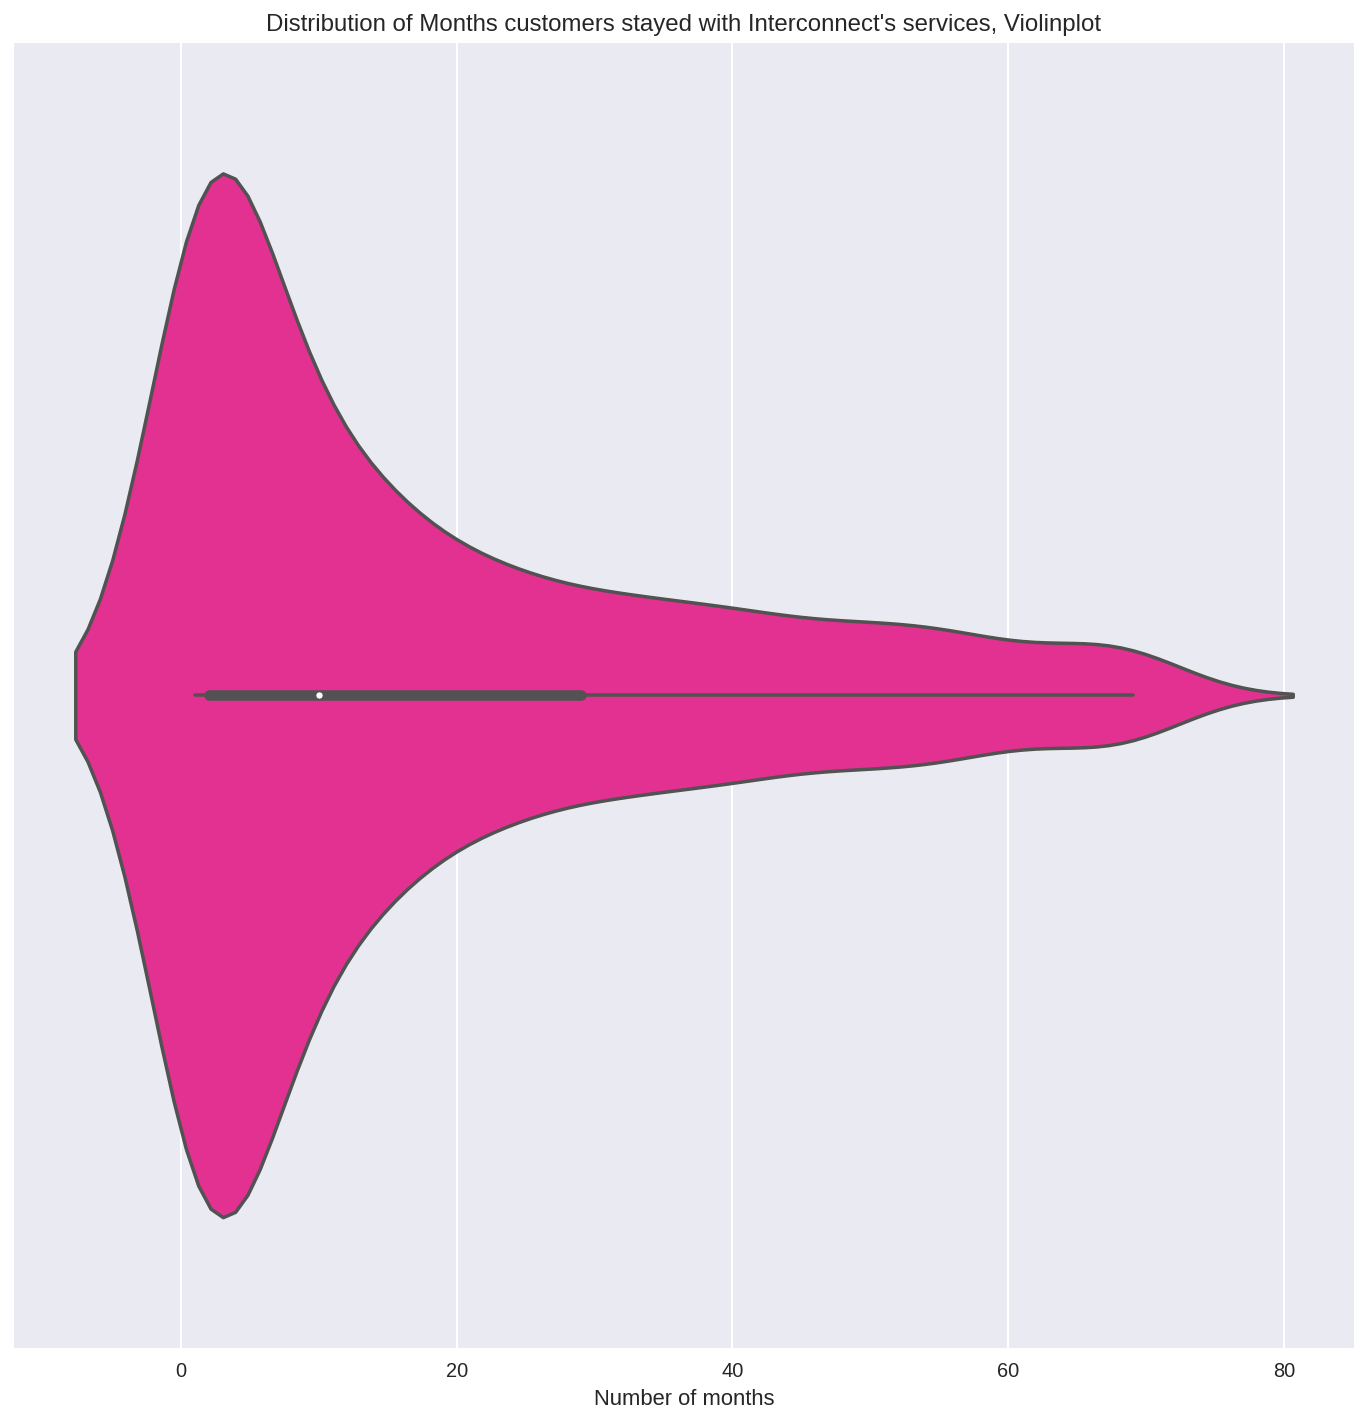

In [54]:
customers_exit = df_data.query('enddate != "No"')
customers_exit['enddate'] = pd.to_datetime(customers_exit['enddate'])

delta_days = customers_exit['enddate'].sub(customers_exit['begindate'], axis=0)
delta_months = delta_days / np.timedelta64(1, 'M')
delta_months.hist(bins= np.arange(0,80,1) , figsize=(15,10))
print(delta_months.describe())
plt.xlabel('Number of Months')
plt.ylabel("Month count")
plt.title('Distribution of Months customers stayed with Interconnect\'s services, Histogram')
plt.show()

plt.figure(figsize=(12,12))
print(delta_months.describe())
sns.violinplot(delta_months, color ='#FF1493')
plt.title('Distribution of Months customers stayed with Interconnect\'s services, Violinplot')

plt.xlabel('Number of months')
plt.show()

In [55]:
#creating target column for customers to distingish the customers that left the company vs. remain with 
#interconnect's services

def churned(row):
    enddate = row['enddate']
    
    if enddate == "No":
        return 0
    return 1

df_data['churned'] = df_data.apply(churned, axis=1)

In [56]:
#checking if chuned column was created successfully
df_data.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,...,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churned
0,7590-VHVEG,female,0,1,0,2020-01-01,No,monthly,yes,electronic_check,...,29.85,NaN,dsl,no,yes,no,no,no,no,0
1,5575-GNVDE,male,0,0,0,2017-04-01,No,1_year,no,mailed_check,...,1889.50,no,dsl,yes,no,yes,no,no,no,0
2,3668-QPYBK,male,0,0,0,2019-10-01,2019-12-01 00:00:00,monthly,yes,mailed_check,...,108.15,no,dsl,yes,yes,no,no,no,no,1
3,7795-CFOCW,male,0,0,0,2016-05-01,No,1_year,no,bank_transfer_automatic,...,1840.75,NaN,dsl,yes,no,yes,yes,no,no,0
4,9237-HQITU,female,0,0,0,2019-09-01,2019-11-01 00:00:00,monthly,yes,electronic_check,...,151.65,no,fiber_optic,no,no,no,no,no,no,1


In [57]:
#deleting enddate column to avoid redundant data
df_data.drop('enddate', axis=1, inplace=True)
df_data.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churned
0,7590-VHVEG,female,0,1,0,2020-01-01,monthly,yes,electronic_check,29.85,29.85,NaN,dsl,no,yes,no,no,no,no,0
1,5575-GNVDE,male,0,0,0,2017-04-01,1_year,no,mailed_check,56.95,1889.50,no,dsl,yes,no,yes,no,no,no,0
2,3668-QPYBK,male,0,0,0,2019-10-01,monthly,yes,mailed_check,53.85,108.15,no,dsl,yes,yes,no,no,no,no,1
3,7795-CFOCW,male,0,0,0,2016-05-01,1_year,no,bank_transfer_automatic,42.30,1840.75,NaN,dsl,yes,no,yes,yes,no,no,0
4,9237-HQITU,female,0,0,0,2019-09-01,monthly,yes,electronic_check,70.70,151.65,no,fiber_optic,no,no,no,no,no,no,1


#### type column
For the values in the type column, we observed that 55.02% of the customers had a monthly contract; 24.07% of the customers had a two year contract; and 20.91% of the customers had a 1 year contract with the services in interconnect company. 

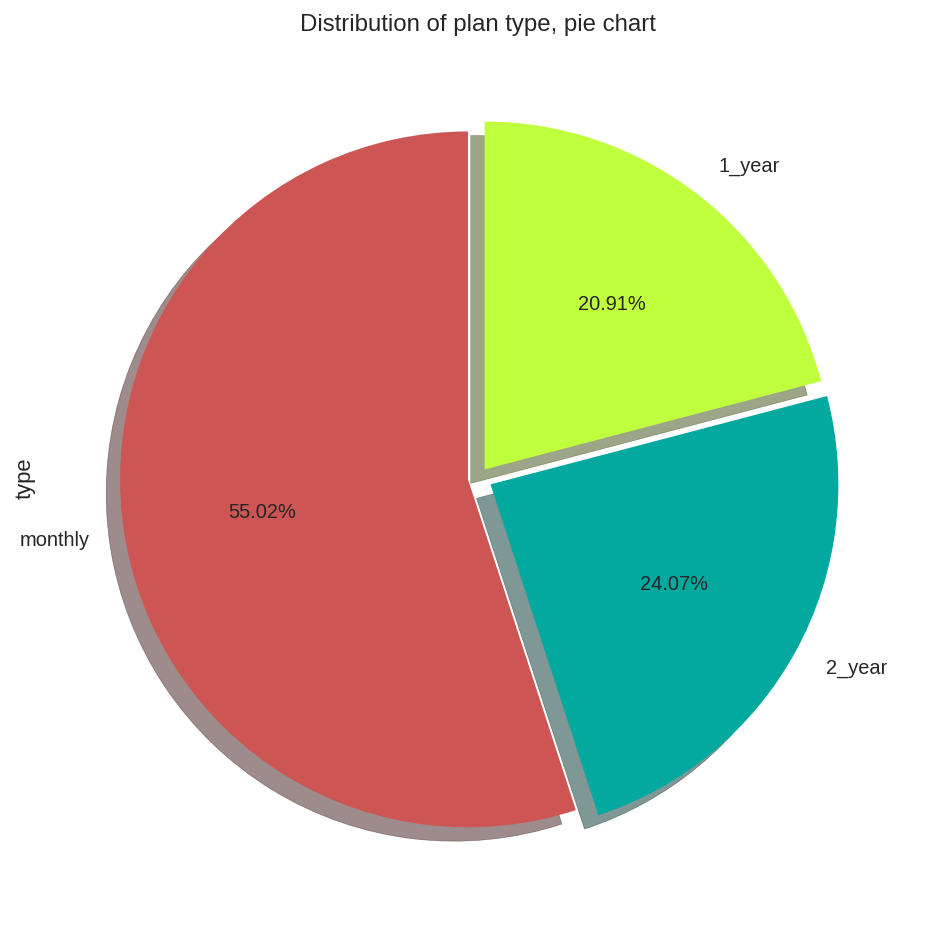

In [58]:
df_data.type.value_counts(normalize=True).plot(kind='pie', figsize=(8,8), 
            autopct='%1.2f%%', colors=['#CD5554', '#03A89E', '#C0FF3E'], 
            shadow=True, startangle=90, explode=(0.03,0.04, 0.03))

plt.title('Distribution of plan type, pie chart')
plt.show()

#### paperlessbilling column

For the values in the paperlessbilling column, we observed that 59.22% of the customer did have the paperless billing option, while 40.77% of the customer did not have the paperless billing option. We also compared how senior citizen and gender affected the counts of customers who had paperless billing option. From the values in the column, we observed that there was not a significant difference between gender, but there was a significant difference between senior citizen status. We found that people who did not identified as a senior citizen had more counts in paperless billing, compared to people who identified as senior citizen. 

In [59]:
#repacing values in column to keep consistency with other columns. if yes, values was replaced with 1;
# if no, value was replaced with 0
df_data.paperlessbilling.replace(['yes', 'no'], [1,0], inplace=True)
df_data.paperlessbilling.head()

df_data.paperlessbilling.value_counts(normalize=True)

df_data.pivot_table(index='seniorcitizen', columns='gender',values='paperlessbilling', aggfunc='sum')

gender,female,male
seniorcitizen,,
0,1650,1645
1,436,440


#### paymentmethod column

In this section, we observed the distribution of payment methods in the column, and we found ot that 33.58% of the customers paid with electronic check; 22.89% of the customers paid their charges with with mailed check; and 21.92% and 21.61% of the cusotmers paid their charges with bank transfer automatic and credit card automatic, respectively. 

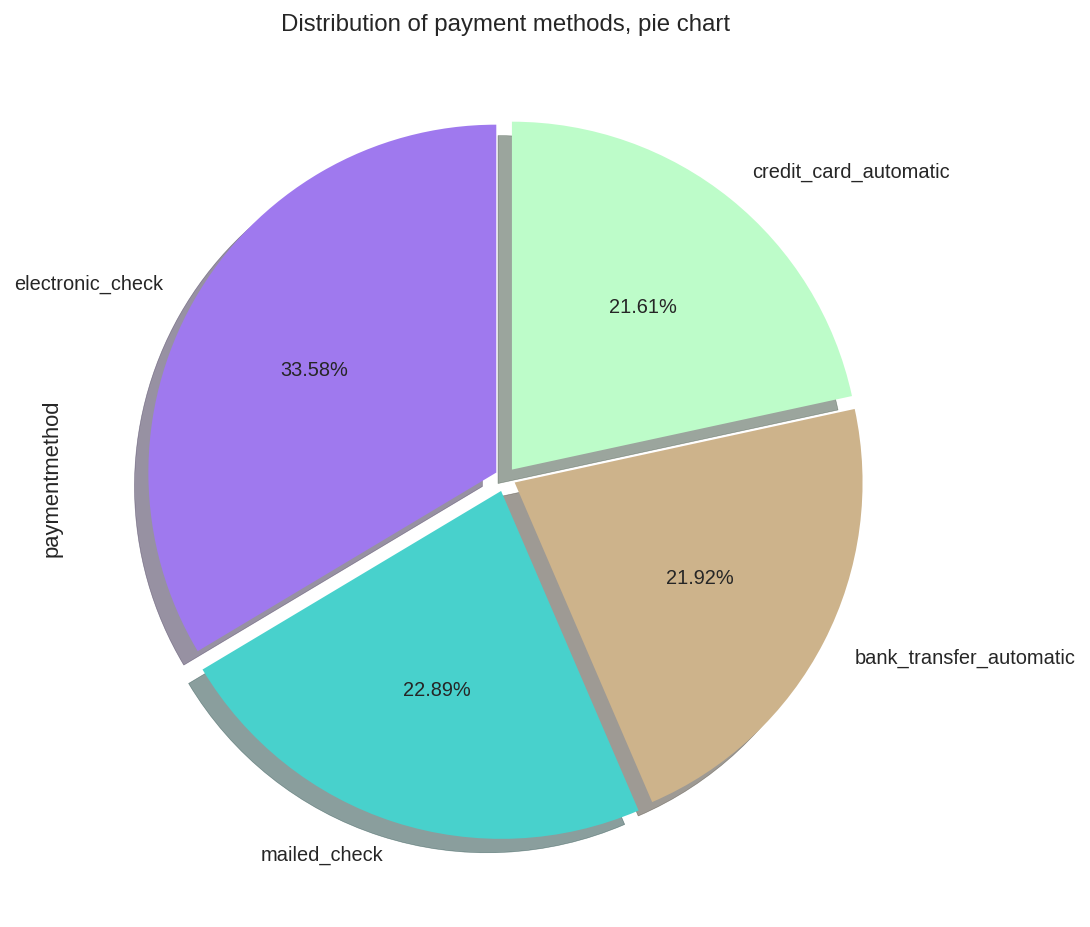

In [60]:
df_data.paymentmethod.value_counts(normalize=True).plot(kind='pie', figsize=(8,8), 
            autopct='%1.2f%%', colors=['#9F79EE', '#48D1CC', '#CDB38B', '#BDFCC9'], 
            shadow=True, startangle=90, explode=(0.03,0.04, 0.03, 0.03))
plt.title('Distribution of payment methods, pie chart')
plt.show()

#### monthlycharges column

In this section, we explored the distribution of monthly charges of the customers. From the data provided, we concluded that the the mean, median, and standard deviation vales of monthly charges were 64.76, 70.35, and 30.09 USD, respectively. We found that the distribution of the monthly charges was negatively skewed. The Kernel Density Estimate plot and the violin plot depict the density distribution of the monthly charges values. 

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64


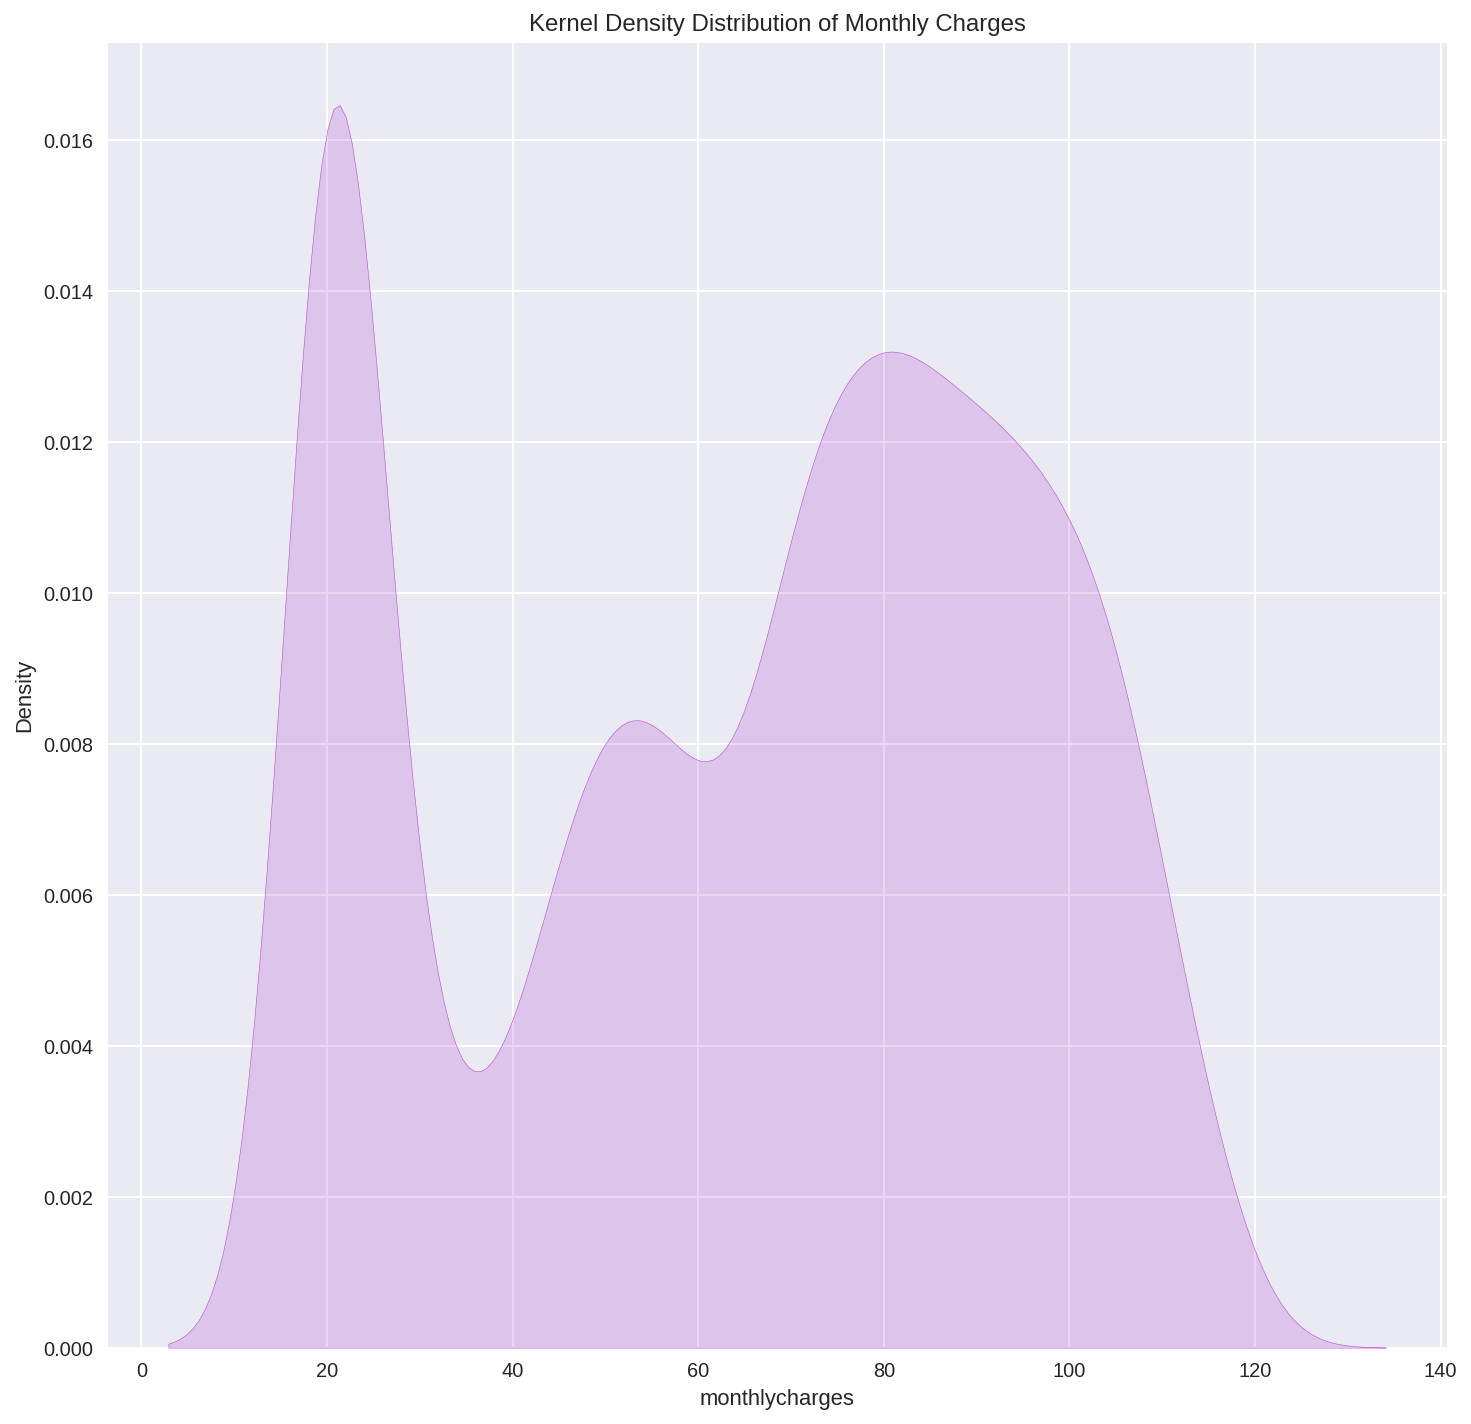

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


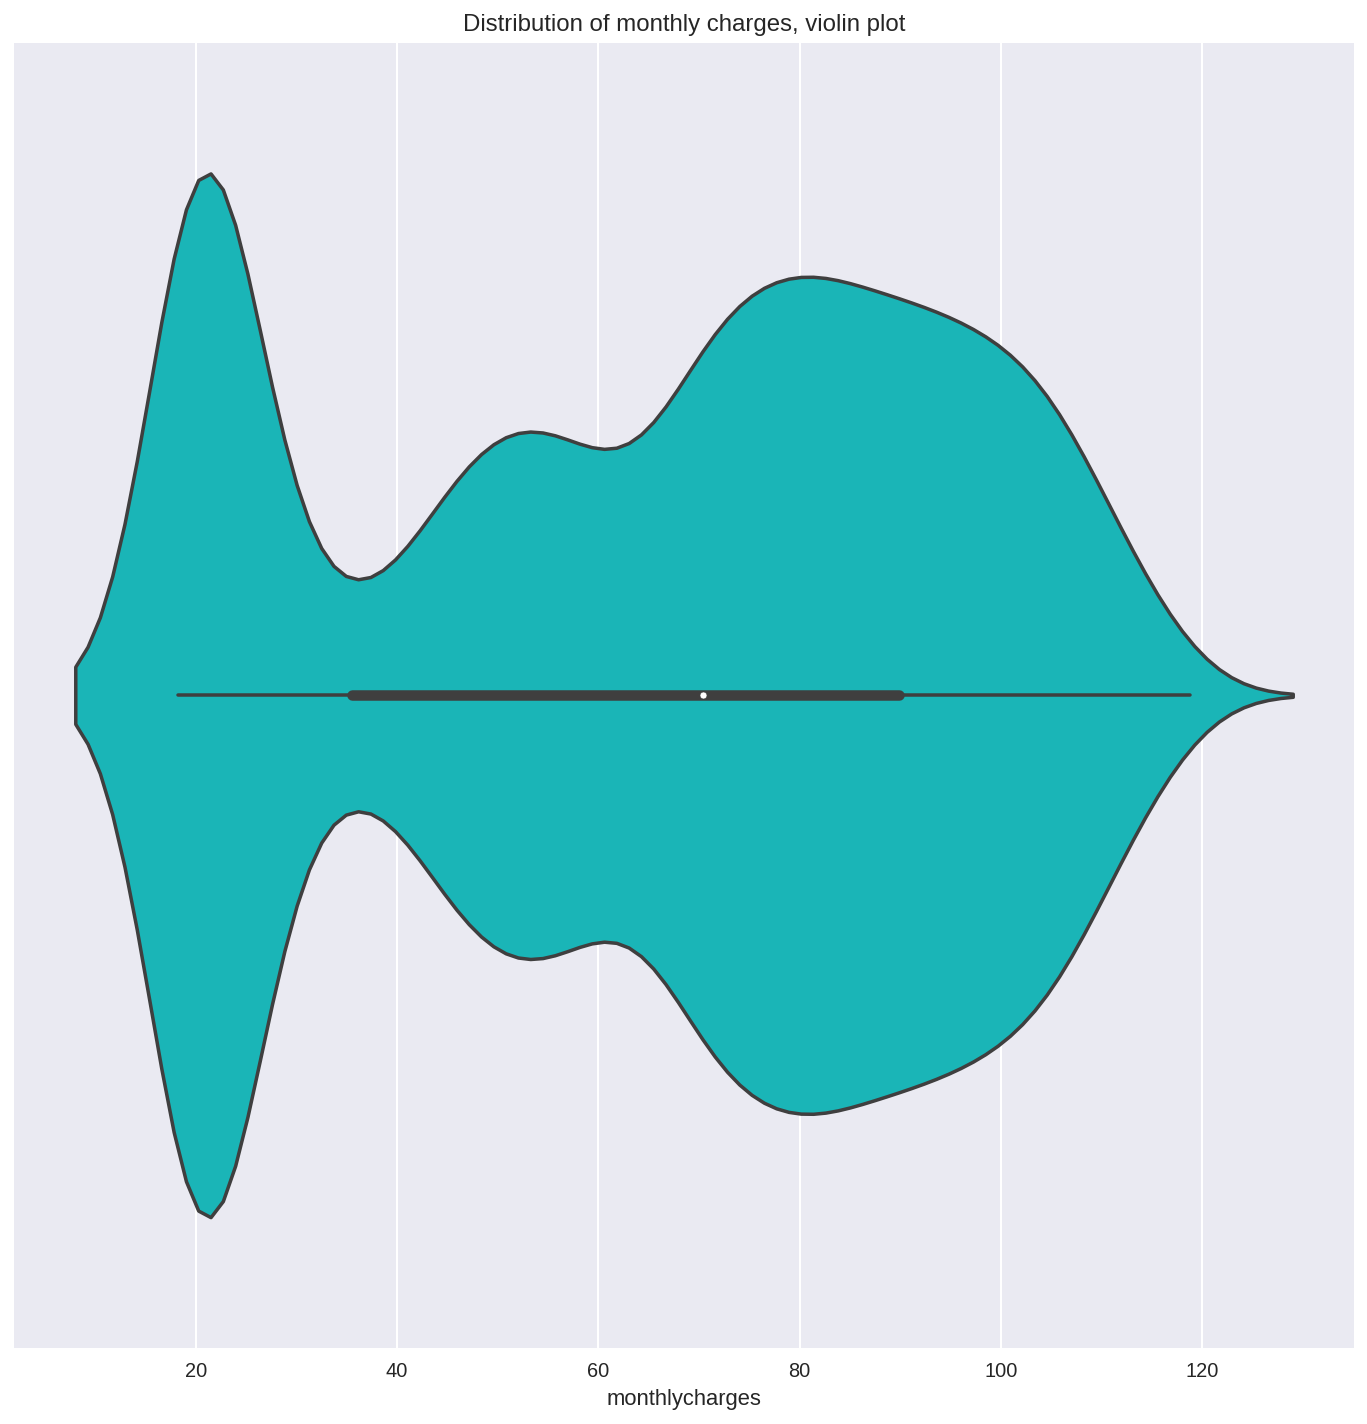

In [61]:
plt.figure(figsize=(12,12))
sns.kdeplot(data = df_data.monthlycharges, shade=True, color='#BA55D3')
plt.title('Kernel Density Distribution of Monthly Charges')
print(df_data.monthlycharges.describe())
plt.show()

plt.figure(figsize=(12,12))
sns.violinplot(df_data.monthlycharges, color ='#00CED1')
plt.title('Distribution of monthly charges, violin plot')
plt.show()

For the remaining of the columns, we replaced the missing values with 'unknown' value. 

#### multiplelines column
For the column multiplelines, we found that 48.13% of our customers did not have multiple lines in their phone contract; 42.18% of the customer did have multiple lines; and 9.68% of the customer's information about having multiple lines was unknown. 

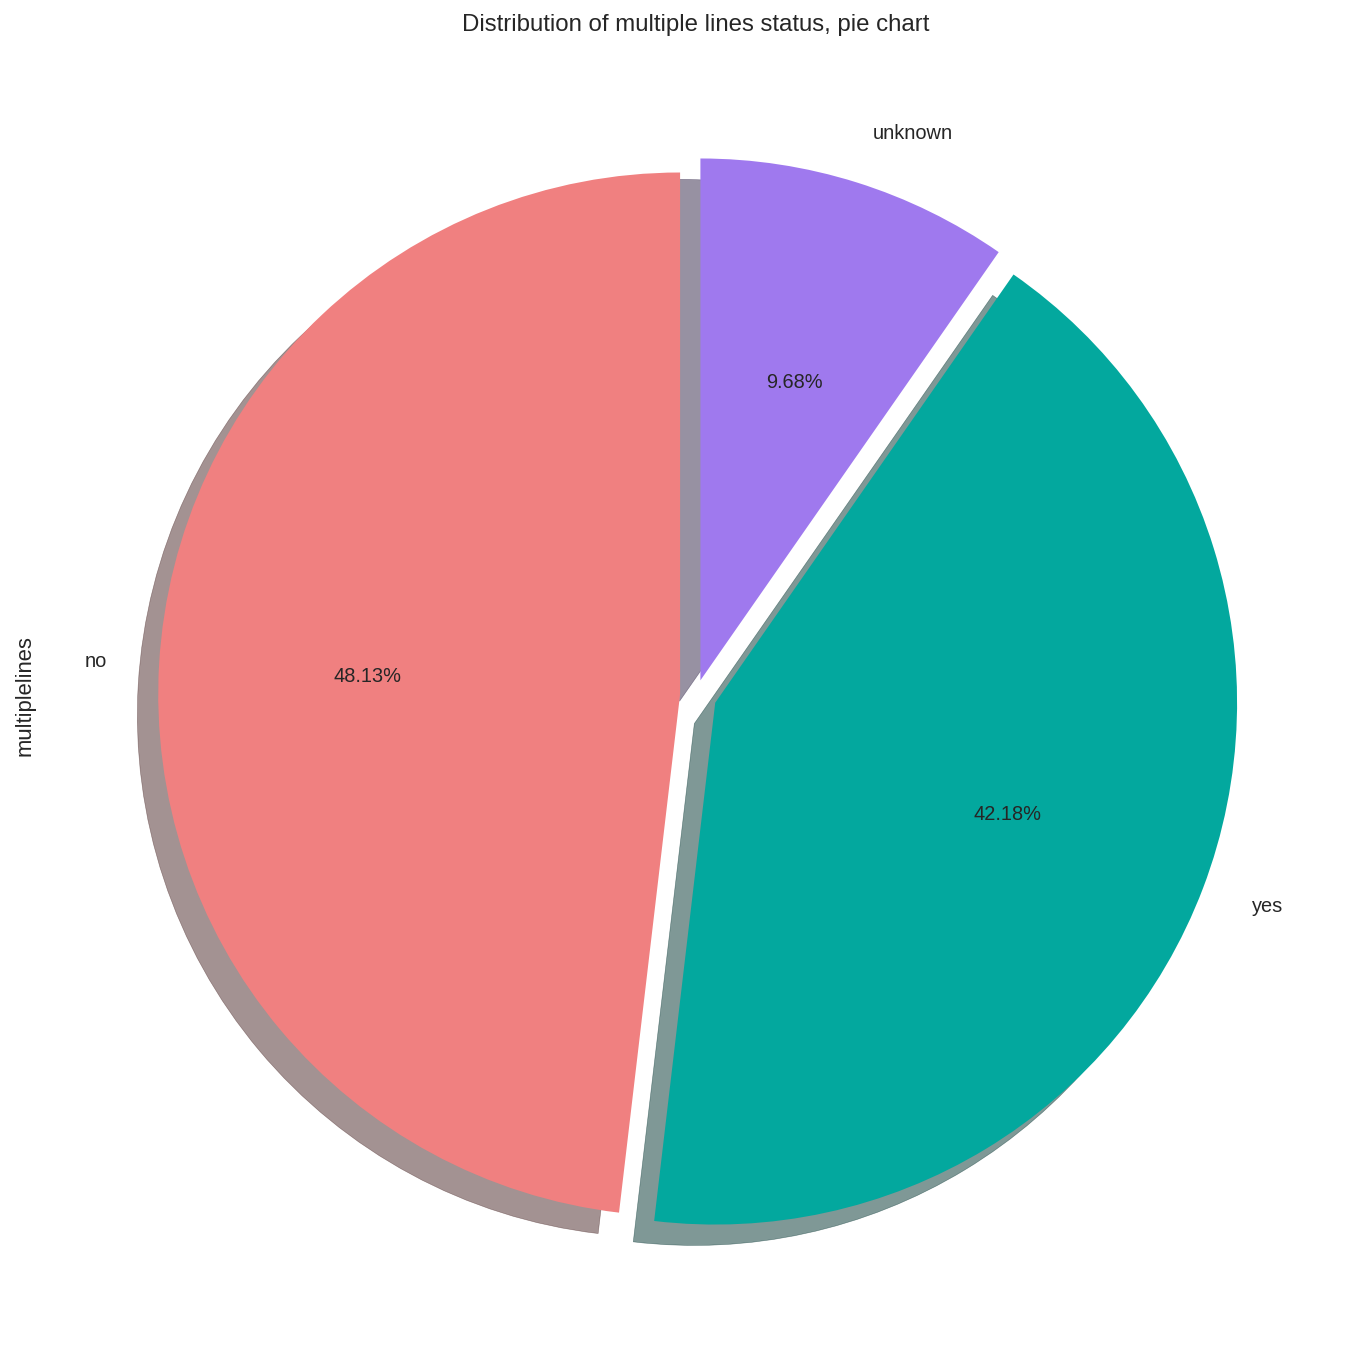

In [62]:
#filling missing values with value "unknown"
df_data.multiplelines.fillna('unknown', inplace=True)
df_data.multiplelines.value_counts(normalize=True).plot(kind='pie',
        figsize=(12,12), 
            autopct='%1.2f%%', colors=['#F08080', '#03A89E', '#9F79EE'], 
            shadow=True, startangle=90, explode=(0.03,0.04, 0.03))
plt.title('Distribution of multiple lines status, pie chart')
plt.show()

#### internetservice column
For the column internetservice, we found that 43.96% of our customers had fiber optic for their intenet service; 34.37% of the customers had DSL for their internet service; and 21.67% of the customer's information about their internet service was unknown. 

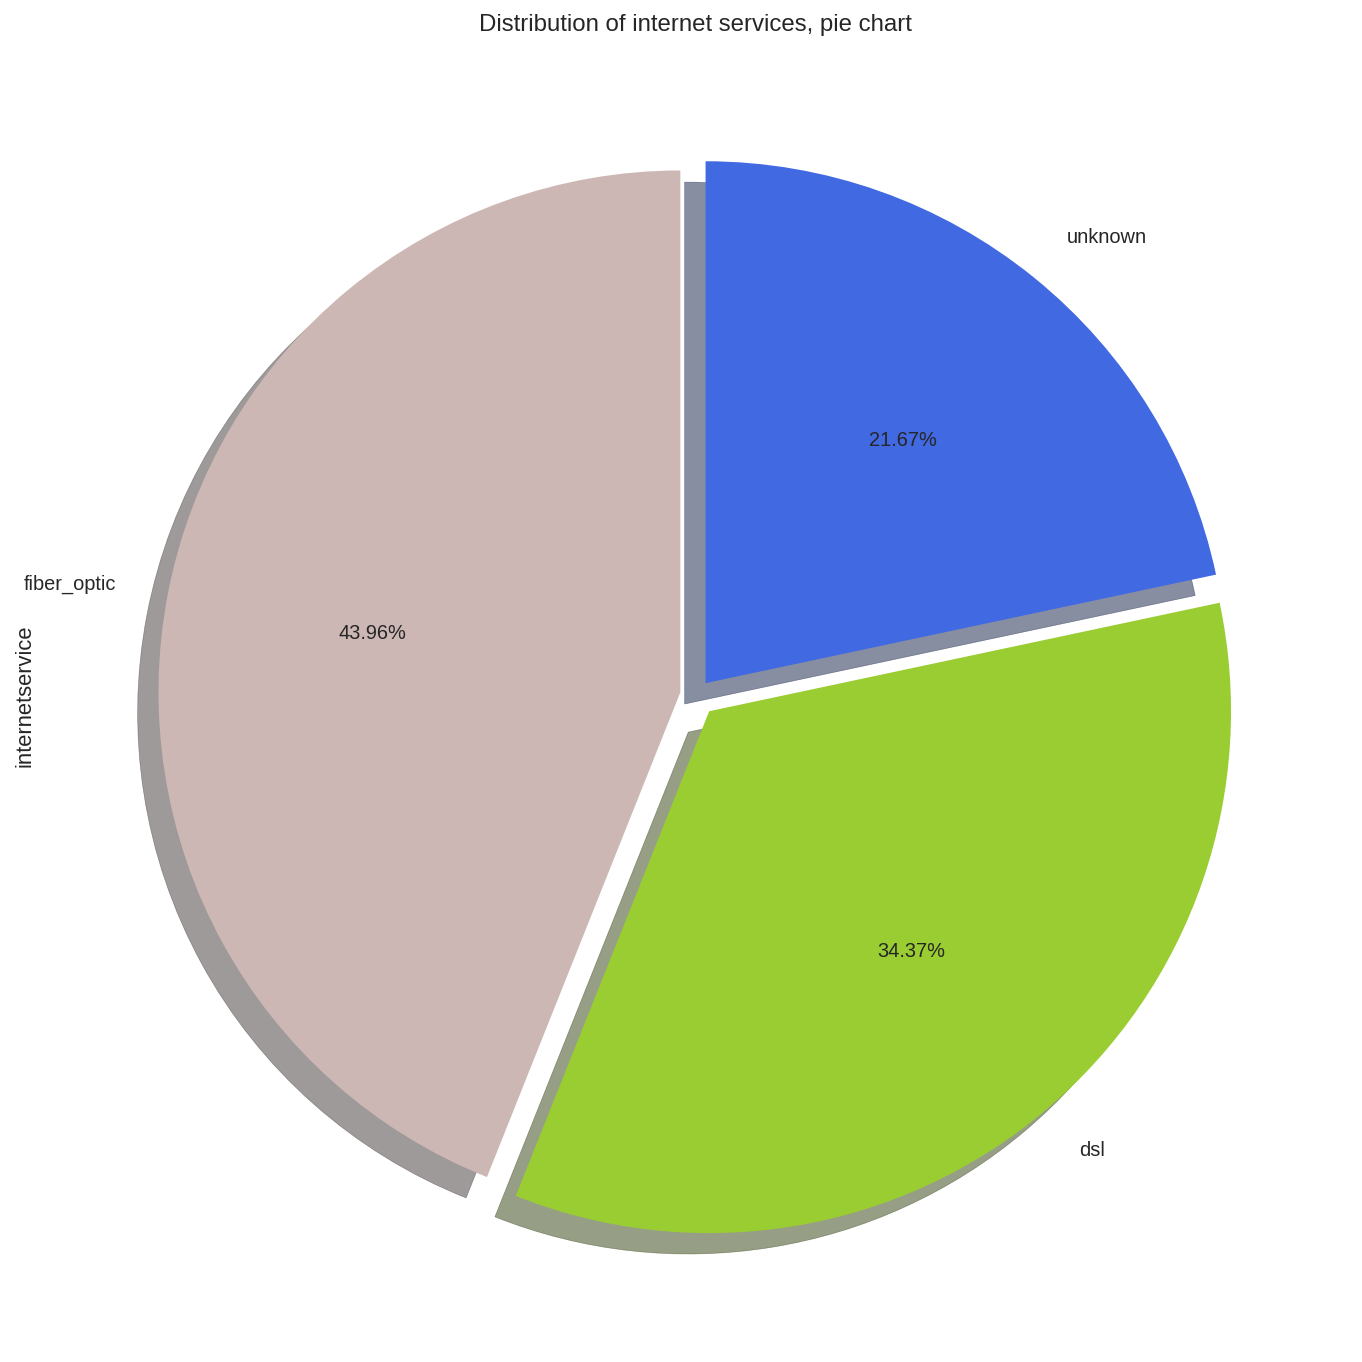

In [63]:
#filling missing values with value "unknown"
df_data.internetservice.fillna('unknown', inplace=True)
df_data.internetservice.value_counts(normalize=True).plot(kind='pie',
        figsize=(12,12), autopct='%1.2f%%', colors=['#CDB7B5', '#9ACD32', '#4169E1'], 
            shadow=True, startangle=90, explode=(0.03,0.04, 0.03))
plt.title('Distribution of internet services, pie chart')
plt.show()

#### onlinesecurity column

For the column onlinesecurity, we found that 49.67% of our customers did not have online security in their internet contract; 28.67% of the customer did have online security; and 21.67% of the customer's information about having online security was unknown. 

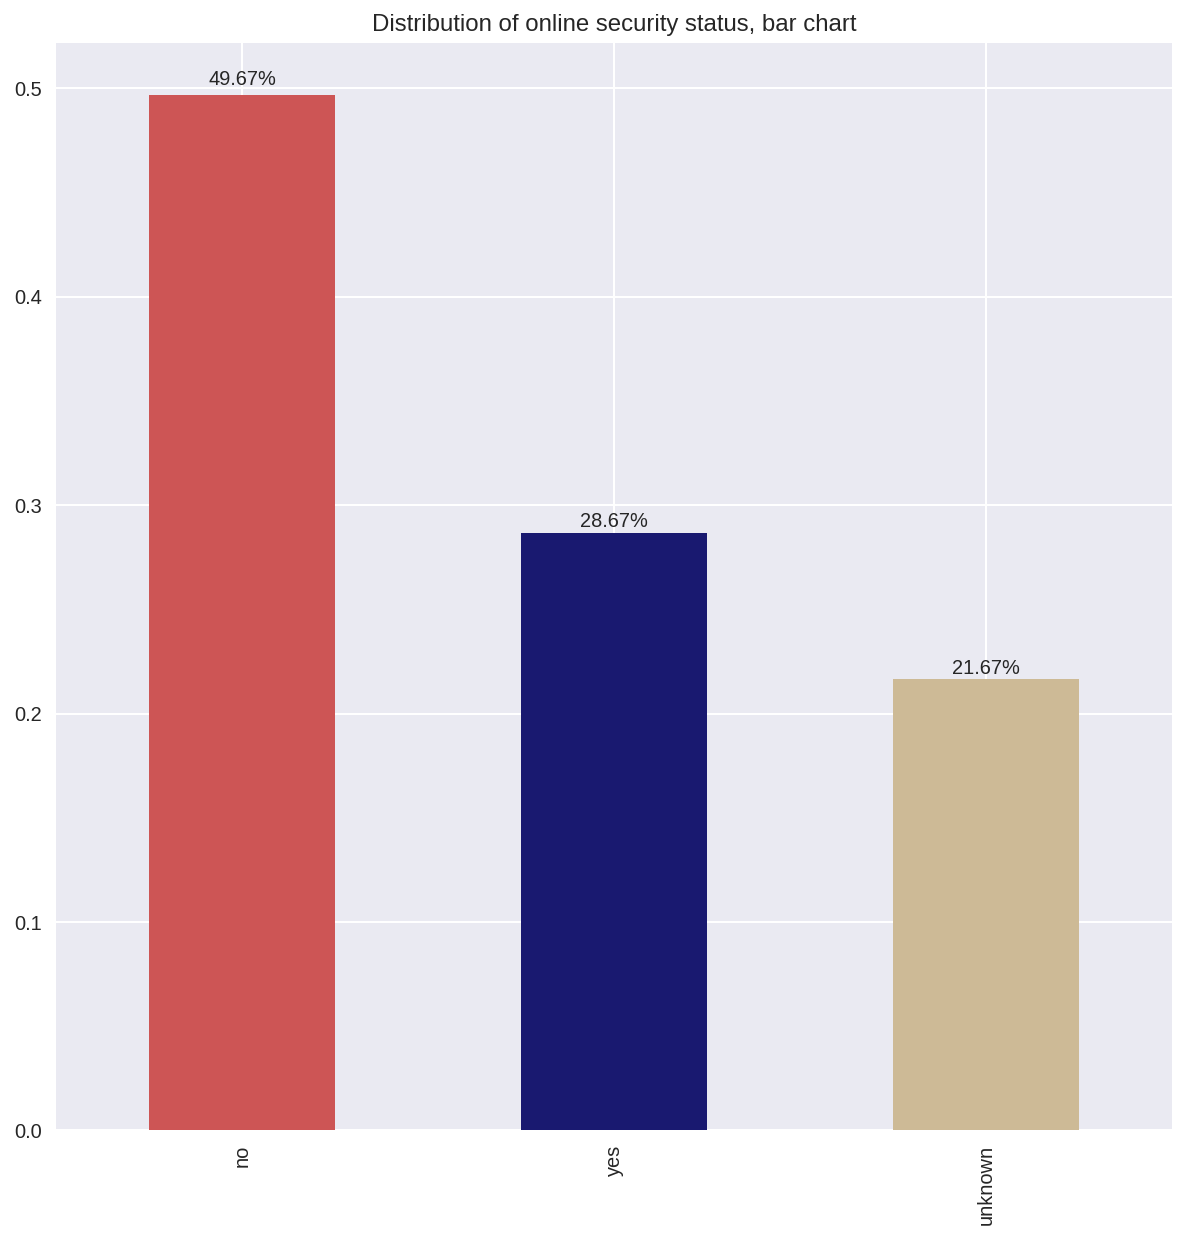

In [64]:
#filling missing values with value "unknown"
df_data.onlinesecurity.fillna('unknown', inplace=True)
online_plot = df_data.onlinesecurity.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in online_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    online_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of online security status, bar chart')
plt.show()

#### onlinebackup column 

For the column onlinebackup, we found that 43.84% of our customers did not have online backup in their internet contract; 34.49% of the customer did have online backup; and 21.67% of the customer's information about having online backup was unknown. 

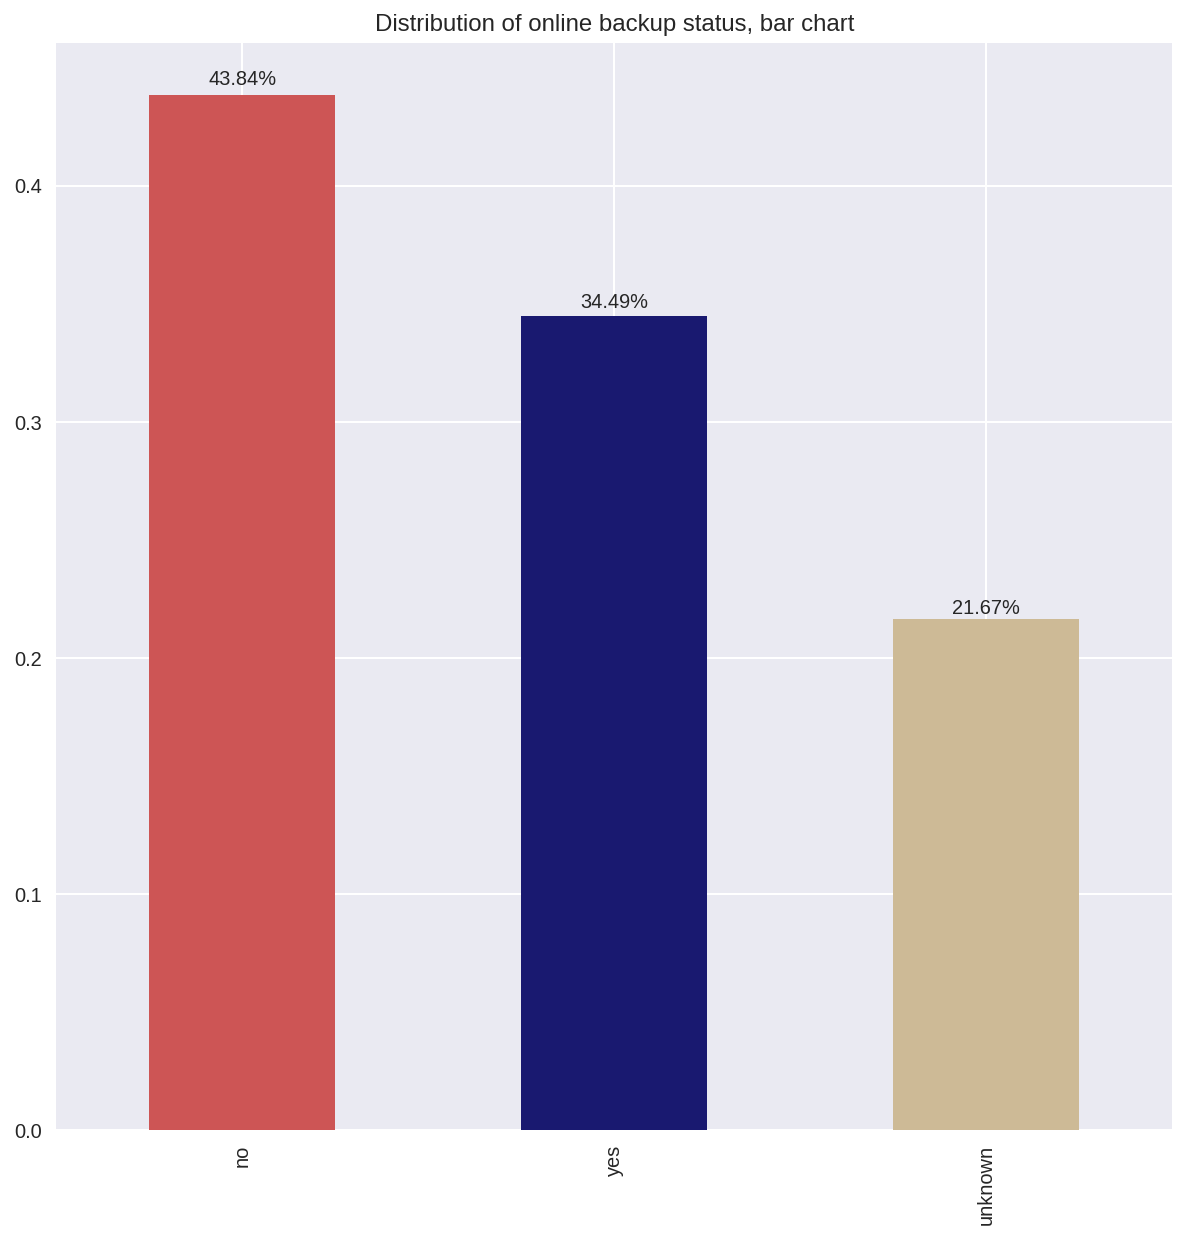

In [65]:
#fill nul values with vale 'unknown'
df_data.onlinebackup.fillna('unknown',inplace=True)
backup_plot = df_data.onlinebackup.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in backup_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    backup_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of online backup status, bar chart')
plt.show()

#### deviceprotection column

For the column deviceprotection, we found that 43.94% of our customers did not have device protection in their internet contract; 34.39% of the customer did have device protection; and 21.67% of the customer's information about having device protection was unknown.

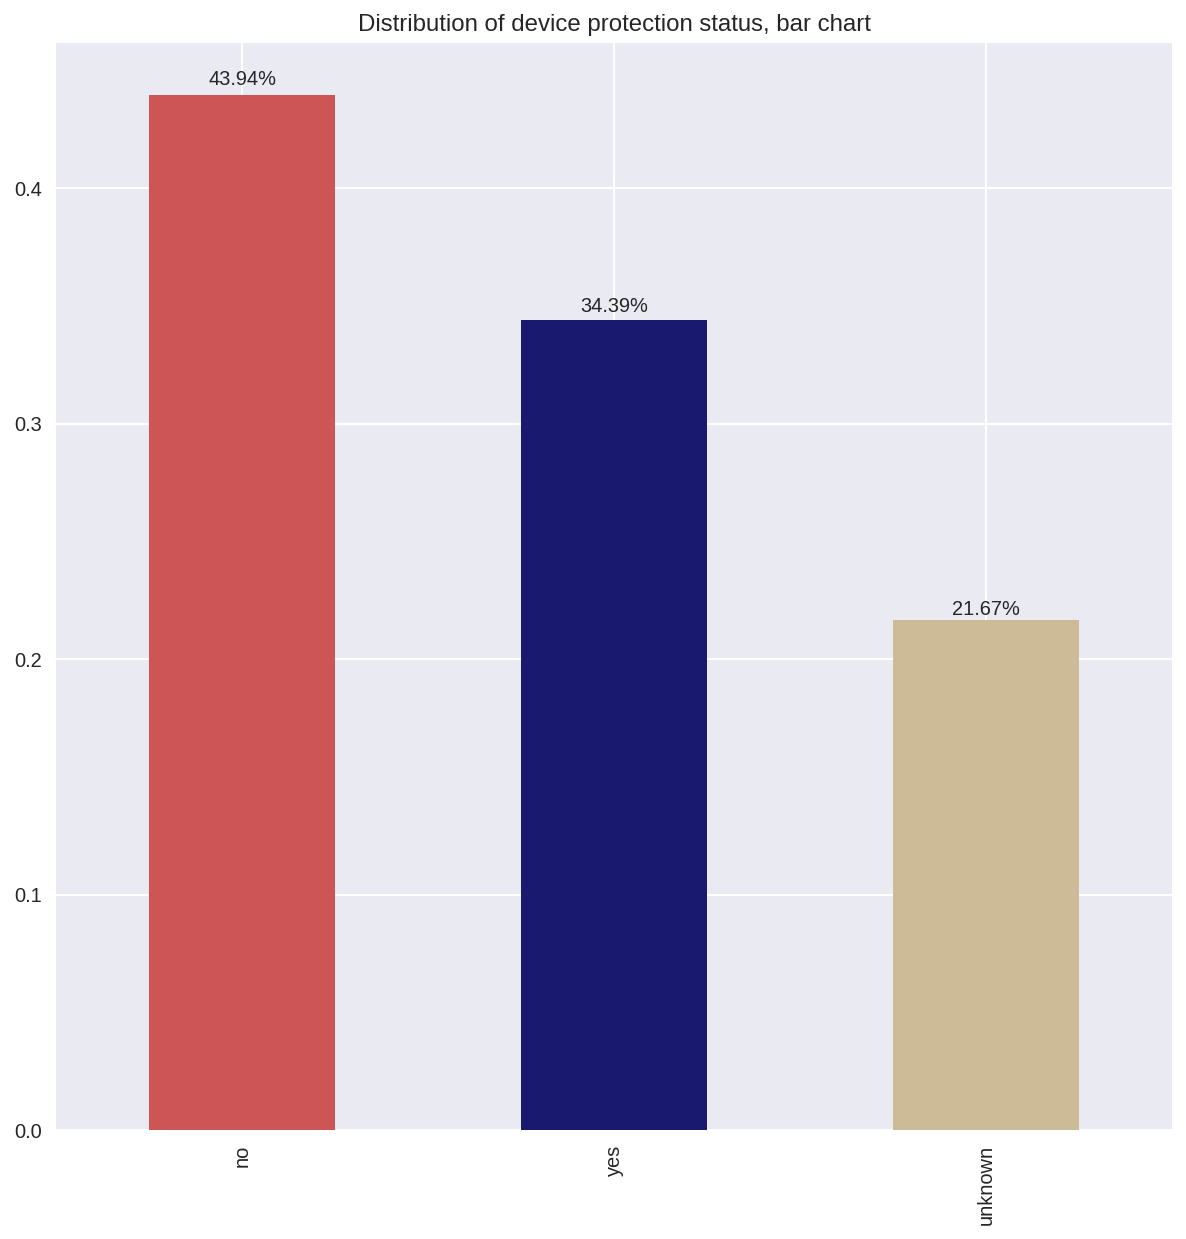

In [66]:
#fill nul values with vale 'unknown'
df_data.deviceprotection.fillna('unknown',inplace=True)
deviceprotection_plot = df_data.deviceprotection.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in deviceprotection_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    deviceprotection_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of device protection status, bar chart')
plt.show()

#### techsupport column

For the column tech support, we found that 43.31% of our customers did not have tech support in their internet contract; 29.02% of the customer did have tech support; and 21.67% of the customer's information about having tech support was unknown.

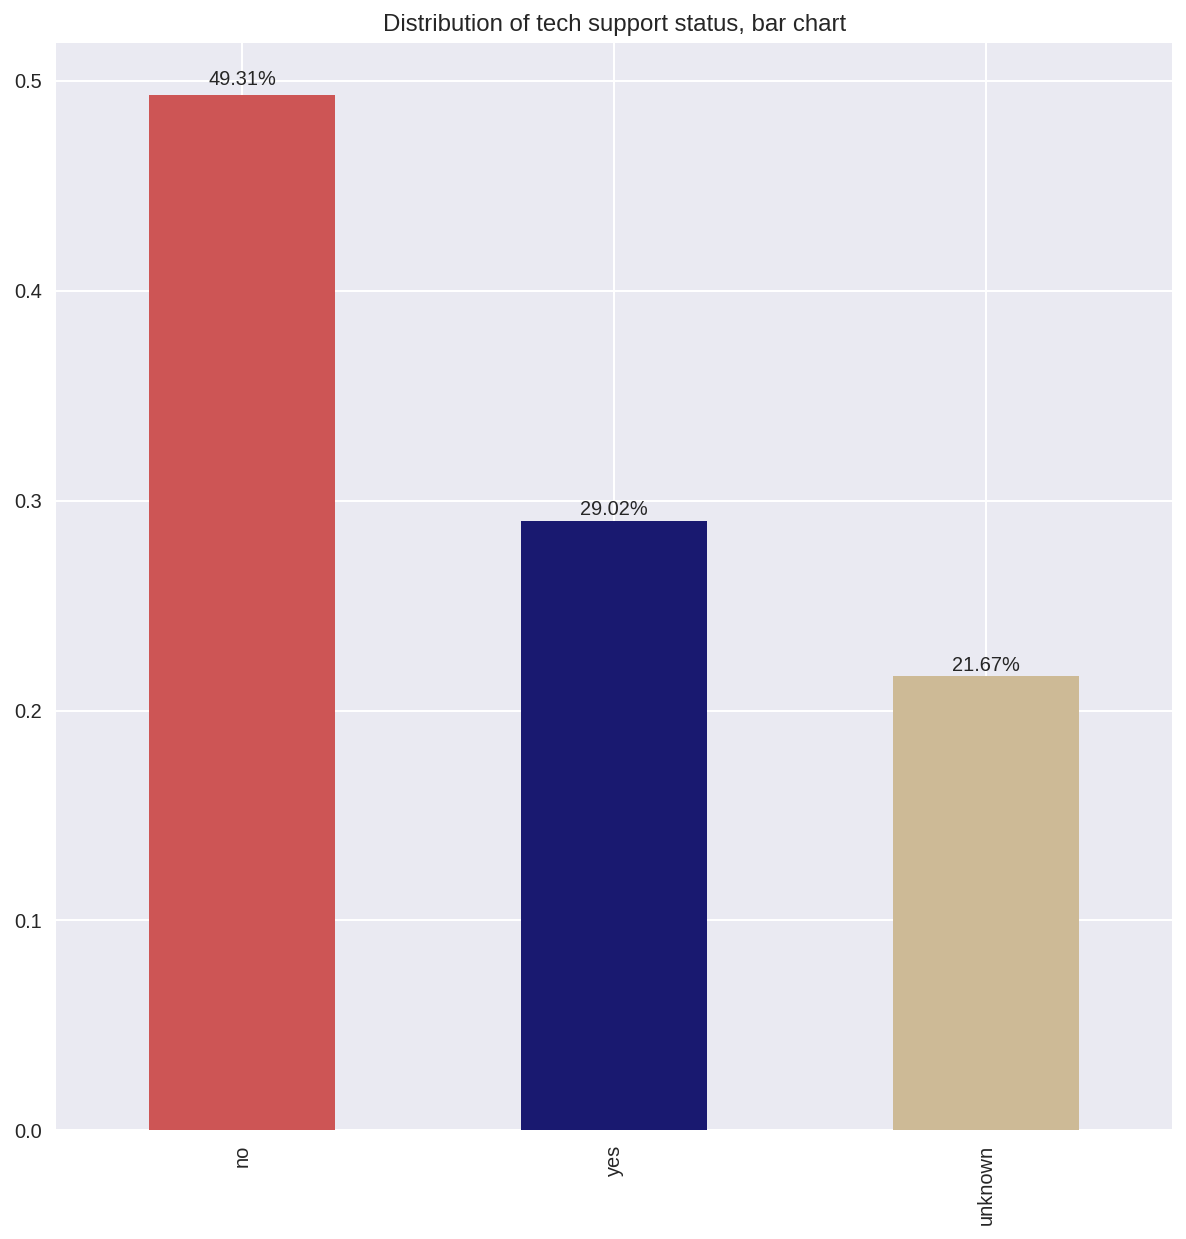

In [67]:
#fill nul values with vale 'unknown'
df_data.techsupport.fillna('unknown',inplace=True)
techsupport_plot = df_data.techsupport.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in techsupport_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    techsupport_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of tech support status, bar chart')
plt.show()

#### streamingtv column

For the column streaming TV, we found that 39.90% of our customers did not have streaming TV in their internet contract; 38.44% of the customer did have streaming TV; and 21.67% of the customer's information about having streaming TV was unknown.

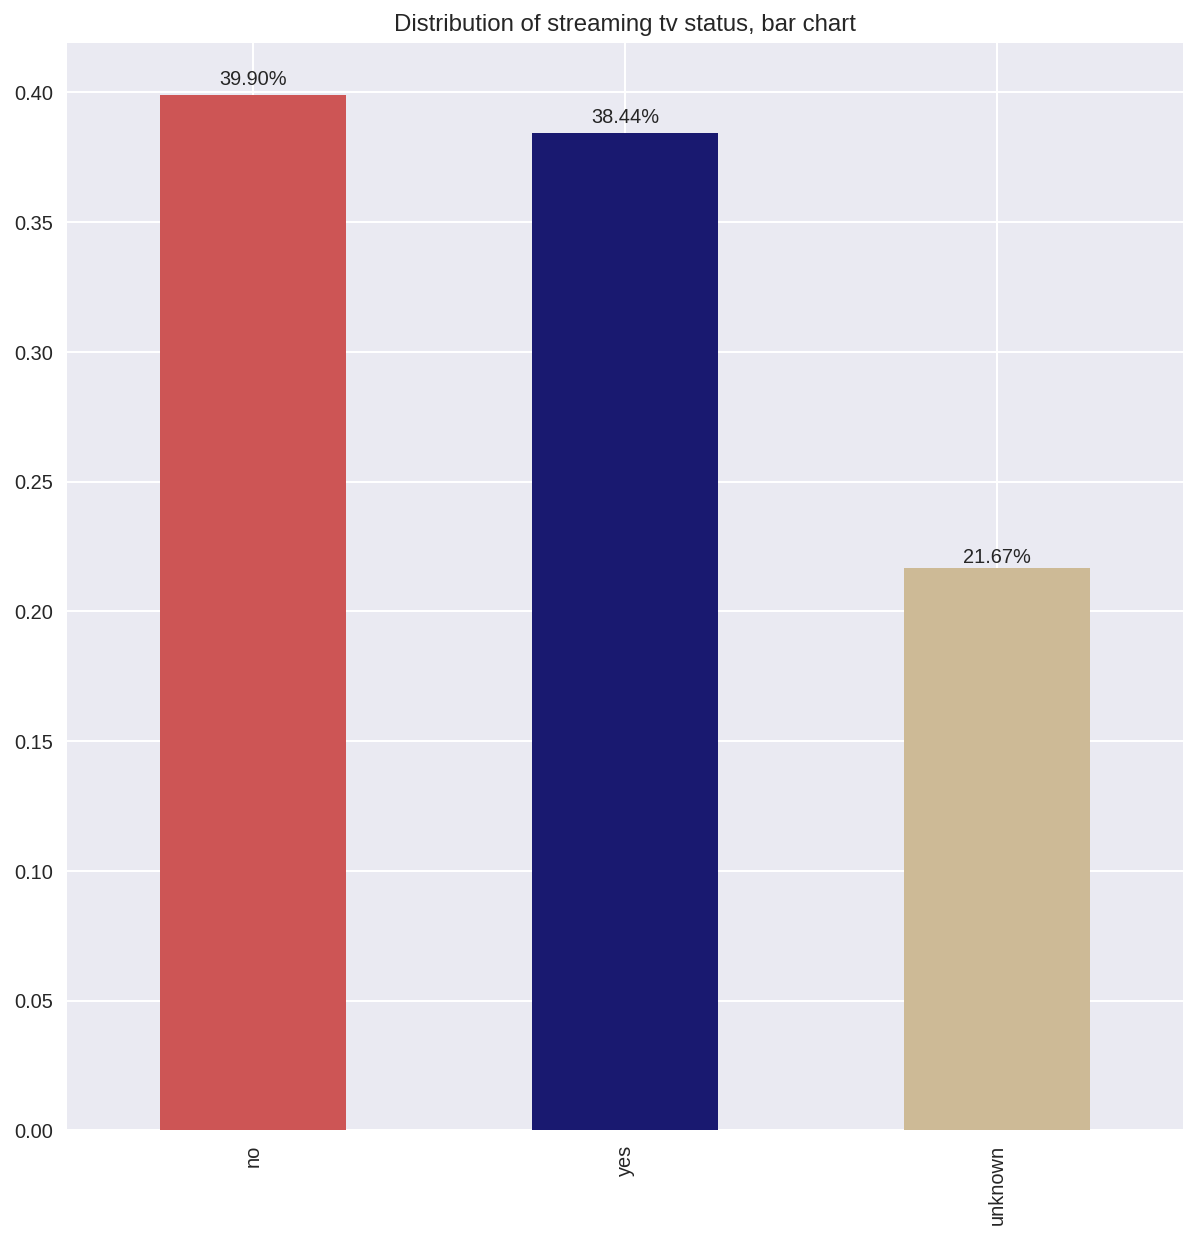

In [68]:
#fill nul values with vale 'unknown'
df_data.streamingtv.fillna('unknown',inplace=True)
streamingtv_plot = df_data.streamingtv.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in streamingtv_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    streamingtv_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of streaming tv status, bar chart')
plt.show()

#### streamingmovies column

For the column streaming Movies, we found that 39.54% of our customers did not have streaming Movies in their internet contract; 38.79% of the customer did have streaming Movies; and 21.67% of the customer's information about having streaming Movies was unknown.

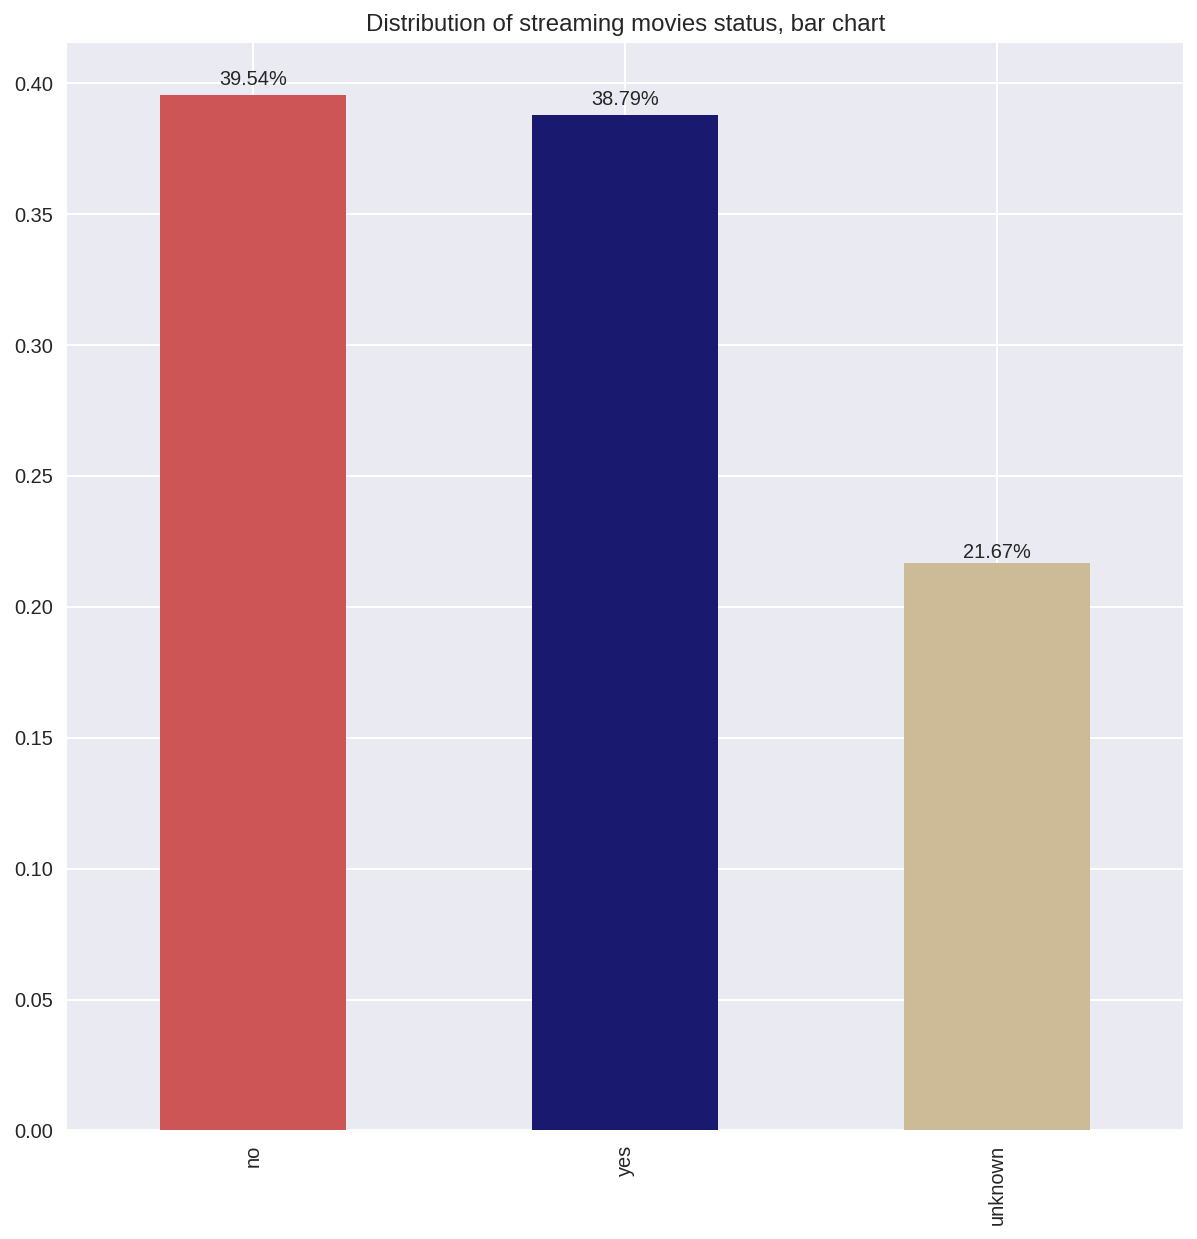

In [69]:
#fill nul values with vale 'unknown'
df_data.streamingmovies.fillna('unknown',inplace=True)
streamingmovies_plot = df_data.streamingmovies.value_counts(normalize=True).plot(
    kind='bar', figsize=(10,10), color=['#CD5555', '#191970', '#CDBA96'])

for p in streamingmovies_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    streamingmovies_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of streaming movies status, bar chart')
plt.show()

####  Monthly Charges and Total Charges
In this section, we plotted the distribution of total charges vs. monthly charges, to observe how the density estimate distribution. In the plot, we observed that the highest desity estimate were between 10-30 USD in monthly charges, and 0-1400 USD. We also observed another local maximum density in values between 45-55 USD in monthly charges, and 100-700 USD in total charges, as well as in the values between 70-85 USD in monthly charges, and 0-1000 USD in total charges. 

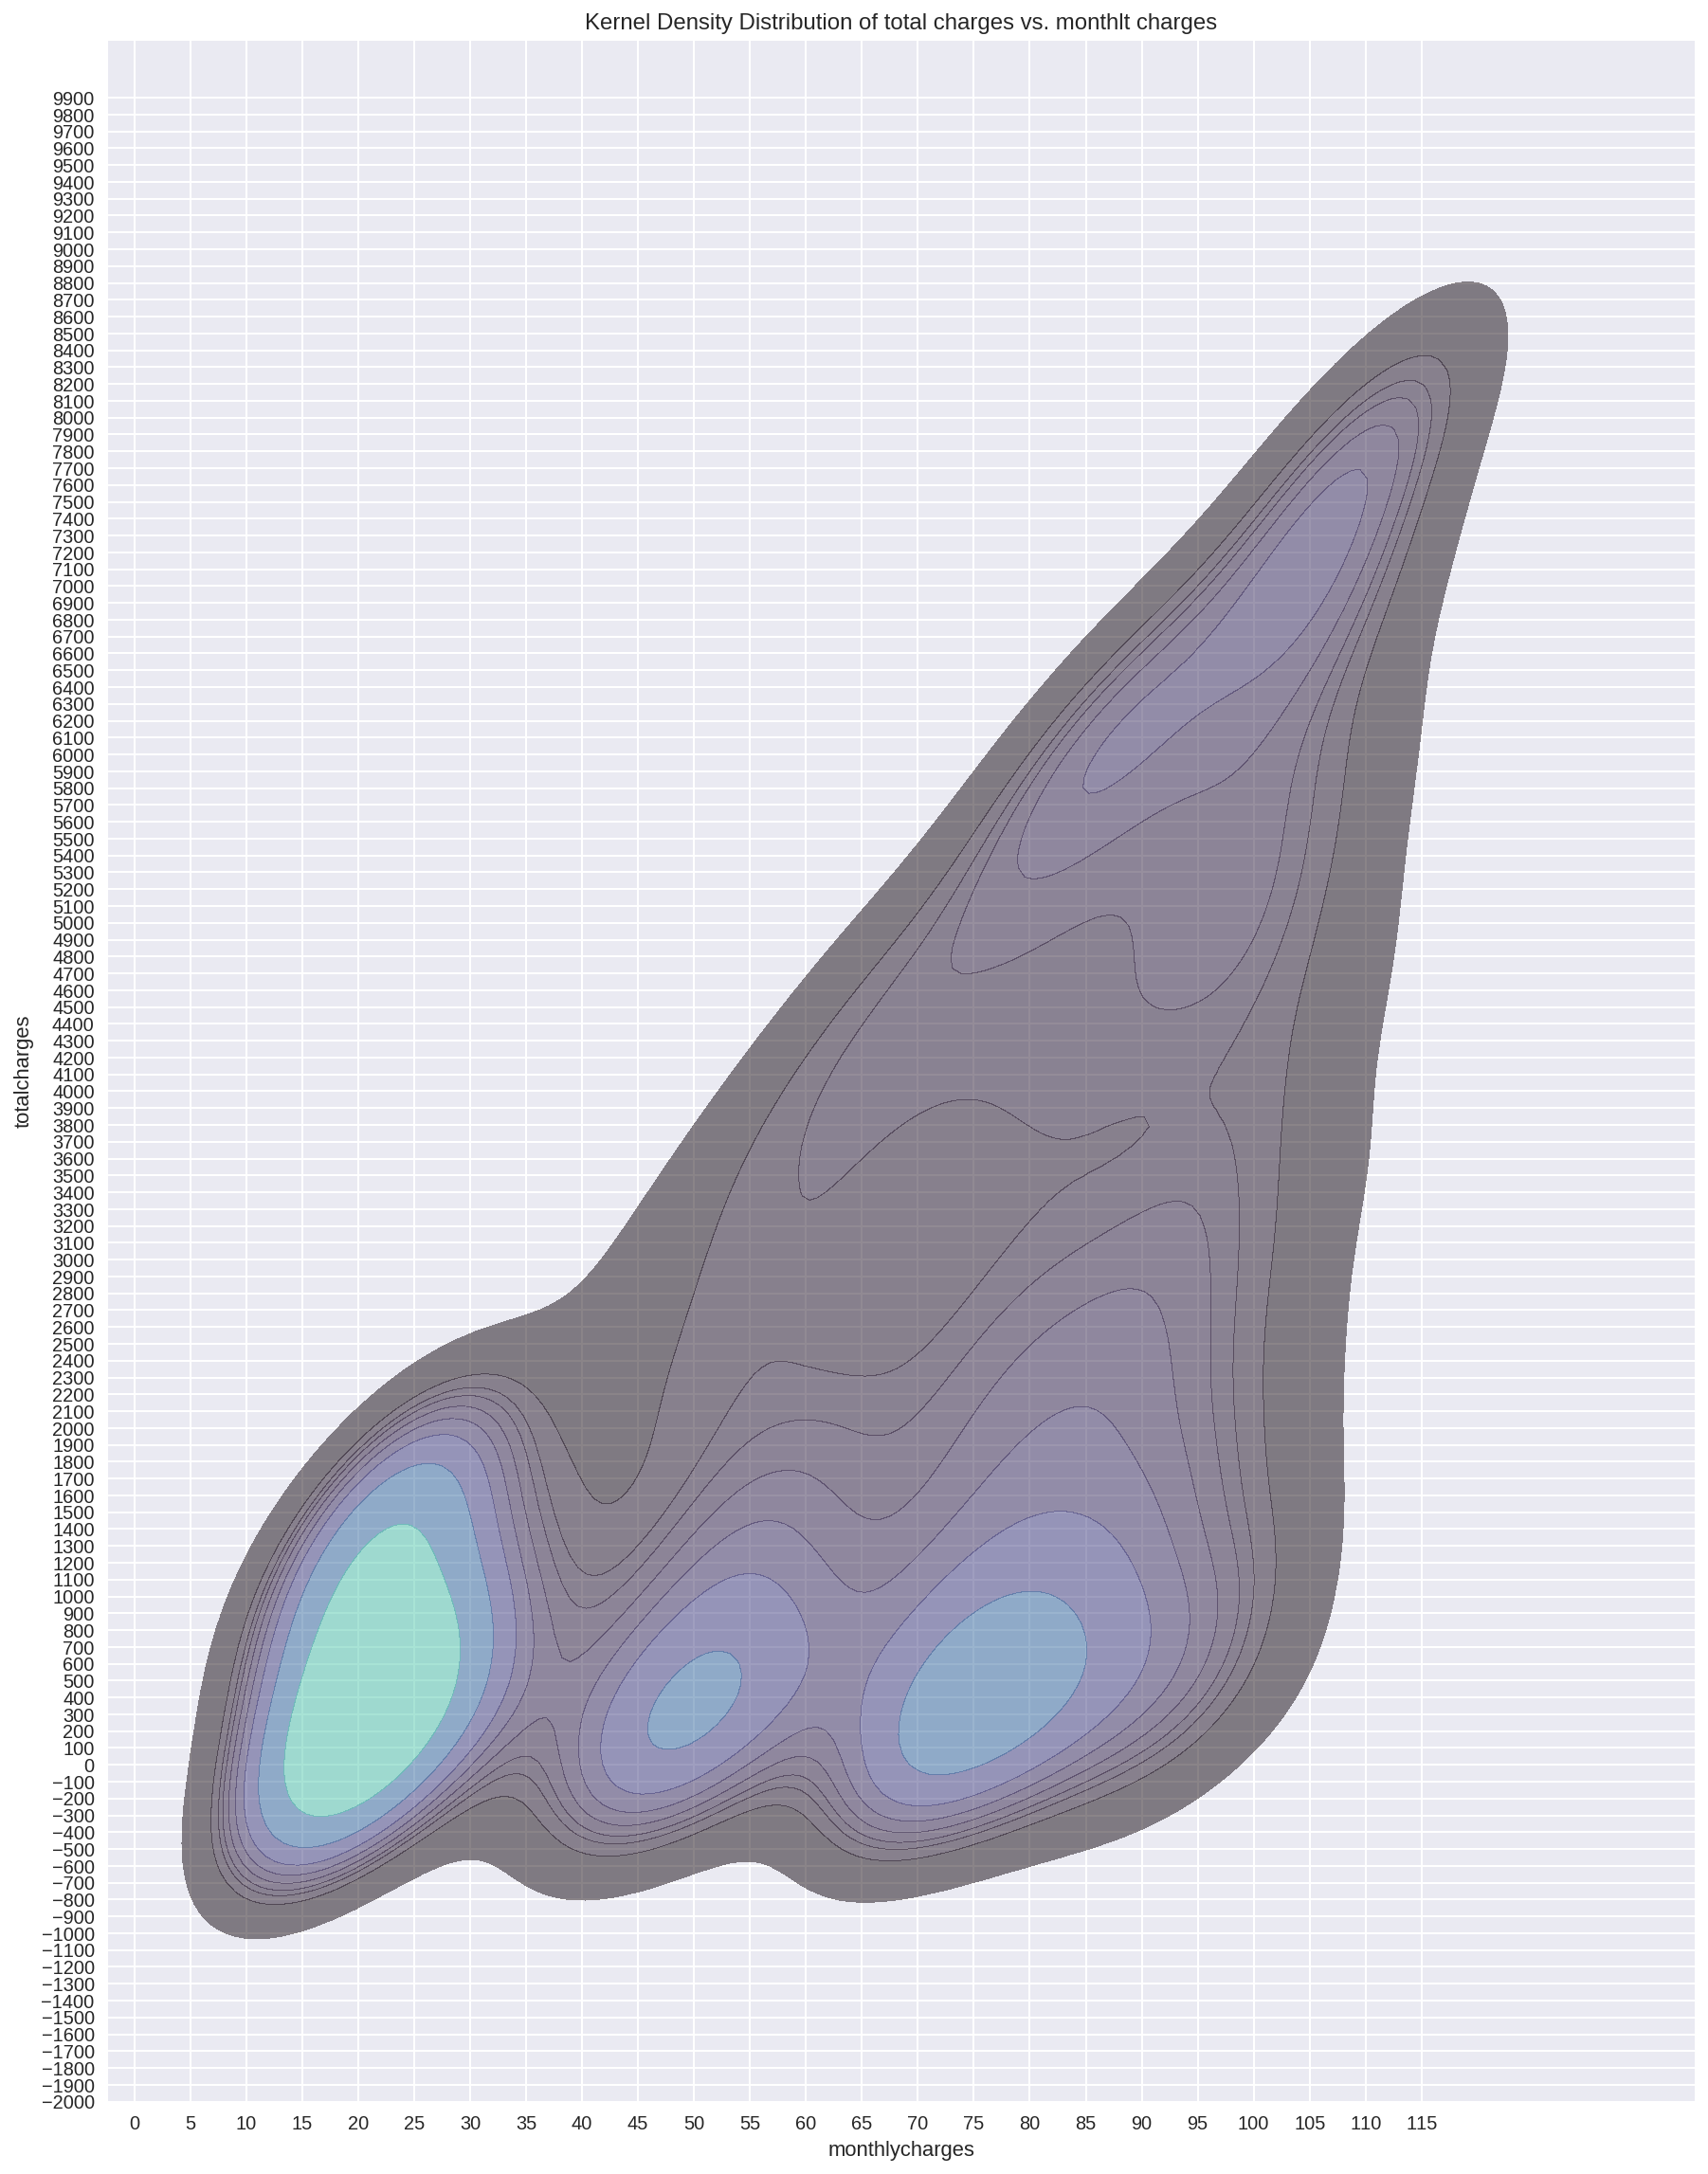

In [70]:
plt.figure(figsize=(15,20))
sns.kdeplot(data=df_data, x="monthlycharges",
            y="totalcharges", fill=True ,cmap="mako", alpha=0.5)

plt.title('Kernel Density Distribution of total charges vs. monthlt charges')
plt.yticks(list(np.arange(-2000,10000, 100)))
plt.xticks(list(np.arange(0,120, 5)))
plt.show()

In this section, we created a pivot table with payment methods in indices, churned values as our columns, and total charge amounts as our values. We discovered that from the customers who left the company, the highest average of total charges were customers who paid with credit card who paid on average 2350.25 USD. Compared to 3199.78 USD in average total charges for customers who are still with the services from Interconnect, and paid with credit card. For the median values, we observed that the highest median value in total charges was paid by customers who stayed with the services and paid with bank tranfer methods, with a median value of 2668.87 USD. However, the highest median value of total charges for customer who left the company were customers who paid with credit card, with a median total charge value of 1478.40 USD. 

In [71]:
df_data.pivot_table(columns='churned', 
                    index='paymentmethod', values='totalcharges', aggfunc=['mean', 'median'])

mean                 median        
churned                            0            1         0       1
paymentmethod                                                      
bank_transfer_automatic  3239.080288  2269.812984  2668.875  1306.7
credit_card_automatic    3199.789225  2350.257759  2630.325  1478.4
electronic_check         2609.989838  1463.656769  1883.850   706.6
mailed_check             1179.501265   534.022565   600.450   113.7

#### churned column class inbalance
In this section, we observed the inbalance of class in the target column 'churned'. We found out that there are more data on customers who have not left the company, with 73.46% of the entries, compared to 26.54% of the entries being customers who stopped using the services from Interconnect. 

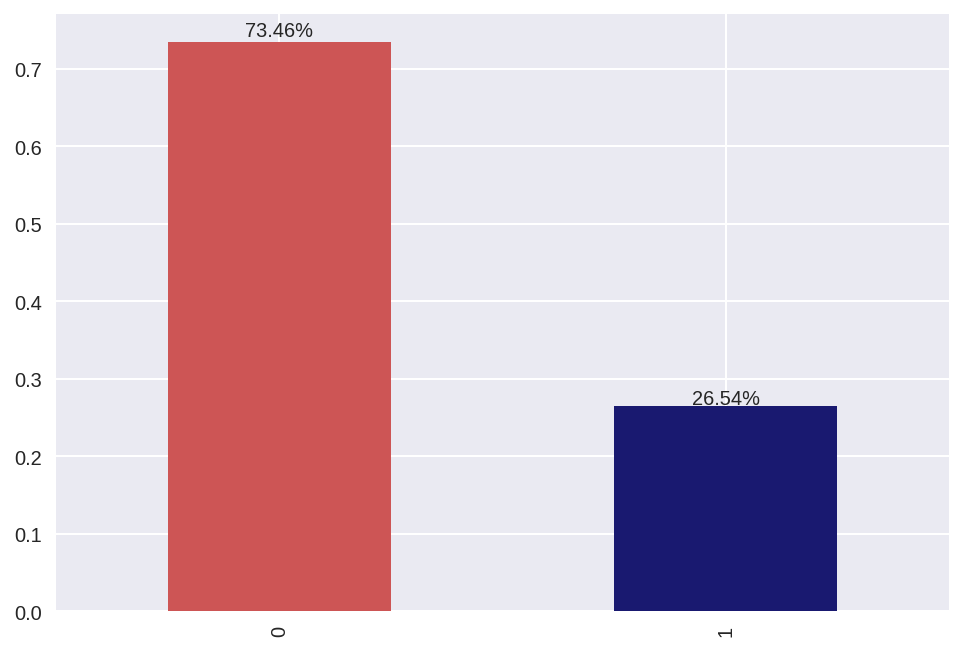

In [72]:
churned_plot = df_data.churned.value_counts(normalize=True).plot(kind='bar',  color=['#CD5555', '#191970'])

for p in churned_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    churned_plot.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')

### Work plan:

For the rest of the project, we created machine learning models to select the best model, with the highest AUC-ROC score. The threshold for the selected model was an AUC-ROC score was 0.85, and also our baseline was a logistic regression model. Any models that perfomed worse, in terms of AUC-ROC score, than the logistic regression model. The reason that we selected a logistic regression model as our baseline is because other models allow for hyperparameter tuning, as well as the use of optimization techniques such as gradient descent. We decided to keep all the columns from the datasets provides, with the exception of the column 'enddata'. The reason we removed this column was because we created the target feature, 'churned', and keeping the enddate column would have caused to have redundant data. 

After conducting exploratory data analysis for the `df_data` dataframe, we observed that there was an inbalance of classes in the target column. We observed that there were more customers did not leave services from the company, with 73.46% of the entries being cutomers who are still using services from the company, compared to 25.54% of the entries being customers who left the services from Interconnect. To take into account the inbalance of classes in the target column, 'churned', we will be conducting two steps in our models:

1. downsampling class '0', while keeping the class '1' without any changes. 
2. upsampling class '1', while keeping the class '0' wihtout changes. 

In a similar way, the numerical columns, monthlycharges and totalcharges, were tested separately in our models, as standarized and non-standarized to observe if standarizing numerical columns makes any difference or improves the AUC-ROC score of our models. Therefore, the model combinations perfomed in this project include: 

0. Logistic regression model with encoded categorical data, as a baseline. This model was used as the baseline to compare it agaisnt models that allow for gradient descent optimization, and/or hyperparameter tuning.

i. Logistic Regression Model, with upsampled class 1 in target; class 0 unchanged in target

ii.  Logistic Regression Model, with unchanged class 1 in target; class 0 downsampled in target;non-standarized numerical columns

iii. Random Forest classifier with unchanged class 1 in target; class 0 unchanged in target; non-standarized numerical columns

iv. Random Forest classifier with upsampled class 1 in target; class 0 unchanged in target; standarized numerical columns

v. Random Forest classifier with unchanged class 1 in target; class 0 downsampled in target; standarized numerical columns

vi. KNeighborsClassifiers Model with Upsampled class 1 in target, class 0 unchanged in target, and standarized numeric columns

vii. CatboostClassifier Model with unchanged class 1 in target; class 0 unchanged in target

In [73]:
df_data[['streamingmovies',
                   'streamingtv',
                   'techsupport',
                   'deviceprotection',
                   'onlinebackup',
                   'onlinesecurity',
                   'internetservice',
                   'multiplelines']].replace('unknown','no', inplace=True)


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Libraries used for Machine Learning models

In [118]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, roc_curve
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

### Preparing Data for Machine Learning Training, Testing, and Validation

#### Splitting dataset into training and testing datasets


In [75]:
X = df_data.drop(['churned', 'begindate'], axis=1)
y = df_data['churned']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.40, random_state=12345)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.50, random_state=12345)

print('Training features shape', X_train.shape)
print('Test features shape', X_test.shape)
print('validation features shape', X_val.shape)
print('Training target shape', y_train.shape)
print('Testing target shape', y_test.shape)
print('validation target shape', y_val.shape)

Training features shape (4225, 18)
Test features shape (1409, 18)
validation features shape (1409, 18)
Training target shape (4225,)
Testing target shape (1409,)
validation target shape (1409,)


#### OHE for Logistic Regression algorithm

In [76]:
ohe_X = pd.get_dummies(X, drop_first = True)
ohe_y = y

ohe_X_train, ohe_X_rem, ohe_y_train, ohe_y_rem = train_test_split(ohe_X, ohe_y, test_size=0.4, random_state=12345)
ohe_X_test, ohe_X_val, ohe_y_test, ohe_y_val = train_test_split(ohe_X_rem, ohe_y_rem, test_size=0.5, random_state=12345)

print('OHE Training features shape', ohe_X_train.shape)
print('OHE Testing features shape', ohe_X_test.shape)
print('OHE Validation features shape', ohe_X_val.shape)
print('OHE Training target shape', ohe_y_train.shape)
print('OHE Testing target shape', ohe_y_test.shape)
print('OHE Validation target shape', ohe_y_val.shape)


OHE Training features shape (4225, 7070)
OHE Testing features shape (1409, 7070)
OHE Validation features shape (1409, 7070)
OHE Training target shape (4225,)
OHE Testing target shape (1409,)
OHE Validation target shape (1409,)


#### OrdinalEncoding for RandomForestClassifer Models

In [77]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df_data), columns = df_data.columns)

oe_y = data_ordinal['churned']
oe_X = data_ordinal.drop('churned', axis=1)

oe_X_train, oe_X_rem, oe_y_train, oe_y_rem = train_test_split(oe_X, oe_y, test_size=0.4, random_state=12345)
oe_X_test, oe_X_val, oe_y_test, oe_y_val = train_test_split(oe_X_rem, oe_y_rem, test_size=0.5, random_state=12345)

print('OE Training features shape', oe_X_train.shape)
print('OE Testing features shape', oe_X_test.shape)
print('OE Validation features shape', oe_X_val.shape)
print('OE Training target shape', oe_y_train.shape)
print('OE Testing target shape', oe_y_test.shape)
print('OE Validation target shape', oe_y_val.shape)

OE Training features shape (4225, 19)
OE Testing features shape (1409, 19)
OE Validation features shape (1409, 19)
OE Training target shape (4225,)
OE Testing target shape (1409,)
OE Validation target shape (1409,)


#### Upsampling Class 1 in Target Column 'churned'

(6427, 18)
(6427,)


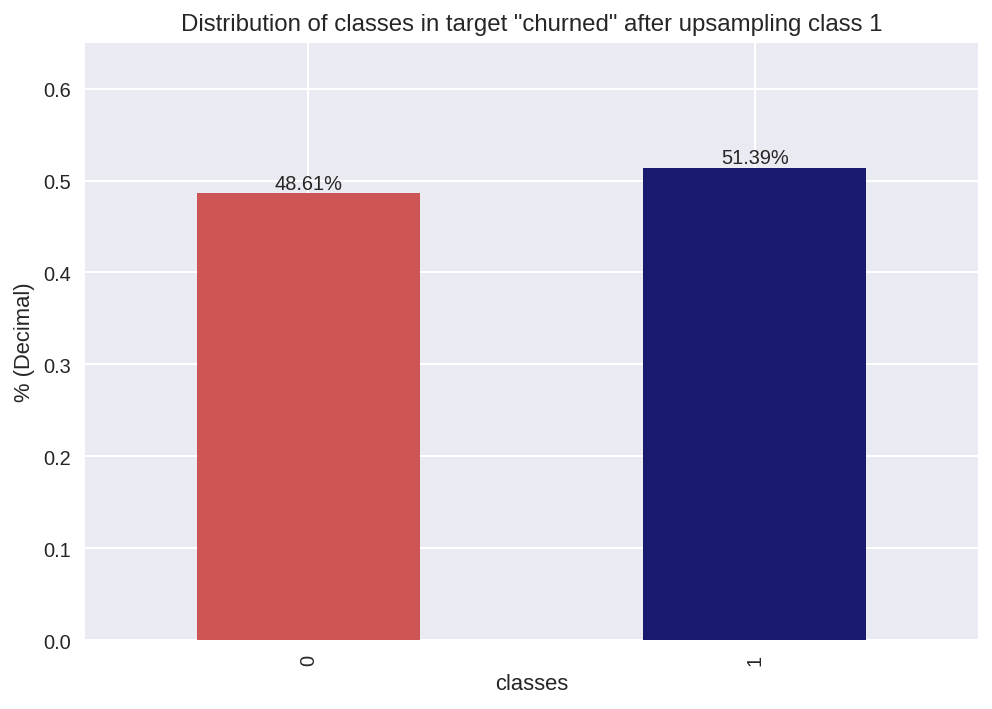

In [78]:
def upsample(X_train, y_train , repeat):
    features_zeros = X_train[y_train==0]
    features_ones  = X_train[y_train==1]
    target_zeros   = y_train[y_train ==0]
    target_ones    = y_train[y_train ==1]

    
    X_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    y_upsampled   = pd.concat([target_zeros] + [target_ones]*repeat)
    X_upsampled_train, y_upsampled_train = shuffle(X_upsampled, y_upsampled, random_state = 12345) 
    
    return X_upsampled_train, y_upsampled_train

X_upsampled_train, y_upsampled_train = upsample(X_train, y_train, 3)


print(X_upsampled_train.shape)
print(y_upsampled_train.shape)

upsampled_1 = y_upsampled_train.value_counts(normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in upsampled_1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    upsampled_1.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in target "churned" after upsampling class 1')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.65])
plt.show()

#### Donwsampling Class 0 in Target Column 'churned'

(2198, 18)
(2198,)


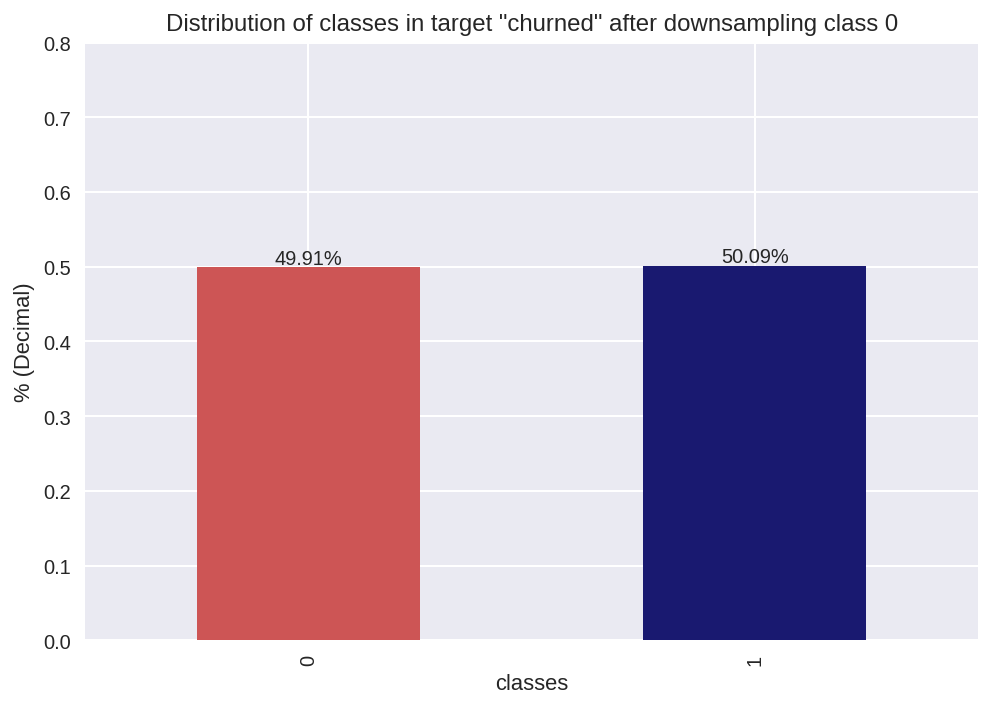

In [79]:
def downsample(X_train, y_train , fraction):
    features_zeros = X_train[y_train==0]
    features_ones  = X_train[y_train==1]
    target_zeros   = y_train[y_train ==0]
    target_ones    = y_train[y_train ==1]

    
    X_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    y_downsampled   = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    X_downsampled_train, y_downsampled_train = shuffle(X_downsampled, y_downsampled, random_state = 12345) 
    
    return X_downsampled_train, y_downsampled_train

X_downsampled_train, y_downsampled_train = downsample(X_train, y_train, 0.351)


print(X_downsampled_train.shape)
print(y_downsampled_train.shape)

downsampled_1 = y_downsampled_train.value_counts(normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in downsampled_1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    downsampled_1.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in target "churned" after downsampling class 0')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

### Model 0:  Logistic Regression Model, Baseline

In [80]:
%%time
model_0 = lr()
model_0.fit(ohe_X_train, ohe_y_train)
model_0_predictions = model_0.predict(ohe_X_val)

CPU times: user 6.01 s, sys: 449 ms, total: 6.46 s
Wall time: 6.44 s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
model_0_proba = model_0.predict_proba(ohe_X_val)
model_0_proba_1_val = model_0_proba[:,1]

In [82]:
#F1 score for Logistic Regression Model
model_0_f1 = f1_score(ohe_y_val, model_0_predictions)
model_0_f1

0.5722460658082975

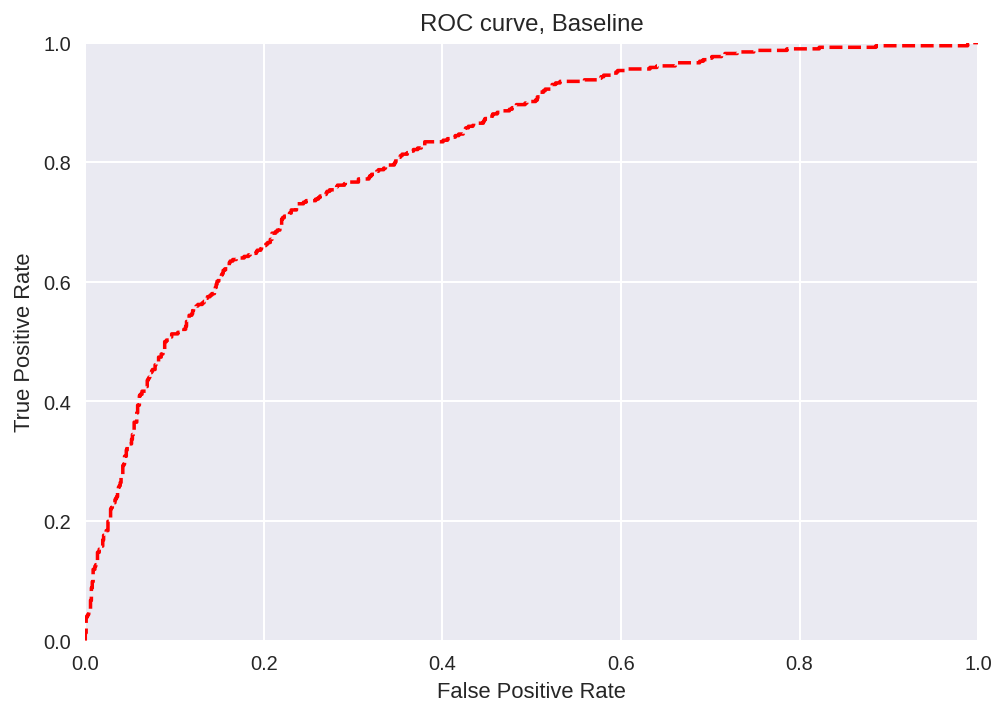

In [83]:
#plotting ROC curve

frp, tpr, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
plt.figure()
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, Baseline')

plt.show()


In [84]:
#AUC ROC for model 0 
roc_auc_score(ohe_y_val, model_0_proba_1_val)

0.8179804901767127

### Model 1:  Logistic Regression Model, with upsampled class 1 in target; class 0 unchanged in target

Train X, y
(6427, 7070)
(6427,)


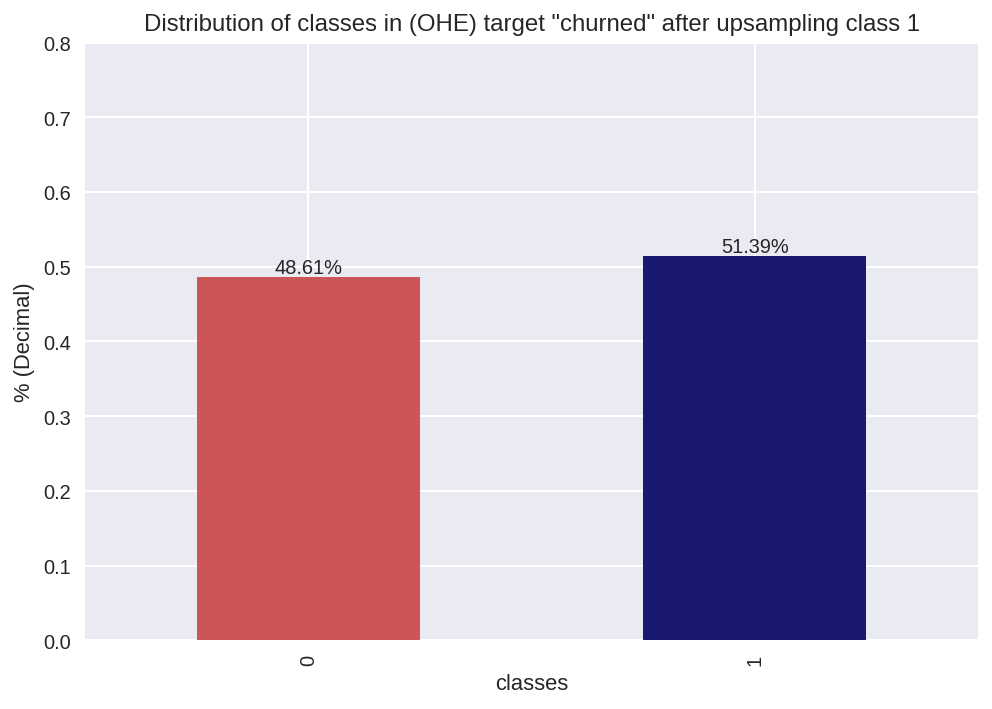

In [85]:
# preparing ohe data with upsampled class 1

ohe_X_upsampled_train_1, ohe_y_upsampled_train_1 =  upsample(ohe_X_train, ohe_y_train, 3)
print('Train X, y')
print(ohe_X_upsampled_train_1.shape)
print(ohe_y_upsampled_train_1.shape)

upsampled_1 = ohe_y_upsampled_train_1.value_counts(
    normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in upsampled_1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    upsampled_1.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in (OHE) target "churned" after upsampling class 1')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

In [86]:
%%time
model_1 = lr()
model_1.fit(ohe_X_upsampled_train_1, ohe_y_upsampled_train_1)
model_1_predictions = model_1.predict(ohe_X_val)

CPU times: user 9.48 s, sys: 913 ms, total: 10.4 s
Wall time: 10.6 s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
model_1_proba = model_1.predict_proba(ohe_X_val)
model_1_proba_1_val = model_1_proba[:,1]

In [88]:
#F1 score for Logistic Regression Model
model_1_f1 = f1_score(ohe_y_val, model_1_predictions)
model_1_f1

0.6081504702194358

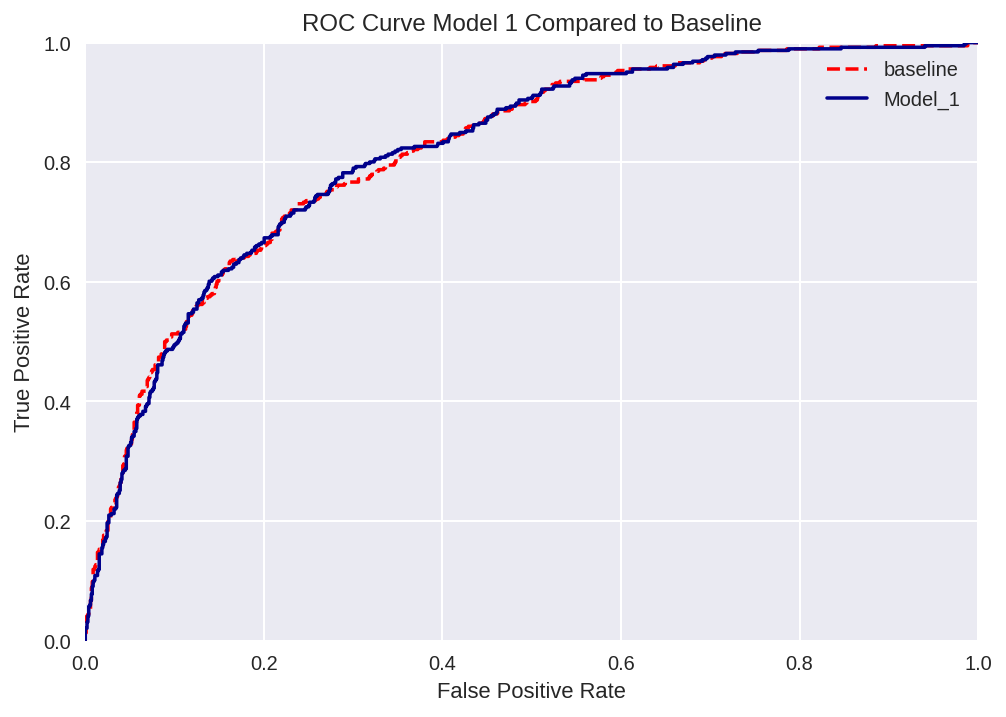

In [89]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_1, tpr_1, thresholds = roc_curve(ohe_y_val, model_1_proba_1_val)
fig_1 = plt.plot(frp_1, tpr_1, linestyle = '-', color='#00008B', label='Model_1')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 1 Compared to Baseline')
plt.legend()
plt.show()

In [90]:
#AUC ROC for model 1
roc_auc_score(ohe_y_val, model_1_proba_1_val)

0.8182210708117444

### Model 2 : Logistic Regression Model, with unchanged class 1 in target; class 0 downsampled in target

Train X, y
(2198, 7070)
(2198,)


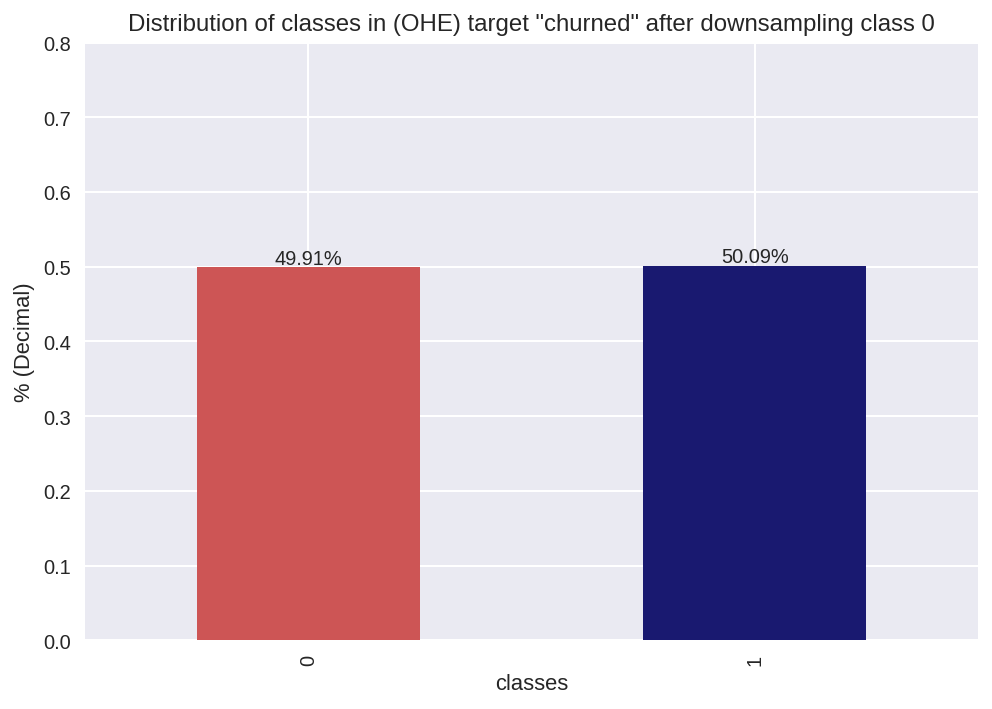

In [91]:
# preparing ohe data with downsampled class 0

ohe_X_downsampled_train, ohe_y_downsampled_train = downsample(ohe_X_train, ohe_y_train, 0.351)
print('Train X, y')
print(ohe_X_downsampled_train.shape)
print(ohe_y_downsampled_train.shape)

downsampled_1 = ohe_y_downsampled_train.value_counts(
    normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in downsampled_1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    downsampled_1.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in (OHE) target "churned" after downsampling class 0')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

In [92]:
%%time
model_2 = lr()
model_2.fit(ohe_X_downsampled_train, ohe_y_downsampled_train)
model_2_predictions = model_2.predict(ohe_X_val)

CPU times: user 2.98 s, sys: 354 ms, total: 3.33 s
Wall time: 3.32 s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
model_2_proba = model_2.predict_proba(ohe_X_val)
model_2_proba_1_val = model_2_proba[:,1]

In [94]:
#F1 score for Logistic Regression Model
model_2_f1 = f1_score(ohe_y_val, model_2_predictions)
model_2_f1

0.6

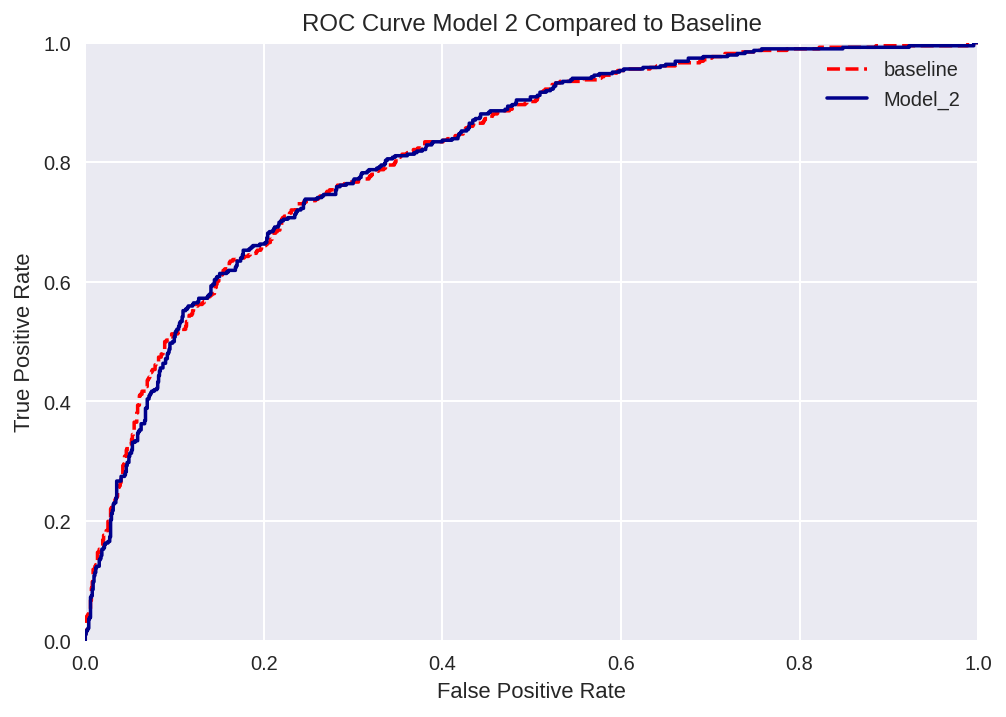

In [95]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_2, tpr_2, thresholds = roc_curve(ohe_y_val, model_2_proba_1_val)
fig_2 = plt.plot(frp_2, tpr_2, linestyle = '-', color='#00008B', label='Model_2')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 2 Compared to Baseline')
plt.legend()
plt.show()

In [96]:
#AUC ROC for model 2
roc_auc_score(ohe_y_val, model_2_proba_1_val)

0.8172334239942461

### Model 3:Random Forest classifier with unchanged class 1 in target; class 0 unchanged in target;

In [97]:
#preparing hyperparameter tuning for model 3, RandomForestClassifier

params = {'n_estimators': list(np.arange(39,52,1)), 
          'max_depth' : list(np.arange(10, 23, 1)),
          'min_samples_split' :  list(np.arange(2,9, 1))}


In [ ]:
#RandomizedSearchCV for model 3 
rf_3 = RandomForestClassifier(random_state = 12345)
grid_3 = GridSearchCV(rf_3,
                      params,verbose = 2,
                      cv=5)
grid_3.fit(oe_X_train.drop('customerid', axis=1),oe_y_train)

In [99]:
grid_3.best_params_

{'max_depth': 14, 'min_samples_split': 5, 'n_estimators': 41}

In [100]:
%%time
model_3 = RandomForestClassifier(n_estimators = grid_3.best_params_['n_estimators'],
            min_samples_split = grid_3.best_params_['min_samples_split'],
            random_state=12345)
model_3.fit(oe_X_train.drop('customerid', axis=1),oe_y_train)
model_3_predictions = model_3.predict(oe_X_val.drop('customerid',axis=1))

CPU times: user 150 ms, sys: 7.91 ms, total: 158 ms
Wall time: 162 ms


In [101]:
model_3_proba = model_3.predict_proba(oe_X_val.drop('customerid',axis=1))
model_3_proba_1_val = model_3_proba[:,1]

In [102]:
#F1 score for RandomForestClassifier
model_3_f1 = f1_score(oe_y_val, model_3_predictions)
model_3_f1

0.6238805970149254

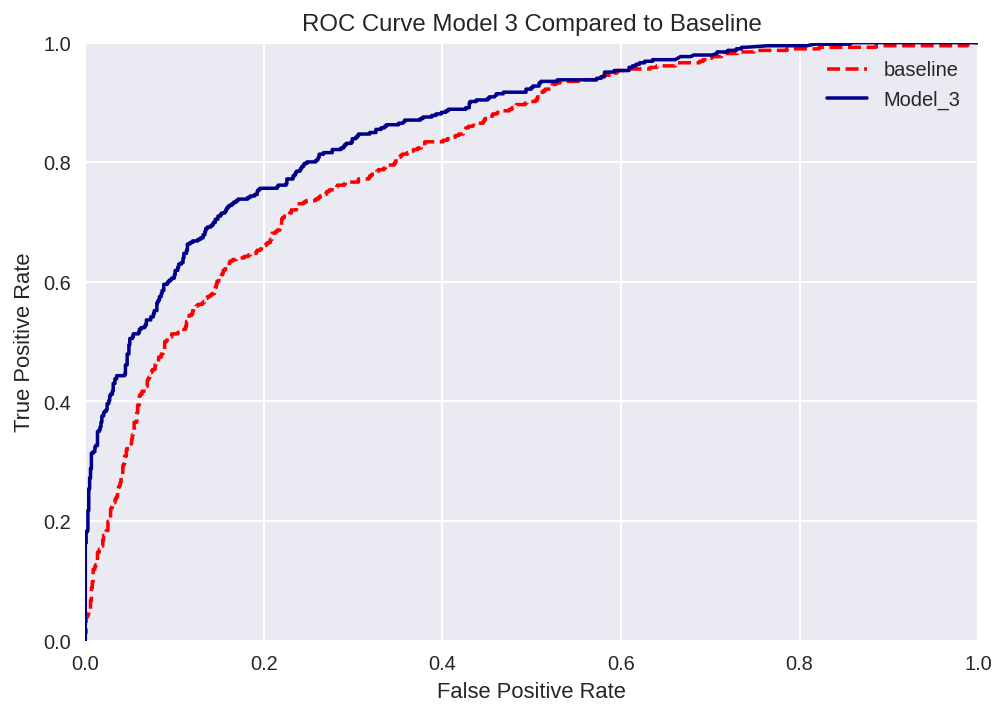

In [103]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_3, tpr_3, thresholds = roc_curve(oe_y_val, model_3_proba_1_val)
fig_3 = plt.plot(frp_3, tpr_3, linestyle = '-', color='#00008B', label='Model_3')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 3 Compared to Baseline')
plt.legend()
plt.show()

In [104]:
#AUC ROC for model 3
roc_auc_score(oe_y_val, model_3_proba_1_val)

0.8627512801422211

### Model 4: Random Forest classifier with upsampled class 1 in target; class 0 unchanged in target; standarized numerical columns

Train X, y
(6427, 19)
(6427,)


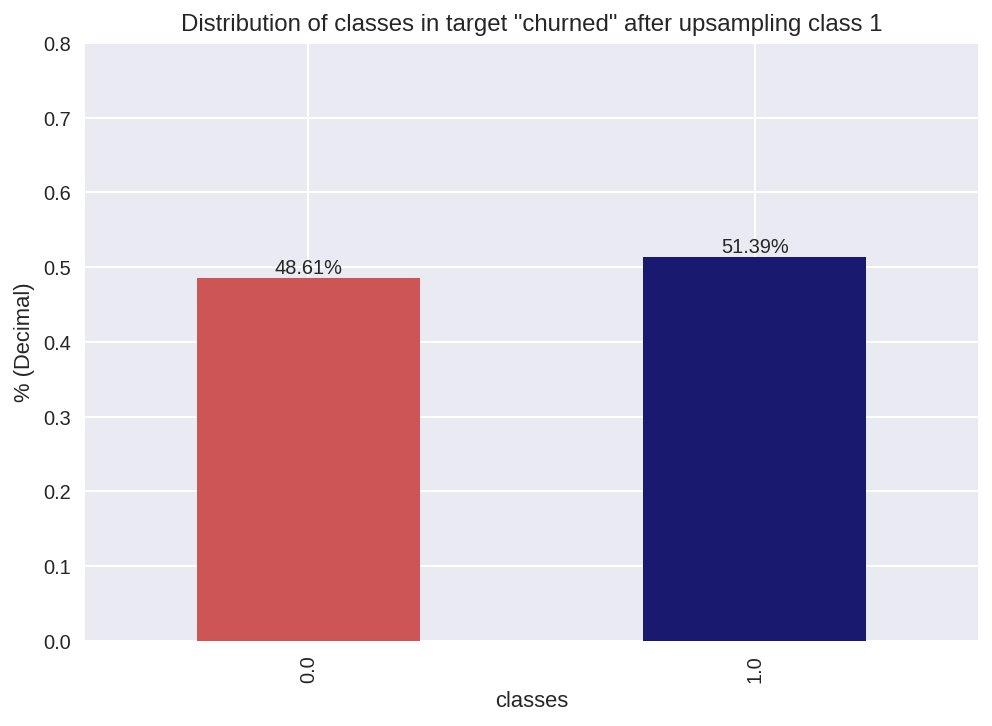

In [105]:
# preparing ohe data with upsampled class 1

oe_X_upsampled_train_4, oe_y_upsampled_train_4 =  upsample(oe_X_train, oe_y_train, 3)
print('Train X, y')
print(oe_X_upsampled_train_4.shape)
print(oe_y_upsampled_train_4.shape)

upsampled_4 = oe_y_upsampled_train_4.value_counts(
    normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in upsampled_4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    upsampled_4.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in target "churned" after upsampling class 1')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

In [106]:
numeric=['monthlycharges', 'totalcharges']
scaler=StandardScaler()
scaler.fit(oe_X_upsampled_train_4[numeric])

features_train_4 = pd.DataFrame(scaler.transform(oe_X_upsampled_train_4[numeric]))
features_valid_4 = pd.DataFrame(scaler.transform(oe_X_val[numeric]))
features_test_4=  pd.DataFrame(scaler.transform(oe_X_test[numeric]))

In [107]:
#saving the standardatized numeric column to training, validation, and testing datasets
features_train_4.columns =['monthlycharges', 'totalcharges']
oe_X_upsampled_train_4.reset_index(drop=True, inplace =True)
features_train_4.reset_index(drop=True, inplace=True)
oe_X_upsampled_train_4[['monthlycharges', 'totalcharges']] = features_train_4
print(oe_X_upsampled_train_4.info())

oe_X_valid_4 = oe_X_val
features_valid_4.columns =['monthlycharges', 'totalcharges']
oe_X_valid_4.reset_index(drop=True, inplace =True)
features_valid_4.reset_index(drop=True, inplace=True)
oe_X_valid_4[['monthlycharges', 'totalcharges']] = features_valid_4
print(oe_X_valid_4.info())


oe_X_test_4 = oe_X_test
features_test_4.columns =['monthlycharges', 'totalcharges']
oe_X_test_4.reset_index(drop=True, inplace =True)
features_test_4.reset_index(drop=True, inplace=True)
oe_X_test_4[['monthlycharges', 'totalcharges']] = features_test_4
print(oe_X_test_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        6427 non-null   float64
 1   gender            6427 non-null   float64
 2   seniorcitizen     6427 non-null   float64
 3   partner           6427 non-null   float64
 4   dependents        6427 non-null   float64
 5   begindate         6427 non-null   float64
 6   type              6427 non-null   float64
 7   paperlessbilling  6427 non-null   float64
 8   paymentmethod     6427 non-null   float64
 9   monthlycharges    6427 non-null   float64
 10  totalcharges      6427 non-null   float64
 11  multiplelines     6427 non-null   float64
 12  internetservice   6427 non-null   float64
 13  onlinesecurity    6427 non-null   float64
 14  onlinebackup      6427 non-null   float64
 15  deviceprotection  6427 non-null   float64
 16  techsupport       6427 non-null   float64


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [108]:
#preparing hyperparameter tuning for model 4, RandomForestClassifier
params = {'n_estimators': list(np.arange(39,52,1)), 
          'max_depth' : list(np.arange(10, 23, 1)),
          'min_samples_split' :  list(np.arange(2,9, 1))}


In [ ]:
#GridSearchCV for model 4
rf_4 = RandomForestClassifier(random_state = 12345)
grid_4 = GridSearchCV(rf_4,
                      params,verbose = 2)
grid_4.fit(oe_X_upsampled_train_4.drop('customerid', axis=1),oe_y_upsampled_train_4)

In [120]:
grid_4.best_params_

{'max_depth': 22, 'min_samples_split': 2, 'n_estimators': 40}

In [121]:
%%time
model_4 = RandomForestClassifier(n_estimators = grid_4.best_params_['n_estimators'],
            min_samples_split = grid_4.best_params_['min_samples_split'],
            random_state=12345)
model_4.fit(oe_X_upsampled_train_4.drop('customerid', axis=1), oe_y_upsampled_train_4)

model_4_predictions = model_4.predict(oe_X_valid_4.drop('customerid',axis=1))

CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 210 ms


In [122]:
model_4_proba = model_4.predict_proba(oe_X_valid_4.drop('customerid',axis=1))
model_4_proba_1_val = model_4_proba[:,1]

In [123]:
#F1 score for RandomForestClassifier
model_4_f1 = f1_score(oe_y_val, model_4_predictions)
model_4_f1

0.6470588235294117

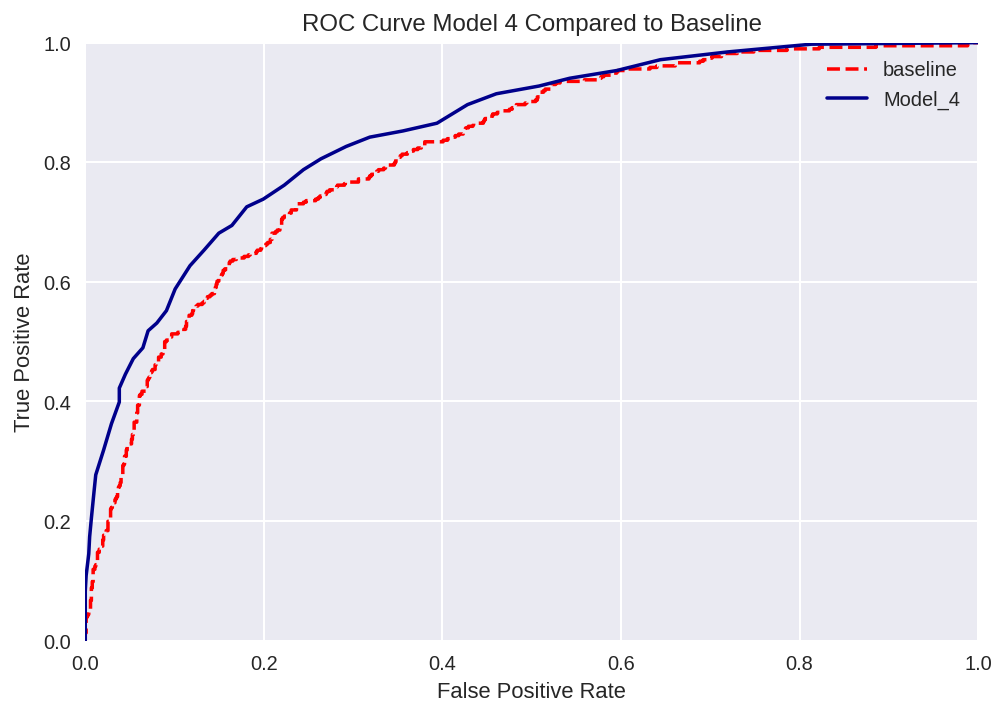

In [124]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_4, tpr_4, thresholds = roc_curve(oe_y_val, model_4_proba_1_val)
fig_4 = plt.plot(frp_4, tpr_4, linestyle = '-', color='#00008B', label='Model_4')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 4 Compared to Baseline')
plt.legend()
plt.show()

In [125]:
#AUC ROC for model 4
roc_auc_score(oe_y_val, model_4_proba_1_val)

0.8541359609803534

### Model 5:  Random Forest classifier with unchanged class 1 in target; class 0 downsampled in target; standarized numerical columns

Train X, y
(2198, 19)
(2198,)


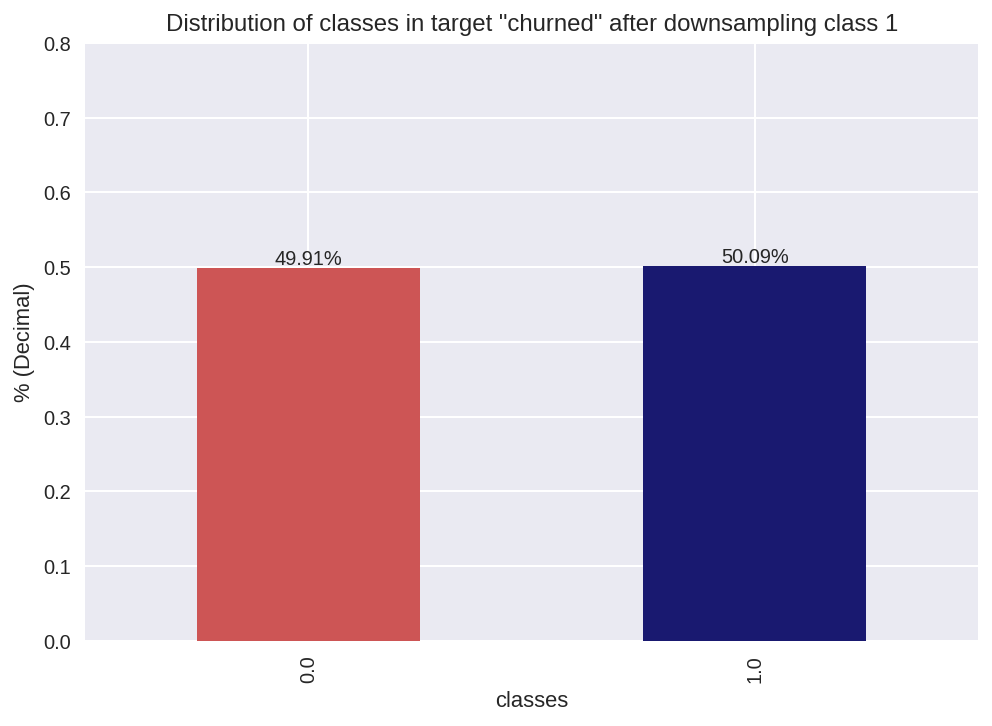

In [126]:
# preparing ohe data with downsampled class 0

oe_X_downsampled_train_5, oe_y_downsampled_train_5 =  downsample(oe_X_train, oe_y_train, 0.351)
print('Train X, y')
print(oe_X_downsampled_train_5.shape)
print(oe_y_downsampled_train_5.shape)

downsampled_5 = oe_y_downsampled_train_5.value_counts(
    normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in downsampled_5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    downsampled_5.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in target "churned" after downsampling class 1')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

In [127]:
numeric=['monthlycharges', 'totalcharges']
scaler=StandardScaler()
scaler.fit(oe_X_downsampled_train_5[numeric])

features_train_5 = pd.DataFrame(scaler.transform(oe_X_downsampled_train_5[numeric]))
features_valid_5 = pd.DataFrame(scaler.transform(oe_X_val[numeric]))
features_test_5 =  pd.DataFrame(scaler.transform(oe_X_test[numeric]))

In [128]:
#saving the standardatized numeric column to training, validation, and testing datasets
features_train_5.columns =['monthlycharges', 'totalcharges']
oe_X_downsampled_train_5.reset_index(drop=True, inplace =True)
features_train_5.reset_index(drop=True, inplace=True)
oe_X_downsampled_train_5[['monthlycharges', 'totalcharges']] = features_train_5
print(oe_X_downsampled_train_5.info())

oe_X_valid_5 = oe_X_val
features_valid_5.columns =['monthlycharges', 'totalcharges']
oe_X_valid_5.reset_index(drop=True, inplace =True)
features_valid_5.reset_index(drop=True, inplace=True)
oe_X_valid_5[['monthlycharges', 'totalcharges']] = features_valid_5
print(oe_X_valid_5.info())


oe_X_test_5 = oe_X_test
features_test_5.columns =['monthlycharges', 'totalcharges']
oe_X_test_5.reset_index(drop=True, inplace =True)
features_test_5.reset_index(drop=True, inplace=True)
oe_X_test_5[['monthlycharges', 'totalcharges']] = features_test_5
print(oe_X_test_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2198 non-null   float64
 1   gender            2198 non-null   float64
 2   seniorcitizen     2198 non-null   float64
 3   partner           2198 non-null   float64
 4   dependents        2198 non-null   float64
 5   begindate         2198 non-null   float64
 6   type              2198 non-null   float64
 7   paperlessbilling  2198 non-null   float64
 8   paymentmethod     2198 non-null   float64
 9   monthlycharges    2198 non-null   float64
 10  totalcharges      2198 non-null   float64
 11  multiplelines     2198 non-null   float64
 12  internetservice   2198 non-null   float64
 13  onlinesecurity    2198 non-null   float64
 14  onlinebackup      2198 non-null   float64
 15  deviceprotection  2198 non-null   float64
 16  techsupport       2198 non-null   float64


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [129]:
#preparing hyperparameter tuning for model 4, RandomForestClassifier

params = {'n_estimators': list(np.arange(39,52,1)), 
          'max_depth' : list(np.arange(10, 23, 1)),
          'min_samples_split' :  list(np.arange(2,9, 1))}

In [ ]:
#GridSearchCV for model 5
rf_5 = RandomForestClassifier(random_state = 12345)
grid_5 = GridSearchCV(rf_5,
                      params,verbose = 2,
                      cv=5)
grid_5.fit(oe_X_downsampled_train_5.drop('customerid', axis=1),oe_y_downsampled_train_5)

In [131]:
grid_5.best_params_

{'max_depth': 12, 'min_samples_split': 6, 'n_estimators': 41}

In [132]:
%%time
model_5 = RandomForestClassifier(n_estimators = grid_5.best_params_['n_estimators'],
            min_samples_split = grid_5.best_params_['min_samples_split'],
            random_state=12345)
model_5.fit(oe_X_downsampled_train_5.drop('customerid', axis=1), oe_y_downsampled_train_5)

model_5_predictions = model_5.predict(oe_X_valid_5.drop('customerid',axis=1))

CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 112 ms


In [133]:
model_5_proba = model_5.predict_proba(oe_X_valid_5.drop('customerid',axis=1))
model_5_proba_1_val = model_5_proba[:,1]

In [134]:
#F1 score for RandomForestClassifier
model_5_f1 = f1_score(oe_y_val, model_5_predictions)
model_5_f1

0.570975416336241

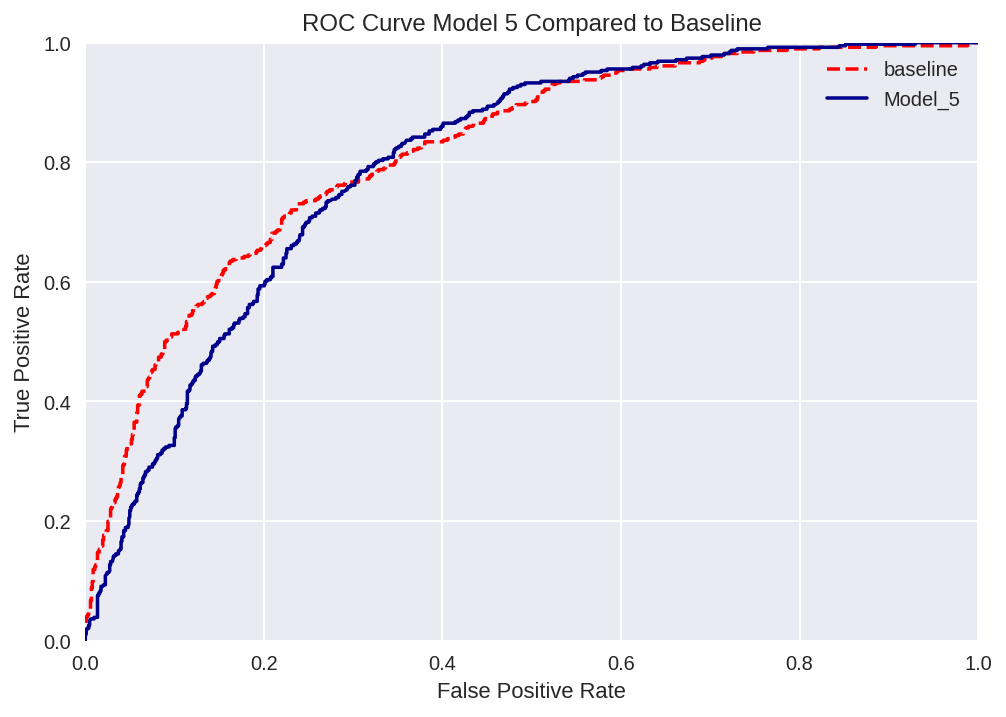

In [135]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_5, tpr_5, thresholds = roc_curve(oe_y_val, model_5_proba_1_val)
fig_5 = plt.plot(frp_5, tpr_5, linestyle = '-', color='#00008B', label='Model_5')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 5 Compared to Baseline')
plt.legend()
plt.show()

In [136]:
#AUC ROC for model 5
roc_auc_score(oe_y_val, model_5_proba_1_val)

0.7984060899822224

### Model 6. KNeighborsClassifiers Model with Upsampled class 1 in target, class 0 unchanged in target, and standarized numeric columns

Train X, y
(6427, 7070)
(6427,)


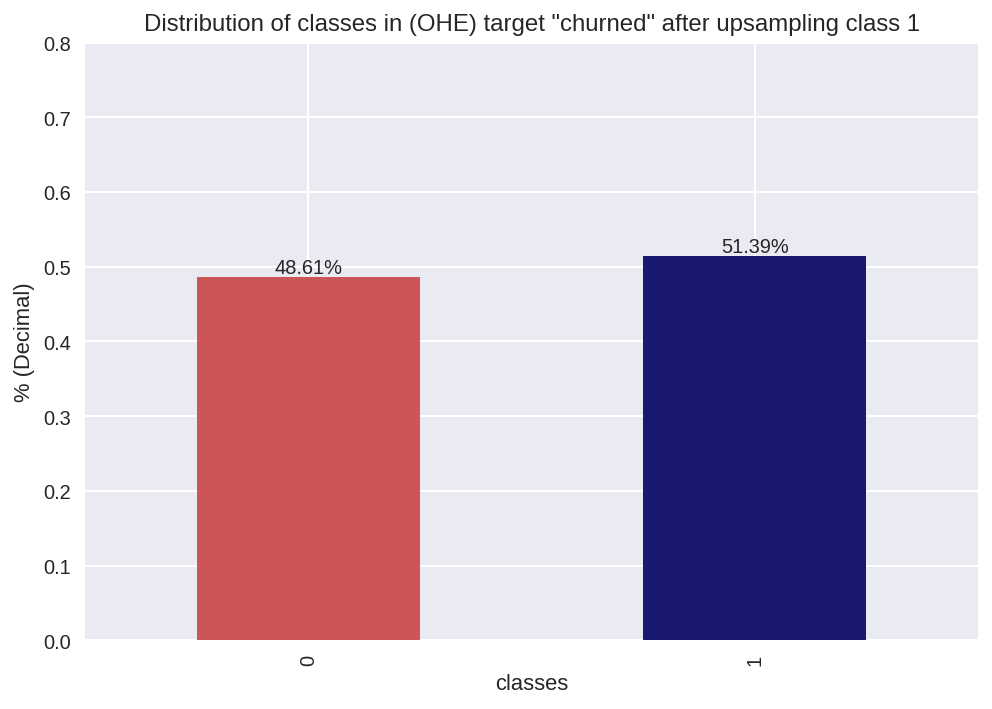

In [137]:
# preparing ohe data with upsampled class 1

ohe_X_upsampled_train_6, ohe_y_upsampled_train_6 =  upsample(ohe_X_train, ohe_y_train, 3)
print('Train X, y')
print(ohe_X_upsampled_train_6.shape)
print(ohe_y_upsampled_train_6.shape)

upsampled_6 = ohe_y_upsampled_train_6.value_counts(
    normalize=True).sort_index().plot(kind='bar',color=['#CD5555', '#191970'])

for p in upsampled_6.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    upsampled_6.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center')
    
plt.title('Distribution of classes in (OHE) target "churned" after upsampling class 1')
plt.xlabel('classes')
plt.ylabel('% (Decimal)')
plt.ylim([0,0.8])
plt.show()

In [138]:
#preparing hyperparameter tuning for model 4, RandomForestClassifier

params = {'n_neighbors': list(np.arange(1,11,1)), 
          'leaf_size' : list(np.arange(0, 40, 5))}

In [ ]:
#GridSearchCV for model 6
model_6 = KNeighborsClassifier()
grid_6 = GridSearchCV(model_6,
                      params,verbose = 2, 
                      scoring = 'accuracy')
grid_6.fit(ohe_X_upsampled_train_6,ohe_y_upsampled_train_6)

In [140]:
grid_6.best_params_

{'leaf_size': 0, 'n_neighbors': 1}

In [141]:
%%time
model_6 = KNeighborsClassifier(n_neighbors = grid_6.best_params_['n_neighbors'],
                               leaf_size = grid_6.best_params_['leaf_size'])
model_6.fit(ohe_X_upsampled_train_6, ohe_y_upsampled_train_6)
model_6_predictions = model_6.predict(ohe_X_val)

CPU times: user 3.39 s, sys: 264 ms, total: 3.66 s
Wall time: 3.67 s


In [142]:
model_6_proba = model_6.predict_proba(ohe_X_val)
model_6_proba_1_val = model_6_proba[:,1]

In [143]:
#F1 score for KNeighborsClassifier
model_6_f1 = f1_score(ohe_y_val, model_6_predictions)
model_5_f1 

0.570975416336241

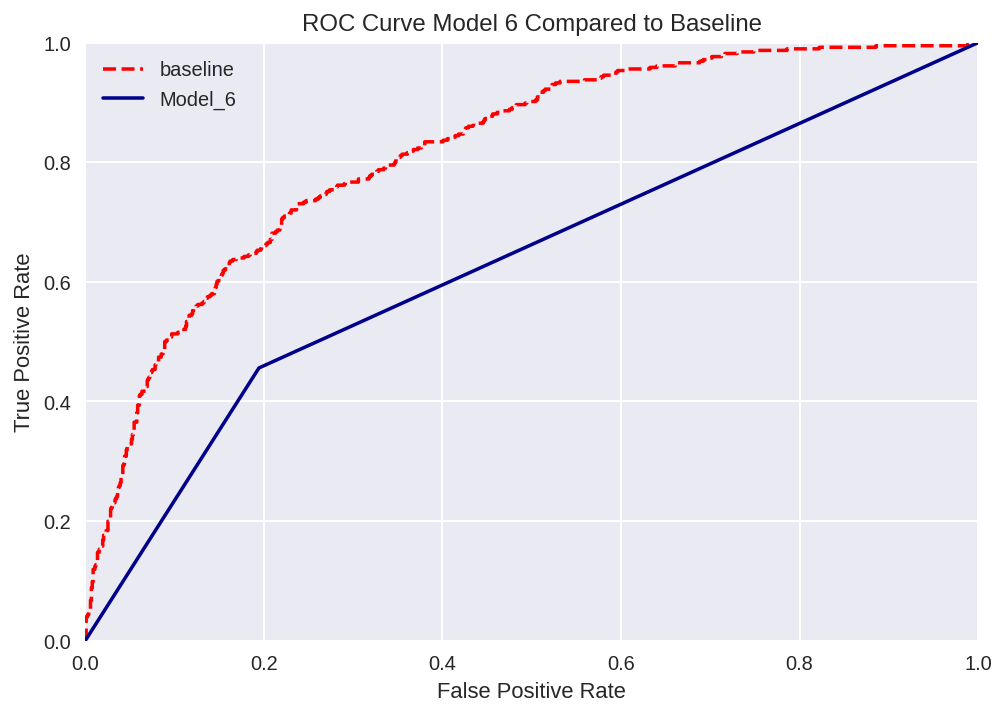

In [144]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_6, tpr_6, thresholds = roc_curve(ohe_y_val, model_6_proba_1_val)
fig_6 = plt.plot(frp_6, tpr_6, linestyle = '-', color='#00008B', label='Model_6')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 6 Compared to Baseline')
plt.legend()
plt.show()

In [145]:
#AUC ROC for model 6
roc_auc_score(ohe_y_val, model_6_proba_1_val)

0.6307163225097372

### Model 8. CatboostClassifier Model with unchanged class 1 in target; class 0 unchanged in target

In [ ]:
cat_features_cat = ['gender', 'seniorcitizen', 'partner', 
                    'dependents', 'type', 'paperlessbilling', 'paymentmethod', 
                    'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                    'techsupport', 'streamingtv', 'streamingmovies']

cat_model = CatBoostClassifier(random_seed=12345, cat_features = cat_features_cat)
parameters_cat = {'iterations' : list(np.arange(0,101,1)), 
                'model_size_reg' : list(np.arange(0,50,1)),
                'max_depth' : list(np.arange(0,16,1))}

random_cat = RandomizedSearchCV(estimator = cat_model, 
                       param_distributions = parameters_cat,
                       cv = 5,
                       verbose = 2, 
                       return_train_score=True)
random_cat.fit(X_train.drop(['customerid'], axis=1), y_train)

In [147]:
random_cat.best_params_

{'model_size_reg': 5, 'max_depth': 2, 'iterations': 78}

In [148]:
model_8 =  CatBoostClassifier(random_seed=12345, 
                               cat_features = cat_features_cat,
                               model_size_reg = random_cat.best_params_['model_size_reg'],
                               max_depth = random_cat.best_params_['max_depth'],
                               iterations = random_cat.best_params_['iterations'])

model_8.fit(X_train.drop(['customerid'], axis=1), y_train)
model_8_predictions = model_8.predict(X_val.drop('customerid',axis=1))
#f1 score 

model_8_f1 = f1_score(y_val, model_8_predictions)
model_8_f1

Learning rate set to 0.197748
0:	learn: 0.6340279	total: 1.59ms	remaining: 122ms
1:	learn: 0.5979156	total: 3.12ms	remaining: 118ms
2:	learn: 0.5628702	total: 4.25ms	remaining: 106ms
3:	learn: 0.5414884	total: 5.4ms	remaining: 99.9ms
4:	learn: 0.5222932	total: 6.95ms	remaining: 101ms
5:	learn: 0.5111734	total: 8.07ms	remaining: 96.9ms
6:	learn: 0.4999709	total: 9.19ms	remaining: 93.2ms
7:	learn: 0.4931026	total: 10.4ms	remaining: 90.7ms
8:	learn: 0.4846542	total: 11.4ms	remaining: 87.7ms
9:	learn: 0.4772191	total: 12.5ms	remaining: 85.2ms
10:	learn: 0.4723938	total: 13.6ms	remaining: 83ms
11:	learn: 0.4668410	total: 14.8ms	remaining: 81.1ms
12:	learn: 0.4632260	total: 15.9ms	remaining: 79.7ms
13:	learn: 0.4579678	total: 17.1ms	remaining: 78.3ms
14:	learn: 0.4556732	total: 18.3ms	remaining: 76.8ms
15:	learn: 0.4521704	total: 19.4ms	remaining: 75ms
16:	learn: 0.4504097	total: 20.5ms	remaining: 73.6ms
17:	learn: 0.4482594	total: 21.6ms	remaining: 72ms
18:	learn: 0.4448395	total: 22.7ms	re

0.510703363914373

In [149]:
model_8_proba = model_8.predict_proba(X_val.drop('customerid',axis=1))
model_8_proba_1_val = model_8_proba[:,1]

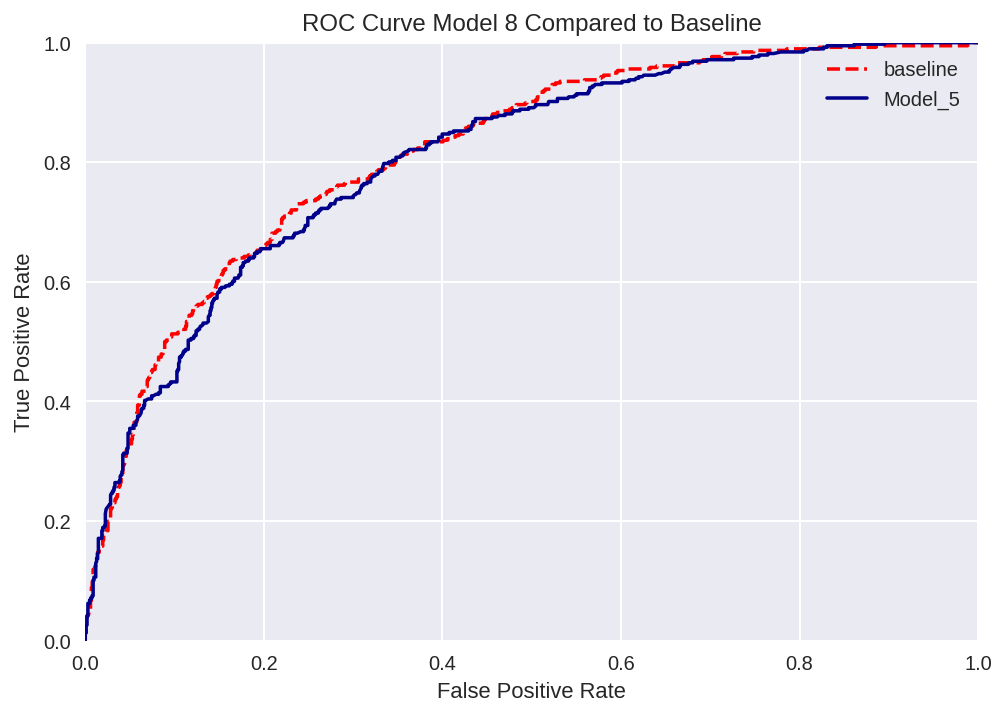

In [150]:
#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_val, model_0_proba_1_val)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_8, tpr_8, thresholds = roc_curve(y_val, model_8_proba_1_val)
fig_5 = plt.plot(frp_8, tpr_8, linestyle = '-', color='#00008B', label='Model_5')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 8 Compared to Baseline')
plt.legend()
plt.show()

In [151]:
#AUC ROC for model 5
roc_auc_score(y_val, model_8_proba_1_val)

0.807892564285678

## Testing Models with test dataset 

### Model 0, baseline

F1 score: 0.6054519368723099


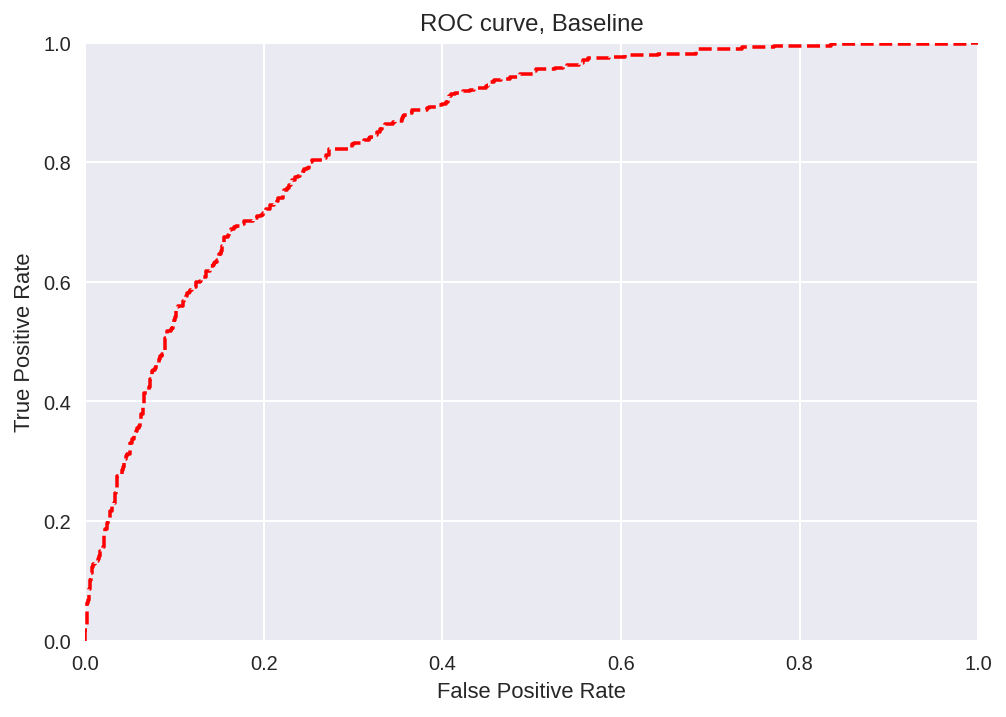

0.8470842233517031

In [156]:
model_0_predictions = model_0.predict(ohe_X_test)
model_0_proba = model_0.predict_proba(ohe_X_test)
model_0_proba_1_test = model_0_proba[:,1]

model_0_f1 = f1_score(ohe_y_test, model_0_predictions)
print('F1 score:',model_0_f1) 

frp, tpr, thresholds = roc_curve(ohe_y_test, model_0_proba_1_test)
plt.figure()
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, Baseline')

plt.show()

#AUC ROC for model 0 
roc_auc_score(ohe_y_test, model_0_proba_1_test)

### Model 3

F1 score: 0.6216696269982238


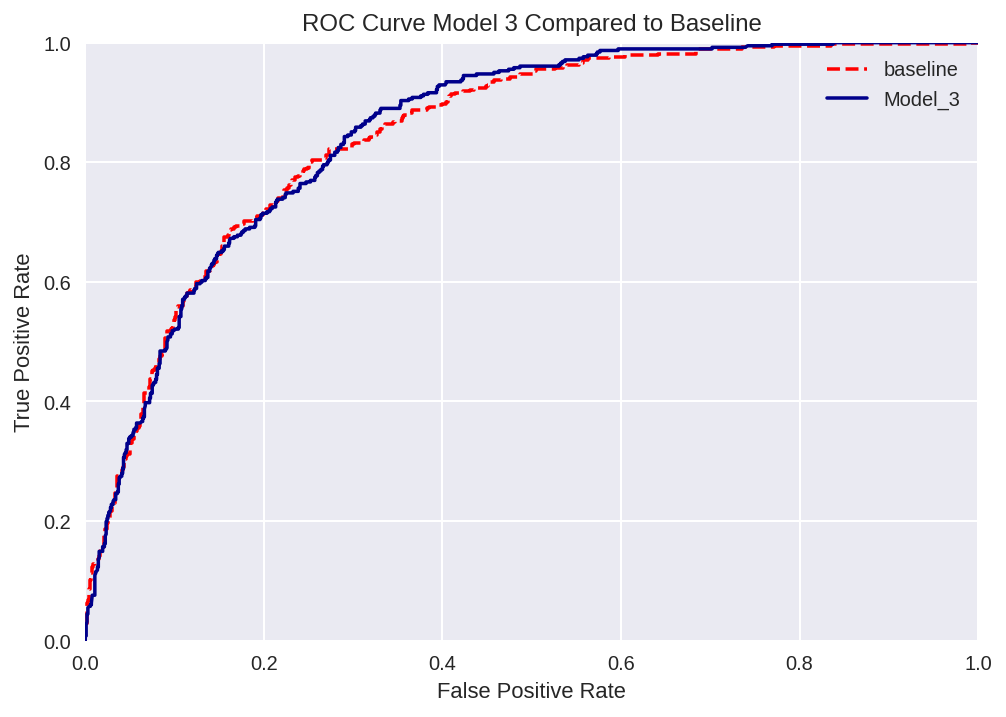

0.851515622689988

In [157]:
model_3_predictions = model_3.predict(oe_X_test.drop('customerid',axis=1))
model_3_proba = model_3.predict_proba(oe_X_test.drop('customerid',axis=1))
model_3_proba_1_test = model_3_proba[:,1]

#F1 score for RandomForestClassifier
model_3_f1 = f1_score(oe_y_test, model_3_predictions)
print('F1 score:',model_3_f1)

#plotting ROC curve

frp_0, tpr_0, thresholds = roc_curve(ohe_y_test, model_0_proba_1_test)
fig_0 = plt.plot(frp, tpr, linestyle = '--', color='red', label='baseline')

frp_3, tpr_3, thresholds = roc_curve(oe_y_test, model_3_proba_1_test)
fig_3 = plt.plot(frp_3, tpr_3, linestyle = '-', color='#00008B', label='Model_3')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 3 Compared to Baseline')
plt.legend()
plt.show()

#AUC ROC for model 3
roc_auc_score(oe_y_test, model_3_proba_1_test)

## Conclusion From testing

To select our best model, we used the AUC ROC metric in our models with the validation data. The reason we selected the AUC ROC metric is because this metric tell us how well our models were able to distinguis between the two classes from the data. The three requirements we had to select our model included: 

1. The model had a AUC ROC metric score higher than 0.85
2. The model obtained a AUC ROC metric score higher than the baseline model in the validation stage. 
3. The model obtained the highest AUC ROC metric from the other models that met requirements 1 and 2. 

The model that met these requirements was model 3. 
Below are the results from the testing stage in the project: 


| Model Number | Model Characteristics | AUC ROC Metric Score |
|------------|-----------------------|----|
|Model 0. |Logistic regression model with encoded categorical data, as a baseline. This model was used as the baseline to compare it agaisnt models that allow for gradient descent optimization, and/or hyperparameter tuning.|  0.8470  |
|Model 3 |Random Forest classifier with unchanged class 1 in target; class 0 unchanged in target; non-standarized numerical columns|    0.8515   | 


## Solution Report

One of the key steps that lead to solving the task was replacing the value 'unknown' for 'no', for the following columns: 
   - 'streamingmovies'
   - 'streamingtv'
   - 'techsupport'
   - 'deviceprotection'
   - 'onlinebackup'
   - 'onlinesecurity'
   - 'internetservice'
   - 'multiplelines'
   
The reason that we replaced the value 'unknown' with 'no' for these column was because after merging the tables, the rows that had NaN values were the rows where we did not have information about the customer's service plan for of these columns. We assumed that if we did not have customer's information on these columns, the customer did not have these these services in their plan. 


 For the validation section in this project, we followed most of the steps described in the work plan. The only exceptions we had during the hyperparameter-tuning stage was not using cross validation for model 4 and model 6. For models 4 and 6, as well as for the other models, we used GriSearchCV to find the best hyperparameters, but we did not use cross validation for these two models. The reason that we did not use cross validation for these two models is because these two models had upsampled class 1, to fix the problem with inbalance of classes. Since it is not recommended to use cross-validation for training data that has a upsampled class. For the testing section in this project, selected the model that had a ROC-AUC metric score higher than 0.85, higher than other models, and higher than the baseline model, model 0. The model that met all 3 requirements was model 3. 


For Model 3, the hyperparameters that resulted in a ROC-AUC metric score of 0.8515 were: 
- 'max_depth': 14
- 'min_samples_split': 5
- 'n_estimators': 41

To conclude, our model received a quality score of 5 SP out of 6 SP, which is satisfactory for out client. 